In [1301]:
#Líneas a incluir en el documento .tex para eliminar la primera hoja (innecesaria porque el título en formato aparece en la segunda)
#\usepackage{atbegshi}
#\AtBeginDocument{\AtBeginShipoutNext{\AtBeginShipoutDiscard}}

\let\firstpage\relax

\makeatletter
\begin{center}

\begin{titlepage}

{\includegraphics[width=0.2\textwidth]{usblogo.png}\par} 
	{\bfseries\scshape\LARGE Universidad Simón Bolívar \par}
	{\scshape\large Dpto. de Tecnología y Electrónica \par}
	{\scshape\large EC7817 - Tópico especial II - Inteligencia Artificial en Biomédica \par}
    \vspace{0.2cm}

{\bfseries\scshape\LARGE \@title \par}

\vspace{0.2cm}
autor: \@author

Profesor: Profesor 1

\vspace{0.2cm}

\@date

\let\newpage\relax	

\end{titlepage}

\end{center}

\makeatother


\vspace{1cm}
\section*{\scshape\Large Introducción}


Utilice el conjunto de datos de cáncer de mama (breast cancer) disponible en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) y entregada el primer de clases (ver archivo en Facebook), para estudiar el modelo de regresión logística binaria.


La base de datos contiene:

• 569 instancias (observaciones)

• 30 variables de entrada: columnas 3-32

• 1 variable de salida (binaria): columna 2, diagnóstico del cáncer: B = benigno (357 instancias), M = maligno (212 instancias).


El objetivo del taller es utilizar un modelo de regresión logística para clasificar una observación como cáncer benigno o maligno, a partir de varios atributos (predictores).

Pueden leer este artículo para conocer un poco más sobre la base de datos: W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.


Use las siguientes instrucciones para cargar el conjunto de datos en el Espacio de Trabajo (Workspace) de MATLAB:


• url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data&#39;;

• websave('cancer_mama.csv',url);

• cancer_mama = readtable('cancer_mama.csv');


 


(4 puntos) Estadísticas descriptivas de los datos


• Describa el conjunto de observaciones usando las medidas: media, mediana, moda, valor mínimo, valor máximo, rango, desviación estándar, asimetría y curtosis.

• Obtenga los histogramas de las variables de entrada.

• Obtenga los diagramas de dispersión por grupo de cada dos variables de entrada vs
salida. Use el comando gscatter de MATLAB.

• Analice si las observaciones provienen de una población con una distribución normal
(Gaussiana).

• Examine la dependencia entre las variables de entrada a partir del coeficiente de
correlación de Pearson.


 


(6 puntos) Modelo de Regresión Logística Binaria

A continuación, se describen una serie de tareas. Estas tareas no son pasos a seguir, por lo tanto. no son secuenciales:

• Obtenga un modelo de regresión Logística binaria que permita clasificar la variable de salida (diagnóstico del cáncer) a partir de una combinación lineal de variables de entrada (predictores).

• Seleccione los predictores que arrojen el mejor desempeño de la clasificación, para ello use las técnicas apropiadas
(transformación, normalización, eliminación de valores atípicos, correlación entre variables (r>0,9), etc)

• Realice una validación cruzada de 10 iteraciones (10-fold cross-validation). Reporte la matriz de contingencia y los valores de F1, ACC, SEN y SPC.

• Realice el experimento usando diferentes combinaciones de predictores. Reporte al menos tres experimentos distintos.

• Escriba la ecuación del modelo de regresión Logística que arroja el mejor desempeño. Puede usar el editor de LaTeX de MATLAB.

• Concluya sobre el taller.






Una vez concluido este primer pre-procesamiento, se realiza el análisis estadístico de las variables involucradas.

\vspace{1cm}
\section{\bfseries\scshape\Large Inspección de los datos}

Lo Primero es la importación de los datos y el análisis estadístico de los mismos. Posteriormente, se procede a procesar los mismos, eliminando las muestras atípicas y estandarizando (normalizando) los valores de todas las variables para que las mismas se encuentren similarmente distribuidas (lo más parecido a una distribución gaussiana) dentro de un mismo rango (y, por ende, mantengan un mismo orden de magnitud).

\text{\scshape\large Inicio del Código}

In [1302]:
# Se instancian las bibliotecas a implementar

import numpy as np
#import csv
#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
#import statistics as stats

import scipy
from scipy import stats
#from scipy.stats import boxcox
#from scipy.special import inv_boxcox

import sklearn
import sklearn.model_selection as sklms
import sklearn.linear_model as skllm
import sklearn.metrics as sklmt
#from sklearn import cross_validation
#import sklearn.cross_validation as sklcv 

from prettytable import PrettyTable

#format of print for numpy float
np.set_printoptions(precision = 5, formatter = {'float': lambda x: "{0:0.5f}".format(x)})
np.set_printoptions(threshold = 40, edgeitems = 20)

In [1303]:

# Configuration to display center plots

from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")



\text{\scshape\large Funciones implementadas a lo largo del código}


In [1304]:

# Cálculo de los Parámetros estadísticos de interés

def StatsVars( data, title ):
    

    # Inicialización

    data_Mean = np.zeros((np.size(data,1) - 1,1))       #media
    data_Median = np.zeros((np.size(data,1) - 1,1))     #mediana
    data_Mode = np.zeros((np.size(data,1) - 1,1))       #moda
    data_Max = np.zeros((np.size(data,1) - 1,1))        #máximo
    data_Min = np.zeros((np.size(data,1) - 1,1))        #mínimo
    data_Range = np.zeros((np.size(data,1) - 1,1))      #rango
    data_Desv = np.zeros((np.size(data,1) - 1,1))       #desviación
    data_Skew = np.zeros((np.size(data,1) - 1,1))       #asimetría
    data_Kurt = np.zeros((np.size(data,1) - 1,1))       #curtosis
    

    # cálculo de los parámetros estadísticos

    data_Mean = np.mean(data[:,1:], axis = 0)
    data_Median = np.median(data[:,1:], axis = 0)
    data_Mode = stats.mode(data[:,1:], axis = 0)
    data_Max = np.max(data[:,1:], axis = 0)
    data_Min = np.min(data[:,1:], axis = 0)
    data_Range = data_Max - data_Min
    data_Desv = np.std(data[:,1:], axis = 0)
    data_Skew = stats.skew(data[:,1:], axis = 0, bias = 0)
    data_Kurt = stats.kurtosis(data[:,1:], axis = 0, bias = 0)
    
    # Se inserta el formato de presentación de los datos
    np.set_printoptions(formatter={'float': lambda x: "{:.5e}".format(x)}, suppress= True)
    
    # Presentación de los valores de los parámetros estadísticos estudiados

    print('la media de los atributos para la ' + title + ' es:');
    print(data_Mean);
    print();
    print('la mediana de los atributos para la ' + title + ' es:');
    print(data_Median);
    print();
    print('la moda de los atributos para la ' + title + ' es:');
    print(data_Mode);
    print();
    print('el valor máximo de los atributos para la ' + title + ' es:');
    print(data_Max);
    print();
    print('el valor mínimo de los atributos para la ' + title + ' es:');
    print(data_Min);
    print();
    print('lel rango de los atributos para la ' + title + ' es:');
    print(data_Range);
    print();
    print('la desviación estándar de los atributos para la ' + title + ' es:');
    print(data_Desv);
    print();
    print('la asimetría de los atributos para la ' + title + ' es:');
    print(data_Skew);
    print();
    print('el curtosis de los atributos para la ' + title + ' es:');
    print(data_Kurt);
    print();

    
    # retorna las variables estadísticas de interés
    
    return data_Mean, data_Median, data_Mode, data_Max, data_Min, data_Range, data_Desv, data_Skew, data_Kurt;

#endfunction
    

In [1305]:

# Scatter Plot de los atributos respecto a un atributo (atributo de salida)

def ScatterPlotAllto1Sep( data, varnames, title ):

    # Scatter plot de los atributos de entrada vs el atributo de salida

    for i in range( np.size(data[:,1:],1) ):
        
        # inicializa la figura
        fig = plt.figure(figsize = (10, 1.25))
        
        # scatter plot
        plt.scatter( data[:, i+1] , data[:, 0] )
        
        # title & labels
        plt.title( title + "\n" + varnames[0] + " VS Atributo " + str(i+1)+": " + varnames[i+1] + ' de la célula '+ str(int(np.floor(i/10)) + 1))
        plt.xlabel("Atributo " + str(i+1)+": " + varnames[i+1] + ' de la célula '+ str(int(np.floor(i/10)) + 1))
        plt.ylabel('Diagnóstico')
        
        # plot
        plt.show()
    
    #endfor
    
#endfunction


In [1306]:

# Plot de los histogramas de cada atributo por separado

def histogrmAllAtriSep( data, varnames, title ):

    # Se muestran los histogramas

    for i in range( np.size(data,1) ):

        # Atributo i
        #print( title + " - Atributo " + str(i+1)+": " + varnames[i] + ' de la célula '+ str(int(np.floor(i/10)) + 1) )
        fig = plt.figure(figsize =(10, 2))
        
        #gráficos de histogramas
        plt.hist( data[:,i] , bins = 'auto' );
        plt.title( title + '\nHistograma del atributo '+ str(i+1) + ': ' + varnames[i] + ' de la célula '+ str(int(np.floor(i/10)) + 1) );

        # Add x, y gridlines
        plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.35)
        
        # y axis configuration
        plt.yticks( np.arange(0, np.max (plt.yticks()[0]), 10 ) )
        
        # plot
        plt.show()

    #endfor
    
#endfunction




In [1307]:


# Plot para una sola correlación de las datos (los atributos de entrada respecto al atributo de salida.)

def barPlot_1Corr( corr_data , varnames , title ):
    
    # Bar Plot de la correlación de los atributos

    #Figure size
    fig, ax = plt.subplots(figsize = (16, 5))

    barWidth = 0.3

    # Set position of bar on X axis
    br1 = np.arange(np.size(corr_data[0:10]))
    br2 = br1 +  barWidth * np.ones(np.size(br1,0))
    br3 = br2 +  barWidth * np.ones(np.size(br1,0))

    # Bar Plot
    ax.bar(br1, list(corr_data[0:10] ), width =  barWidth, color='red',   label ='Célula 1');
    ax.bar(br2, list(corr_data[10:20]), width =  barWidth, color='green', label ='Célula 2');
    ax.bar(br3, list(corr_data[20:30]), width =  barWidth, color='blue',  label ='Célula 3');

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 1)
    ax.yaxis.set_tick_params(pad = 1)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.35)

    # Add annotation to bars
    #j = 0
    #for i in ax.patches:
    #    plt.text(i.get_x() + 0.0, i.get_y() + np.round( np.max( corr_file_wdbc2[1:,1] ), 1 ) + 0.06, str( np.round( corr_file_wdbc2[j,1] , 1) ), fontsize = 10, fontweight ='bold', color ='black');
    #    j = j + 1

    # Plot title
    ax.set_title( title  + ' - Nivel de Correlación entre los atributos con el atributo ' + varnames[0])

    # axis labels
    #plt.xticks(np.arange( np.size(varnames[1:11],0) ), varnames[1:11])
    plt.xticks( br2, varnames[1:11] )

    # y axis configuration
    #ax.set_ylim( [-0.4, 1.1] )
    ax.set_yticks( np.arange(-0.4, 1.1, 0.1) )
    ax.set_ylabel('Correlación con el atributo '+varnames[0])
    ax.set_xlabel('Atributos de entrada')

    #fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, color ='grey', ha ='right', va ='bottom', alpha = 0.7)

    # plot
    plt.legend()
    plt.show()

#endfunction



In [1308]:


# Plot para una sola correlación de las datos (los atributos de entrada respecto al atributo de salida.)

def barPlot_1Corr_forAll( corr_data , varnames , title, j, i, barWidth, br1, br2, br3 ):
    
    # Bar Plot de la correlación de los atributos

    #Figure size
    fig, ax = plt.subplots(figsize = (16, 2.85))

    #barWidth = 0.3

    # Set position of bar on X axis
    #br1 = np.arange(np.size(corr_data[1:11]))
    #br2 = br1 +  barWidth * np.ones(np.size(br1,0))
    #br3 = br2 +  barWidth * np.ones(np.size(br1,0))

    # Bar Plot
    ax.bar(0,   corr_data[0]          , width =  barWidth*2, color='magenta', label ='Diagnóstico');
    ax.bar(br1, list(corr_data[1:11] ), width =  barWidth  , color='red',     label ='Célula 1');
    ax.bar(br2, list(corr_data[11:21]), width =  barWidth  , color='green',   label ='Célula 2');
    ax.bar(br3, list(corr_data[21:31]), width =  barWidth  , color='blue',    label ='Célula 3');

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 1)
    ax.yaxis.set_tick_params(pad = 1)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.35)

    # Add annotation to bars
    #j = 0
    #for i in ax.patches:
    #    plt.text(i.get_x() + 0.0, i.get_y() + np.round( np.max( corr_file_wdbc2[1:,1] ), 1 ) + 0.06, str( np.round( corr_file_wdbc2[j,1] , 1) ), fontsize = 10, fontweight ='bold', color ='black');
    #    j = j + 1

    # Plot title
    ax.set_title( title  + '\nNivel de Correlación entre los atributos con el atributo ' + varnames[j] + ' de la célula ' + str( int(np.floor(i/10) +1) ) )

    # axis labels
    plt.xticks( np.hstack( (0, br2) ), varnames[0:11] )

    # y axis configuration
    #ax.set_ylim( [-0.5, 1.1] )
    ax.set_yticks( np.arange(-0.5, 1.1, 0.1) )
    ax.set_ylabel('Correlación con el atributo '+varnames[j])
    ax.set_xlabel('Atributos de entrada')

    #fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, color ='grey', ha ='right', va ='bottom', alpha = 0.7)

    # plot
    plt.legend()
    plt.show()

#endfunction


def barPlot_AllCorr( corr_data , varnames , title ):

    barWidth = 0.3

    # Set position of bar on X axis
    br1 = np.arange(np.size(corr_data[1:11,0],0)) + 1
    br2 = br1 +  barWidth * np.ones(np.size(br1,0))
    br3 = br2 +  barWidth * np.ones(np.size(br1,0))
    
    for i in range( np.size(corr_data,1) ):
        
        # Se define la posición del atributo actual
        aux = np.copy(corr_data[:,i]) 
        j = np.where( aux == 1.0 )[0][0]
        #j = np.sum( (aux == 1.0) * np.arange( np.size(aux) ) )   # cálculo manual del índice
        
        # Se genera el plot de las correlaciones respecto al i-ésimo atributo
        barPlot_1Corr_forAll( corr_data[:,i], varnames, title, j, i, barWidth, br1, br2, br3 )
        
    #endfor

#endfunction


In [1309]:

# BoxPlot de todos los atributos en una misma figura

def BoxPlotAllin1( data, varnames, title ):


    # Se inicializan los diagrama de bloques
    stats2 = cbook.boxplot_stats(data, labels = varnames)

    #fig, ax = plt.subplots(1, 1)
    fig = plt.figure(figsize =(16, 10))
    ax = fig.add_subplot(111)

    # Plot boxplots from our computed statistics
    bp = ax.bxp([stats2[i] for i in range( np.size(data,1) )], positions=range( np.size(data,1) ), patch_artist = True, vert = 0, shownotches ='True');


    colors = ['#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00']

    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        
    #endfor

    # changing color and linewidth of
    # whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 2,
                    linestyle =":")
    #endfor

    # changing color and linewidth of
    # caps
    for cap in bp['caps']:
        cap.set(color ='#8B008B',
                linewidth = 1)
    #endfor

    # changing color and linewidth of
    # medians
    for median in bp['medians']:
        median.set(color ='#777777', 
                   linewidth = 1)
    #endfor

    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='D',
                  color ='#e7298a',
                  alpha = 0.25)
    #endfor
    
    # Title
    ax.set_title(title + ' - Diagrama de Cajas (IQR)')

#endfunction



In [1310]:

# BoxPlot de todos los atributos en figuras independientes

def BoxPlotSep( data, varnames, title ):
    
    
    for i in range( np.size(data,1) ):

        # Atributo i
        #print( "Atributo " + str(i+1)+": " + varnames[i] + ' de la célula '+ str(int(np.floor(i/10)) + 1) )

        # inicializa las cajas
        stats2 = cbook.boxplot_stats(data[:, i ])#, labels = varnames[i+1])

        # instancia la figura
        fig = plt.figure(figsize =(10, 1))
        ax = fig.add_subplot(111)

        # boxplot
        bp2 = ax.bxp(stats2, patch_artist = True, vert = 0, shownotches ='True');

        # configurar el color de las cajas
        
        
        colors = ['#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
                  '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
                  '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
                  '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
                  '#0000FF', '#00FF00']
        
        bp2['boxes'][0].set(color = colors[i])

        # título
        plt.title(title + '\nDiagrama IQR del atributo '+str(i+1) + ': ' + varnames[i] + ' de la célula '+ str(int(np.floor(i/10)) + 1) );
        
        # plot
        plt.show()
    
    #endfor
    
#endfunction


In [1311]:

def IQRparamCalc( data ):

    # Obtención de variables de IQR

    dataQ1 = np.percentile(data, 25, axis = 0)
    dataQ2 = np.percentile(data, 50, axis = 0)
    dataQ3 = np.percentile(data, 75, axis = 0)

    dataIQR = stats.iqr(data, axis = 0)
    

    # Se inserta el formato de presentación de los datos
    np.set_printoptions(formatter={'float': lambda x: "{:.5e}".format(x)}, suppress= True)
    
    #Presentación de los parámetros IQR

    print('Q1 de los atributos es:');
    print(dataQ1);
    print();
    print('Q2 de los atributos es:');
    print(dataQ2);
    print();
    print('Q3 de los atributos es:');
    print(dataQ3);
    print();
    print('IQR de los atributos es:');
    print(dataIQR);
    print();

    return DataQ1, DataQ2, DataQ3, DataIQR

#endfunction


In [1312]:

def AtipValueRemv( data ):

    # Obtención de variables de IQR

    dataQ1 = np.percentile(data, 25, axis = 0)
    #dataQ2 = np.percentile(data, 50, axis = 0)
    dataQ3 = np.percentile(data, 75, axis = 0)

    dataIQR = stats.iqr(data, axis = 0)


    # Detector de valores atípicos por debajo del límite inferior
    aux1 = data < ( dataQ1 - 1.5 * dataIQR ) * np.ones( (np.size(data,0),np.size(data,1)) )
    aux1 = np.sum(aux1, axis = 1)

 
    # Detector de valores atípicos por encima del límite supeior
    aux2 = data > ( dataQ3 + 1.5 * dataIQR ) * np.ones( (np.size(data,0),np.size(data,1)) )
    aux2 = np.sum(aux2, axis = 1)


    # Extracción de las muestras con valores atípicos
    return np.copy(data[ (aux1 == 0) & (aux2 == 0), :])

#endfunction


In [1313]:

# Definición la función de logaritmo ajustado

def log_ajust( Data_array ):
    return np.log( Data_array + 1 - np.min( Data_array, axis = 0 ) )

#endfunction


In [1314]:

# Definición de la función de transformación Yoe-Johnson para arreglos de 2D

def yoejohnson_transform( Data_array , Lmbdas = None ):

    np.size( Data_array )
    Data_lambdas = np.zeros( np.size( Data_array, 1 ) )
    
    if np.sum(Lmbdas) is None:
        for i in range( np.size( Data_array, 1 ) ):
            Data_array[:, i], Data_lambdas[i] = stats.yeojohnson( Data_array[:, i] )
        
        #endfor
        
    else:
        for i in range( np.size( Data_array, 1 ) ):
            Data_array[:, i]  = stats.yeojohnson( Data_array[:, i] , lmbda = Lmbdas[i] )
        
        #endfor
        Data_lambdas = Lmbdas
        
    #endif
    
    # function results
    return Data_array, Data_lambdas

#endfunction


In [1315]:

# función para calcular el Residual Sum of Squares (RSS)

def RSS(y_real, y_calc):
    return np.sum ( ( y_real - y_calc ) * ( y_real - y_calc ) )

#endfunction


In [1316]:

# Función para efectuar la regresión lineal con validación cruzada

def KFoldsCVLogisticRegresion(data, Nsplits, varShuffle = False, randomState = None):
    
    # Se inicializa el k-folds cross validation
    kfcv = sklms.KFold(n_splits = Nsplits, shuffle = varShuffle, random_state = randomState)

    # Se obtienen los índices de los splits de data.
    #kfcv.get_n_splits(data7N)

    
    # Se inicializa el modelo a entrenar
    model = skllm.LogisticRegression()     #función de costo: l_2-norm
    
    
    # Variables de interés a almacenar
    betas = np.zeros((np.size(data,1) -1, Nsplits))
    RSSent = np.zeros((Nsplits))
    RSSeva = np.zeros((Nsplits))
    R2ent = np.zeros((Nsplits))
    R2eva = np.zeros((Nsplits))
    R2CValScore = np.zeros((Nsplits, Nsplits))
    
    
    # Se generan los índices para separar los datos y se procede a predecir el modelo para cada set de datos
    #kfcv.split(data7N)
    
    
    i=0;   #contador

    for train_index, test_index in kfcv.split(data):
        #print("TRAIN:", train_index, "TEST:", test_index)

        # Inputs de entrenamiento y prueba
        X_train, X_test = data[train_index, 1:], data[test_index, 1:]

        # Outputs de entrenamiento y prueba
        y_train, y_test = data[train_index, 0], data[test_index, 0]

        # Se entrena el modelo
        model.fit(X_train, y_train)

        # Se almacenan los coeficientes de la iteración
        betas[:,i] = model.coef_

        # Se prueba el modelo (datos de entrenamiento: resultados del modelo)
        modelOutTrain = model.predict(X_train)

        # Evaluación de la predicción (datos de entrenamiento)
        RSSent[i] = RSS( y_train , modelOutTrain )
        R2ent[i] = model.score(X_train, y_train)     # Root Mean Square

        # Se prueba el modelo (datos de prueba: resultados del modelo entrenado)
        modelOutEval = model.predict(X_test)

        # Evaluación de la predicción (datos de prueba)
        RSSeva[i] = RSS( y_test , modelOutEval )
        R2eva[i] = model.score( X_test, y_test )     # Root Mean Square

        R2CValScore[i,:] = sklms.cross_val_score(model, X_test, y_test, cv = kfcv);

        # Se actualiza el contador
        i = i + 1;


    #for_end
    
    return betas , RSSent , RSSeva , R2ent , R2eva , R2CValScore, model;

#function_end
    

In [1317]:

# R^2 del entrenamiento

def R2entPrint( R2ent, dataTitle ):
    
    if np.sum(R2ent) is not None:
        print(dataTitle + ': R^2 de cada iteración con los de entrenamiento:')
        print(R2ent)
        print('\n')

#endfunction


In [1318]:

# RSS del entrenamiento

def RSSentPrint( RSSent, dataTitle ):
    
    if np.sum(RSSent) is not None:
        print(dataTitle + ': RSS de cada iteración con los datos de entrenamiento:')
        print(RSSent)
        print('\n')

#endfunction


In [1319]:

# R^2 de la evaluación

def R2evaPrint( R2eva, dataTitle ):
    
    if np.sum(R2eva) is not None:
        print(dataTitle + ': R^2 de cada iteración con los datos de prueba:')
        print(R2eva)
        print('\n')

#endfunction


In [1320]:

# R^2 de la evaluación

def RSSevaPrint( RSSeva, dataTitle ):
    
    if np.sum(RSSent) is not None:
        print(dataTitle + ': RSS de cada iteración con los datos de prueba:')
        print(RSSeva)
        print('\n')

#endfunction


In [1321]:

# R^2 usando la función cross_val_score

def R2evaCVSPrint( R2CValScore, dataTitle ):
    
    if np.sum(R2CValScore) is not None:
        print('error del modelo usando el comando cross_val_score:')
        print(R2CValScore)
        print('\n')

#endfunction
   

In [1322]:

# presentar todos los errores resultados del modelo

def modelErrorPrint( RSSent , RSSeva , R2ent , R2eva , R2CValScore, dataTitle ):
    
    # formato de los errores
    np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}, suppress = True)
    
    # errores de interés obtenidos
    RSSentPrint( RSSent, dataTitle )
    
    RSSevaPrint( RSSeva, dataTitle )
    
    R2entPrint( R2ent, dataTitle )
    
    R2evaPrint( R2eva, dataTitle )
    
    R2evaCVSPrint( R2CValScore, dataTitle )

#endfunction


In [1323]:

# función para calcular las variables que miden el desempeño del modelo

def ModelPerformance( data, model ):

    # Verdaderos Positivos del modelo
    VP = np.sum( np.logical_and(model.predict( data[:,1:] ), data[:,0]) )

    # Total de verdaderos positivos de la data
    TP = int(np.sum( data[:,0] ))

    # Verdaderos negativos del modelo
    VN = np.sum( np.logical_and( np.logical_not( model.predict( data[:,1:] ) ) , np.logical_not( data[:,0] )  ) )

    # Total de verdaderos negativos de la data
    TN = np.sum( np.logical_not( data[:,0] ) )

    # Falsos positivos del modelo
    FP = np.sum( np.logical_and( model.predict( data[:,1:] ), np.logical_not( data[:,0] ) ) )

    # Falsos negativos del modelo
    FN = np.sum( np.logical_and( np.logical_not ( model.predict( data[:,1:] ) ), data[:,0] ) )
    
    # SENSIBILIDAD
    SEN = VP / ( VP + FN )
    
    # ESPECIFICIDAD
    ESP = VN / ( VN + FP )
    
    # VALOR PREDICTIVO POSITIVO
    VPP = VP / ( VP + FP )
    
    # VALOR PREDICTIVO NEGATIVO
    VPN = VN / ( VN + FN )
    
    # EXACTITUD
    ACC = ( VP + VN ) / ( VP + FP + VN + FN )
    
    #VALOR-F
    F1 = 2 * VP / ( 2 * VP + FN + FP )
    
    # Se instancia las tablas
    Table = PrettyTable()
    Table2 = PrettyTable()
    
    # Diseño de la tabla interna
    Table2.field_names = ['', 'D Maligno', 'D Benigno' ]
    Table2.add_row(['D Maligno', VP, FN])
    Table2.add_row(['D Benigno', FP, VN])
    Table2.border = False
    Table2.align = 'c'
    
    # Diseño de la tabla externa
    Table.field_names = ["","clasificador"]
    Table.add_row( ['\nReferencia', Table2 ])
    Table.align = 'c'
    
    
    # Mostrar la matrix de contingencia
    print('Matrix de contingencia:\n')
    print(Table)
    print('\n')
    
    # formato de los datos
    ff = "{:.5f}".format    #float format

    # Presentar los resultados de las variables de rendimiento de interés
    print('la Sensibilidad del modelo es: ', ff(SEN), '\n')
    print('la Especificidad del modelo es: ', ff(ESP), '\n')
    print('el Valor Predictivo Positivo del modelo es: ', ff(VPP), '\n')
    print('el Valor Predictivo Negativo del modelo es: ', ff(VPN), '\n')
    print('la Exactitud del modelo es: ', ff(ACC), '\n')
    print('el Valor-F del modelo es: ', ff(F1), '\n')
    
#endfunction


In [1324]:

# Build a random specific 'True' amount boolean 1D np array generator
def BoolArrGen( nSize, nSeed, nProb ):
    rng = np.random.default_rng(nSeed)

    # Randomly determine the total number of True values
    Ntrue = rng.binomial(n = nSize, p = nProb, size = 1)[0]  # 90016776

    # Randomly determine true position
    position_ids = rng.choice(a = nSize, size = Ntrue, replace = False)
    positions = np.unravel_index(position_ids, shape = ( nSize, 1))
    
    print('El número de valores "True" del arreglo es: ', Ntrue)
    
    # generate 1D bool np array
    booArray = np.zeros((np.size(file_wdbc9bn,0)), dtype=bool)
    
    booArray[ positions[0] ] = True
    
    return booArray

#endfunction


\newpage

\vspace{2cm}
\text{\scshape\large Información relevante de la base de datos}

In [1325]:
file_wdbc = np.loadtxt("wdbc.data", dtype = str, delimiter =",")
#print(file_wdbc)

In [1326]:
print('Tamaño de la base de datos wdbc')
print('Cantidad de muestras: ' + str(np.size(file_wdbc,0)))
print('Número de Atriutos de cada muestra: ' + str(np.size(file_wdbc,1)))

Tamaño de la base de datos wdbc
Cantidad de muestras: 569
Número de Atriutos de cada muestra: 32


De acuerdo con la información suministrada en la base de datos, los atributos de cada una de las 32 columnas que la componen corresponden a:

1) número de identificación

2) Diagnóstico (M = maligno, B = benigno)

3-32) Se calculan diez características de valor real para cada núcleo celular:

a) radio (media de las distancias del centro a los puntos del perímetro).

b) textura (desviación estándar de los valores de la escala de grises).

c) perímetro.

d) área.

e) suavidad (variación local en longitudes de radio).

f) compacidad ({perímetro}^2 / área - 1.0).

g) concavidad (severidad de las porciones cóncavas del contorno).

h) puntos cóncavos (número de porciones cóncavas del contorno).

i) simetría.

j) dimensión fractal ("aproximación a la línea de costa" - 1).


La media, el error estándar y el "peor" o mayor (media de los tres
valores más grandes) de estas características se calcularon para cada imagen,
resultando en 30 características. Por ejemplo, el campo 3 es Radio medio, campo
13 es Radius SE, el campo 23 es el peor radio.

Todos los valores de características se recodifican con cuatro dígitos significativos.



\vspace{1cm}
\subsection{\bfseries\scshape\large Primer Procesamiento de la base de datos}

Se procede a transformar todas las variables de clasificación en variables discretas enteras. En este caso, la columna dos, correspondiente a la discriminación entre tumor maligno o benigno, como una clasificación binaria (maligno = 1, benigno = 0).

Adicionalmente, la columna 1, que representa el ID del paciente, no refleja información relevante para este estudio, por lo que se procederá a removerla de los datos a utilizar.

In [1327]:
# Se elimina la columna ID
file_wdbc2 = np.delete(file_wdbc, 0, axis = 1)
#print(file_wdbc2)

In [1328]:
# Se transforma la columna de clasificación en binario
file_wdbc2[ file_wdbc2[ : , 0 ] == 'M'  , 0 ] = 1
file_wdbc2[ file_wdbc2[ : , 0 ] == 'B'  , 0 ] = 0  
#print(file_wdbc2)

In [1329]:
# Se transforman los datos de string a float
file_wdbc2 = file_wdbc2.astype( float );
#print(file_wdbc2)

Una vez concluido este primer pre-procesamiento, se realiza el análisis estadístico de las variables involucradas.

In [1330]:
# Cantidad de muestras
np.size(file_wdbc2,0)

569

In [1331]:
# Cantidad de atributos por muestra
np.size(file_wdbc2,1)

31

In [1332]:
# cantidad de diagnóstico Malignos
print('Cantidad de diagnóstico Malignos')
print( int(np.sum(file_wdbc2[:,0])) )

Cantidad de diagnóstico Malignos
212


In [1333]:
# cantidad de diagnóstico Benignos
print('Cantidad de diagnóstico Benignos')
print( np.sum( np.logical_not(file_wdbc2[:,0]) ) )

Cantidad de diagnóstico Benignos
357


In [1334]:

# Se define un vector con los nombres de las variables
varnames = ['Disgnóstico', 'radio', 'textura', 'perímetro', 'área', 'suavidad', 'compacidad', 'concavidad', 'puntos cóncavos', 'simetría', 'dimensión fractal',
                           'radio', 'textura', 'perímetro', 'área', 'suavidad', 'compacidad', 'concavidad', 'puntos cóncavos', 'simetría', 'dimensión fractal',
                           'radio', 'textura', 'perímetro', 'área', 'suavidad', 'compacidad', 'concavidad', 'puntos cóncavos', 'simetría', 'dimensión fractal']


Una vez concluido este primer pre-procesamiento, se realiza el análisis estadístico de las variables involucradas.

\vspace{1cm}
\section{\bfseries\scshape\Large Análisis Estadístico de los datos}

En este caso, se procede a determinarlos valores de las variables de internet

In [1335]:

#cálculo de los parámetros estadísticos

file_wdbc2_Mean,  file_wdbc2_Median, file_wdbc2_Mode, file_wdbc2_Max, 
file_wdbc2_Min, file_wdbc2_Range, file_wdbc2_Desv, file_wdbc2_Skew,
file_wdbc2_Kurt = StatsVars( file_wdbc2, 'Data Completa')


la media de los atributos para la Data Completa es:
[1.41273e+01 1.92896e+01 9.19690e+01 6.54889e+02 9.63603e-02 1.04341e-01
 8.87993e-02 4.89191e-02 1.81162e-01 6.27976e-02 4.05172e-01 1.21685e+00
 2.86606e+00 4.03371e+01 7.04098e-03 2.54781e-02 3.18937e-02 1.17961e-02
 2.05423e-02 3.79490e-03 1.62692e+01 2.56772e+01 1.07261e+02 8.80583e+02
 1.32369e-01 2.54265e-01 2.72188e-01 1.14606e-01 2.90076e-01 8.39458e-02]

la mediana de los atributos para la Data Completa es:
[1.33700e+01 1.88400e+01 8.62400e+01 5.51100e+02 9.58700e-02 9.26300e-02
 6.15400e-02 3.35000e-02 1.79200e-01 6.15400e-02 3.24200e-01 1.10800e+00
 2.28700e+00 2.45300e+01 6.38000e-03 2.04500e-02 2.58900e-02 1.09300e-02
 1.87300e-02 3.18700e-03 1.49700e+01 2.54100e+01 9.76600e+01 6.86500e+02
 1.31300e-01 2.11900e-01 2.26700e-01 9.99300e-02 2.82200e-01 8.00400e-02]

la moda de los atributos para la Data Completa es:
ModeResult(mode=array([[1.23400e+01, 1.49300e+01, 8.26100e+01, 5.12200e+02, 1.00700e-01,
        1.14700e-01,

Como se puede apreciar, la información suministrada por las variables estadísticas denota una falta de estandarización de los datos, debido a que los valores de media, varianza, máximo, mínimo y rango son muy diferentes en órdenes de magnitud. Esto era esperado debido a que se está inspeccionando la data tal y como se reportó en el proyecto.

Por otro lado, los altos valores de asimetría sugieren una gran desviación de una distribución gaussiana, concentrando los datos, generalmente, en el lado izquierdo del espectro. adicionalmente, los valores de curtosis son bastante variados, lo que indica que no existe un comportamiento homogéneo en las distribuciones, ya que hay atributos que se pueden considerar Leptocúrticos, otros Mesocúrticos y el resto como Platicúrticos. Ambas características son claramente apreciables en los histogramas mostrados a continuación.

\vspace{1cm} \subsection{\scshape\large Diagrama de dispersión de los atributos}

Se procede a hacer un estudio exploratorio del comportamiento de cada uno de los atributos de entrada respecto al atributo de salida.

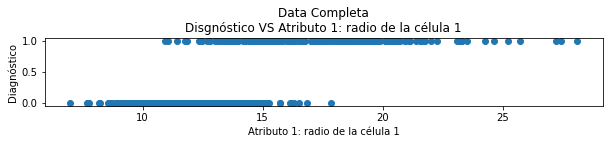

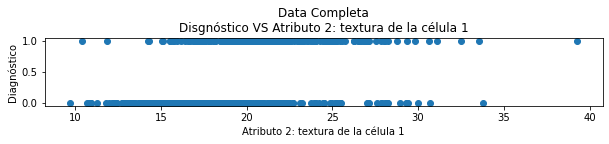

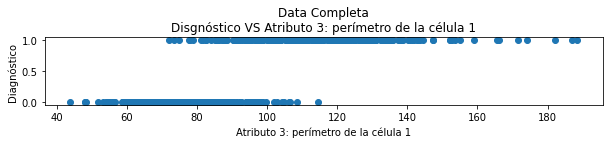

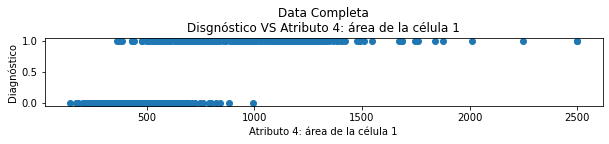

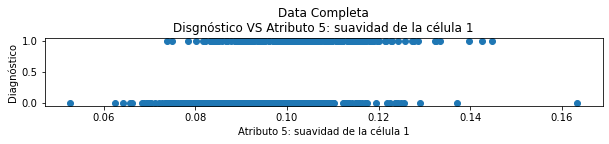

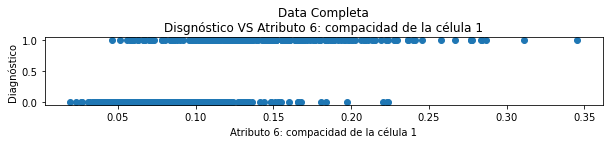

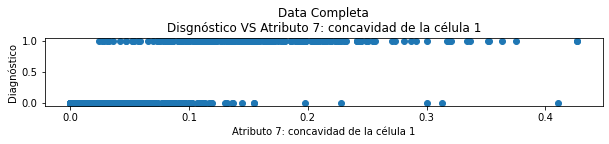

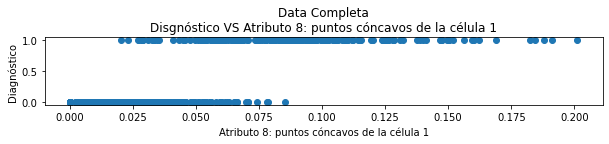

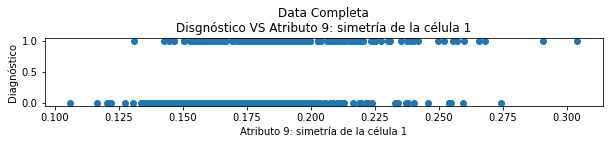

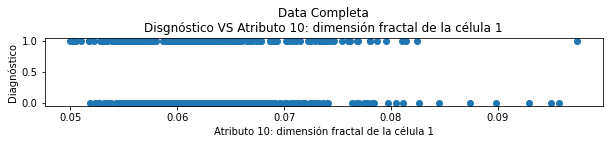

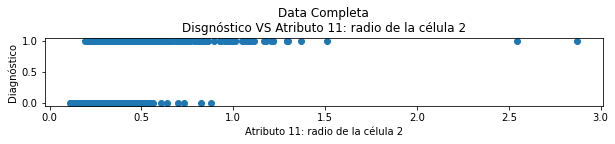

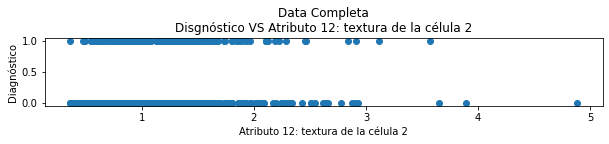

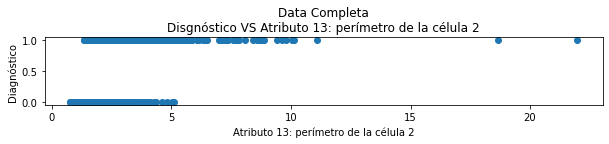

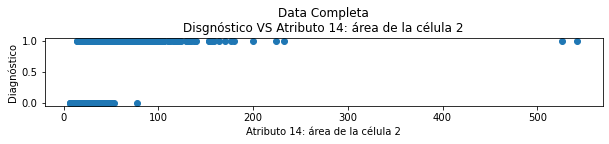

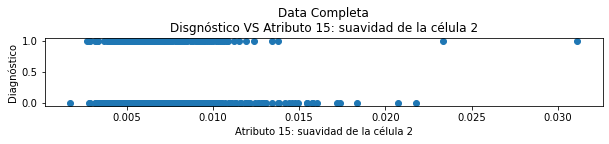

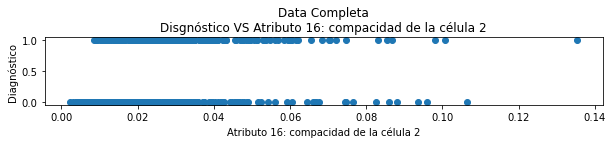

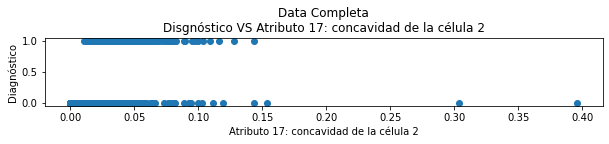

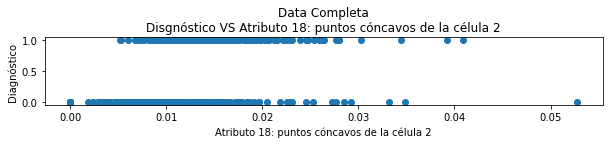

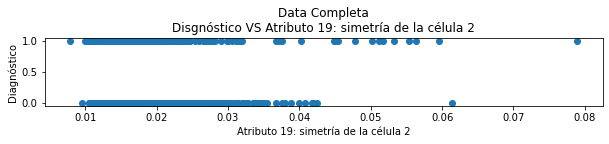

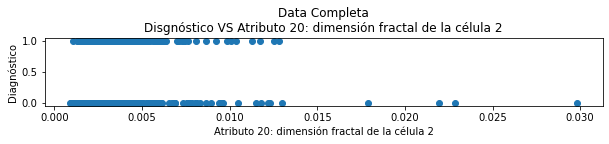

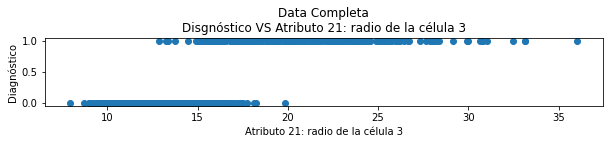

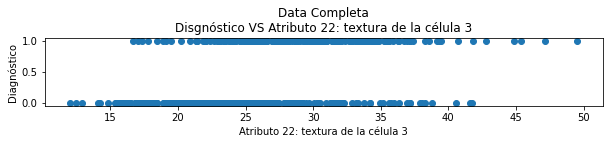

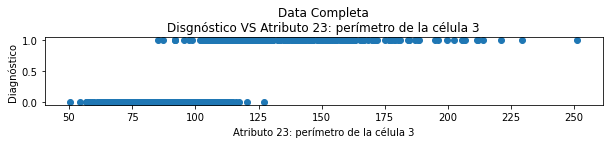

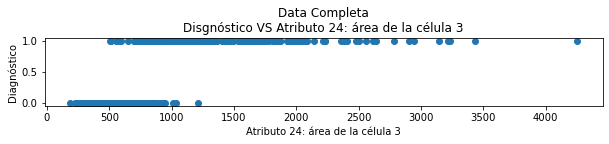

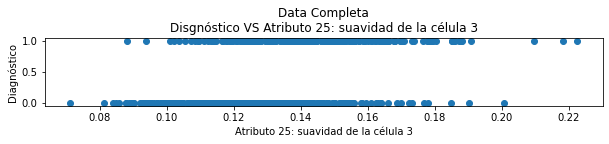

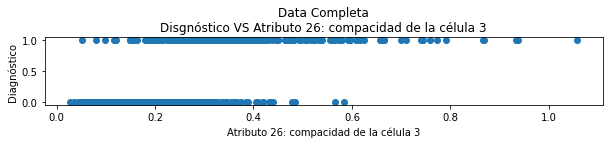

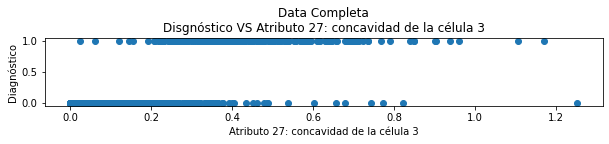

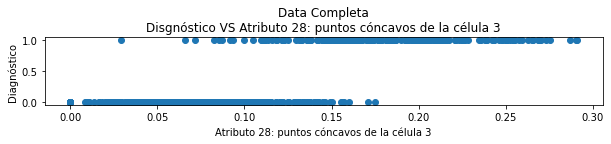

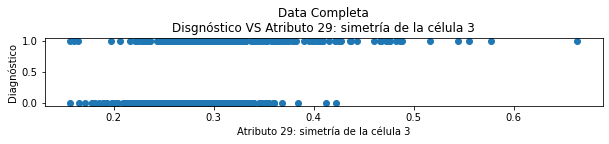

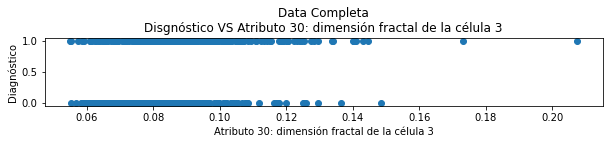

In [1336]:
# Scatter Plot de los atributos de entrada respecto al atributo de salida
ScatterPlotAllto1Sep( file_wdbc2, varnames, 'Data Completa' )

Como se puede apreciar en las figuras anteriores, todos los atributos presentan un comportamiento similar: entre mayor sea el valor del atributo de entrada, los valores del atributo de salida, diagnóstico, tiende a ser 1, pero claramente es una tendencia un poco difusa, ya que, para todos los datos, sin excepción, existe un amplio espectro de valores donde el diagnóstico es 1 y donde el mismo vale 0.

Dicha tendencia pudiera ser más clara al eliminar los valores atípicos.

\vspace{1cm}
\subsection{\scshape\large Distribución de los datos}

La distribución de los datos para cada atributo a considerar es un elemento de interés al momento de realizar análisis estadísticos de cualquier tipo.

Es importante destacar que solo resulta válido el estudio de la distribución de datos mediante histogramas para variables de naturaleza continua. No tiene relevancia para variables discretas

A continuación, se presentan las distribuciones de cada atributo de la base de datos.

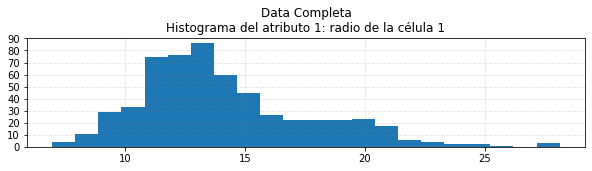

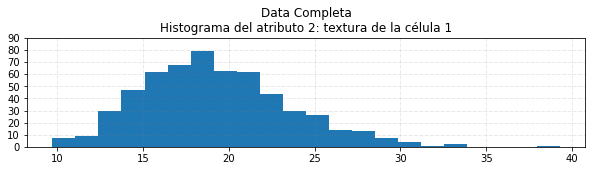

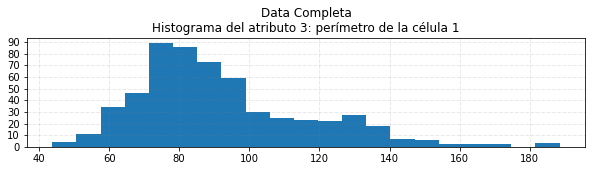

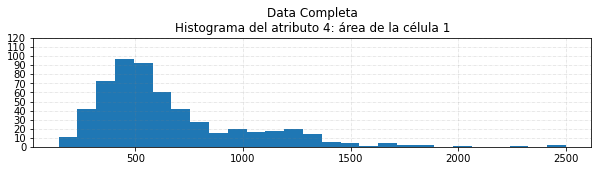

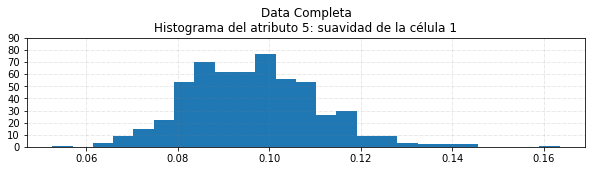

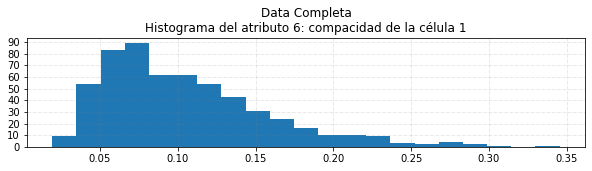

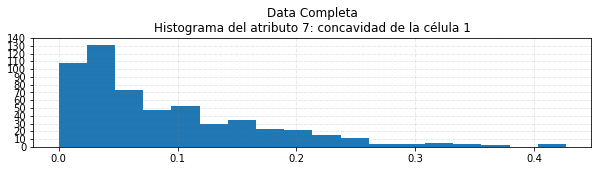

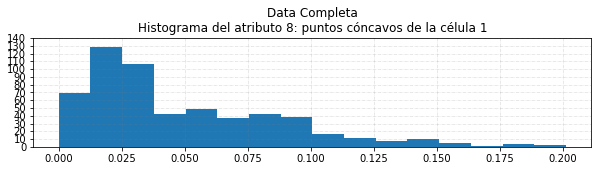

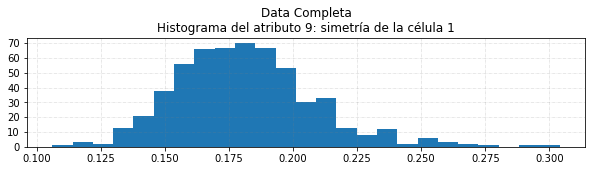

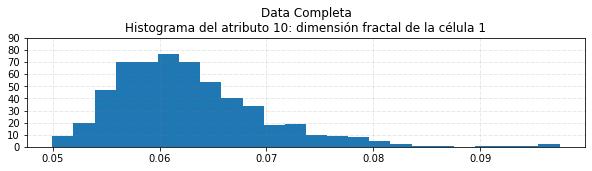

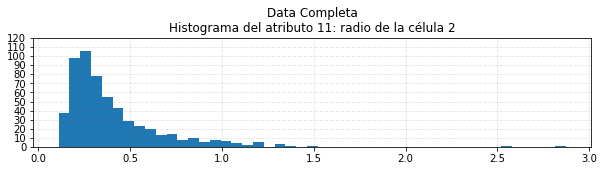

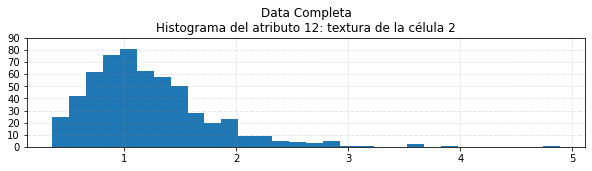

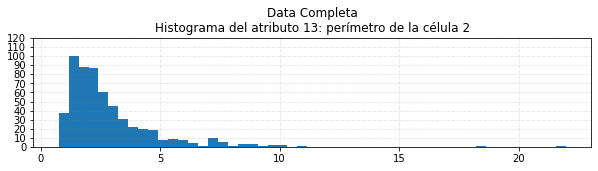

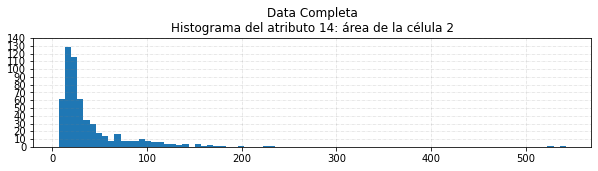

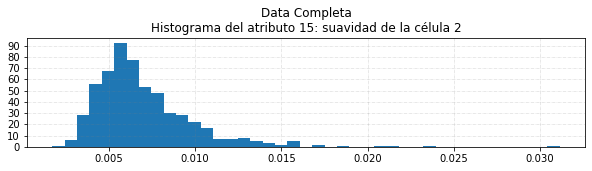

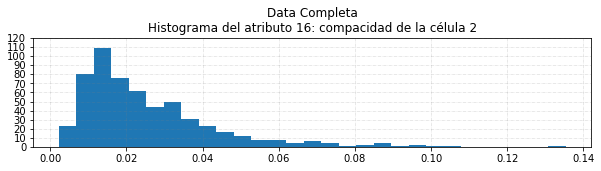

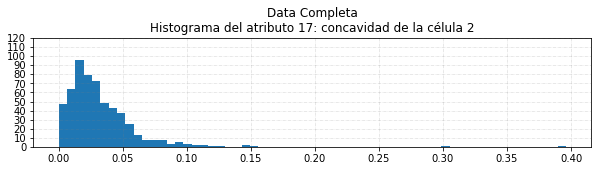

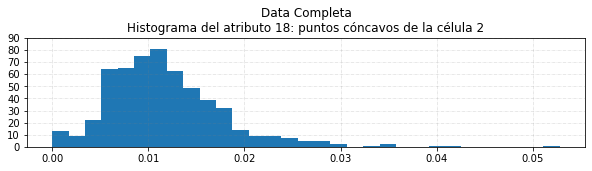

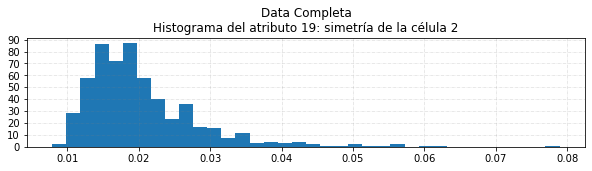

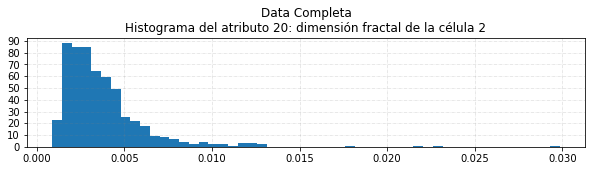

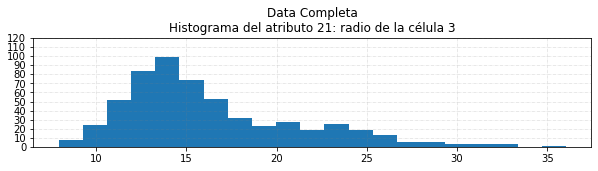

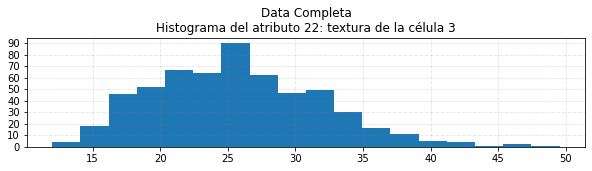

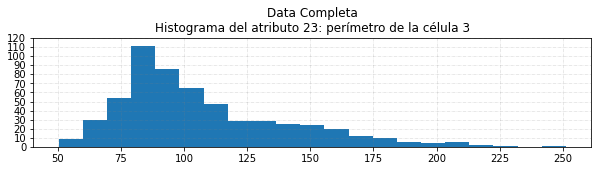

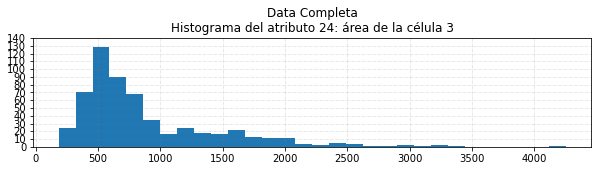

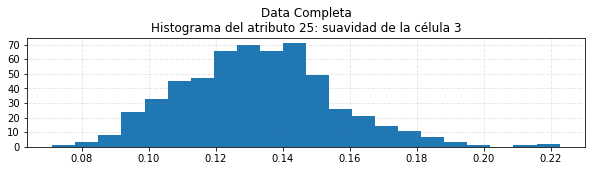

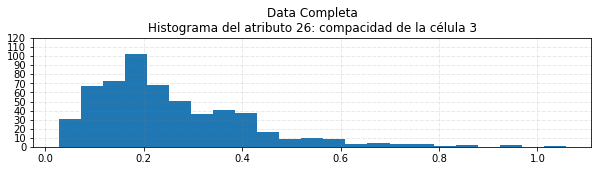

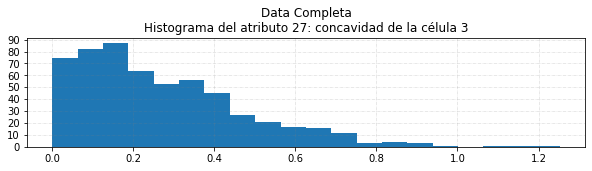

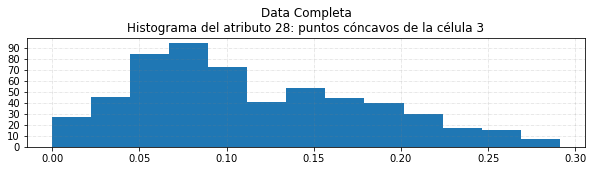

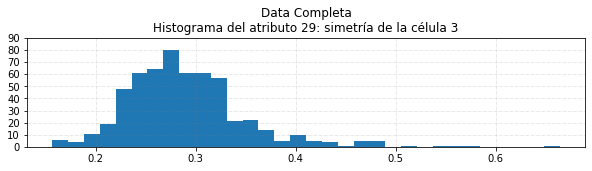

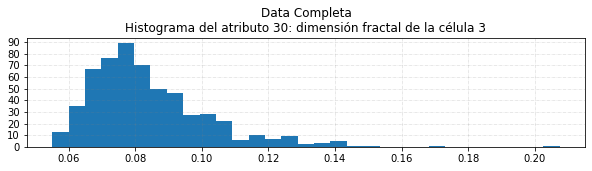

In [1337]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc2[:, 1:] , varnames[1:] , 'Data Completa' )

Como se mencionó antes, los histogramas permiten corroborar el comportamiento mencionado de las variables media, mediana, máximo, mínimo, rango, asimetría y curtosis de forma visual.

Otro punto importante en el estudio de los datos para posibles modelos es la correlación entre los atributos de entrada y el de salida. Este es el siguiente paso en el estudio estadístico.

\vspace{1cm} \subsection{\scshape\large Correlación entre los atributos de los datos}

Para el estudio de parentesco (correlación) entre los atributos, para este trabajo se implementa la correlación de Pearson, la cual viene definida por la siguiente expresión.


\begin{align*}
	r_{x,y} = \frac{ \sum_{i=0}^N{ {\sigma}_x {\sigma}_y } }{N}
\end{align*}


In [1338]:

#Correlaciones de Pearson de todos los atributos de entrada con el atributo de salida.

corr_file_wdbc2 = np.corrcoef(np.transpose(file_wdbc2))

np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}, suppress = True)
print(corr_file_wdbc2[:,0])


[1.00000 0.73003 0.41519 0.74264 0.70898 0.35856 0.59653 0.69636 0.77661
 0.33050 -0.01284 0.56713 -0.00830 0.55614 0.54824 -0.06702 0.29300
 0.25373 0.40804 -0.00652 0.07797 0.77645 0.45690 0.78291 0.73383 0.42146
 0.59100 0.65961 0.79357 0.41629 0.32387]


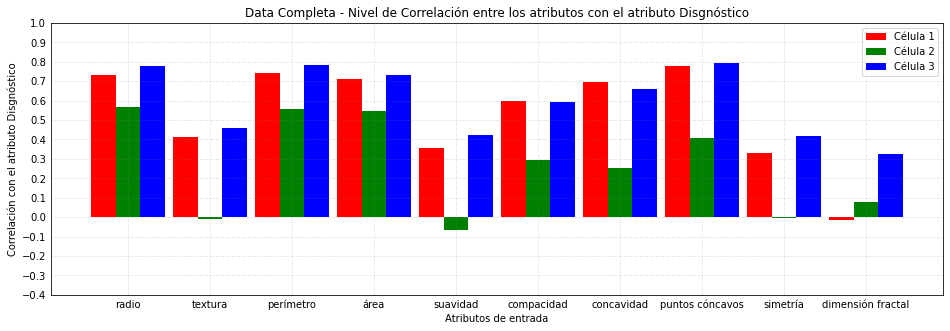

In [1339]:
# Se presenta los resultados de la correlación de todos los atributos de entrada respecto al atributo de salida
barPlot_1Corr( corr_file_wdbc2[1:,0], varnames, 'Data Completa' )

De esta primer apreciación de los valores arrojado por la correlación de Pearson muestra una clara tendencia para la mayoría de los valores arrojados por las mediciones de los atributos asociados a las células 1 y 3, que tienden a comportarse similarmente con el atributo de Diagnóstico, mientras que las mediciones de los atributos asociados a la célula 2 tienden a discernir en mayor medida del atributo diagnóstico, presentando en términos generales niveles de correlación menores que los atributos de las células 1 y 3 e, incluso, atributos que parecieran casi no tener ningún tipo de correlación con el atributo diagnóstico.

Los atributos que tienen mayor correlación con el atributo diagnóstico son radio, perímetro, área convacidad y puntos cóncavos, mientras que los atributos con menor correlación son suavidad, textura, simetría y dimensión fractal.

Cabe destacar que dichos resultados corresponden a la data completa, incluyendo los valores atípicos. Es importante realizar una inspección de los datos y la correlación de los mismos al extraer los valores atípicos a modo de comparar las tendencias.

\vspace{1cm}
\subsection{\scshape\large Sustracción de valores atípicos}

Habiendo entendido la naturaleza de la base de datos, previo al desarrollo del modelo de regresión logística, es importante remover las muestras que puedan presentar valores atípicos, de modo que se facilite el entrenamiento del modelo.

\subsection{\scshape\large Sustracción de valores atípicos: Distribución Intr-Quartel (IQR)}

El IQR es comúnmente usado como una medida de dispersión de datos que permite discriminar posibles valores atípicos presentes en la data a utilizar.

Es una forma de medida de dispersión de data, donde se establecen los valores medios, y los valores considerados extremos según el criterio presentado en la Figura anterior.


\begin{figure}
    \centering
    \includegraphics[width=0.5\textwidth]{IQR_Boxplot.png}
\end{figure}

\centerline{ Figure 2.3.1: }

Y las expresiones matemáticas con las que se calculan cada uno de los elementos de interés del IQR se presentan son:

\begin{align*}
    Q_1 \, = \, mediana & (Data[ Data \, < \, mediana(Data) ])   \\
    Q_2 & \, = \, mediana(Data)                                  \\
    Q_3 \, = \, mediana & (Data[ Data \, > \, mediana(Data) ])   \\
    & IQR = Q_3 - Q_1                                           
\end{align*}


In [1340]:
# cálculo de los parámetros Q_1, Q_2, Q_3 e IQR
IQRparamCalc( file_wdbc2[:,1:] )

Q1 de los atributos es:
[1.17000e+01 1.61700e+01 7.51700e+01 4.20300e+02 8.63700e-02 6.49200e-02
 2.95600e-02 2.03100e-02 1.61900e-01 5.77000e-02 2.32400e-01 8.33900e-01
 1.60600e+00 1.78500e+01 5.16900e-03 1.30800e-02 1.50900e-02 7.63800e-03
 1.51600e-02 2.24800e-03 1.30100e+01 2.10800e+01 8.41100e+01 5.15300e+02
 1.16600e-01 1.47200e-01 1.14500e-01 6.49300e-02 2.50400e-01 7.14600e-02]

Q2 de los atributos es:
[1.33700e+01 1.88400e+01 8.62400e+01 5.51100e+02 9.58700e-02 9.26300e-02
 6.15400e-02 3.35000e-02 1.79200e-01 6.15400e-02 3.24200e-01 1.10800e+00
 2.28700e+00 2.45300e+01 6.38000e-03 2.04500e-02 2.58900e-02 1.09300e-02
 1.87300e-02 3.18700e-03 1.49700e+01 2.54100e+01 9.76600e+01 6.86500e+02
 1.31300e-01 2.11900e-01 2.26700e-01 9.99300e-02 2.82200e-01 8.00400e-02]

Q3 de los atributos es:
[1.57800e+01 2.18000e+01 1.04100e+02 7.82700e+02 1.05300e-01 1.30400e-01
 1.30700e-01 7.40000e-02 1.95700e-01 6.61200e-02 4.78900e-01 1.47400e+00
 3.35700e+00 4.51900e+01 8.14600e-03 3.24500e-02

(array([0.00000e+00, 1.17000e+01, 1.61700e+01, 7.51700e+01, 4.20300e+02,
        8.63700e-02, 6.49200e-02, 2.95600e-02, 2.03100e-02, 1.61900e-01,
        5.77000e-02, 2.32400e-01, 8.33900e-01, 1.60600e+00, 1.78500e+01,
        5.16900e-03, 1.30800e-02, 1.50900e-02, 7.63800e-03, 1.51600e-02,
        2.24800e-03, 1.30100e+01, 2.10800e+01, 8.41100e+01, 5.15300e+02,
        1.16600e-01, 1.47200e-01, 1.14500e-01, 6.49300e-02, 2.50400e-01,
        7.14600e-02]),
 array([0.00000e+00, 1.33700e+01, 1.88400e+01, 8.62400e+01, 5.51100e+02,
        9.58700e-02, 9.26300e-02, 6.15400e-02, 3.35000e-02, 1.79200e-01,
        6.15400e-02, 3.24200e-01, 1.10800e+00, 2.28700e+00, 2.45300e+01,
        6.38000e-03, 2.04500e-02, 2.58900e-02, 1.09300e-02, 1.87300e-02,
        3.18700e-03, 1.49700e+01, 2.54100e+01, 9.76600e+01, 6.86500e+02,
        1.31300e-01, 2.11900e-01, 2.26700e-01, 9.99300e-02, 2.82200e-01,
        8.00400e-02]),
 array([1.00000e+00, 1.57800e+01, 2.18000e+01, 1.04100e+02, 7.82700e+02,
     

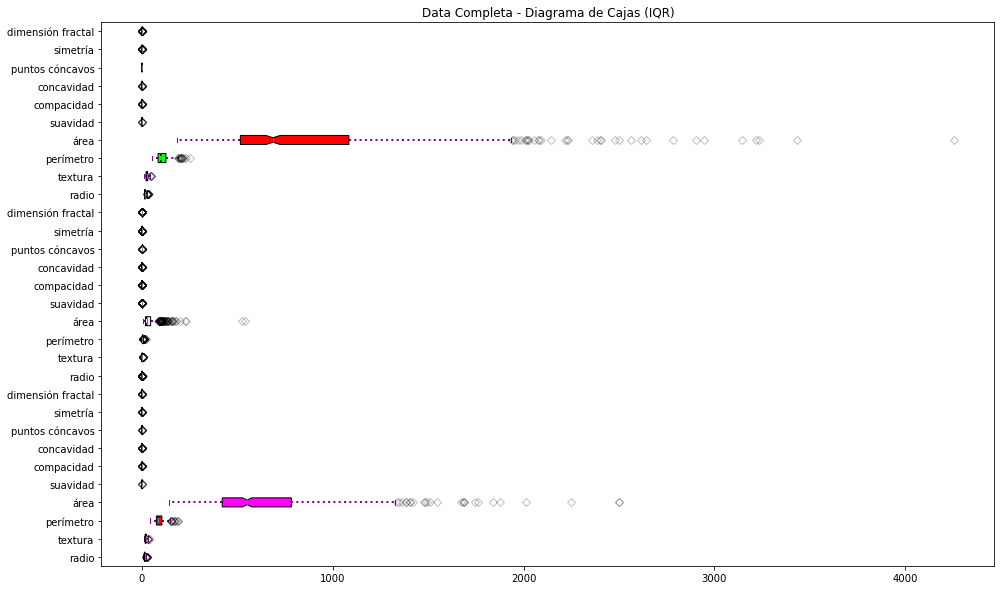

In [1341]:
# Boplot de todos los valores en una misma figura
BoxPlotAllin1( file_wdbc2[:,1:] , varnames[1:], 'Data Completa' )

Como se logra apreciar en la figura anterior, claramente existe un grupo de muestras que poseen
valores atípicos en varios atributos.

Adicionalmente, la diferencia entre órdenes de magnitud de los atributos es tan significativa que al
compararlos todos juntos en un mismo gráfico (ver gráfico anterior), no es posible apreciar los valores
de muchos de estos atributos.

En consecuencia, se presentar los resultados para cada atributo por separado.

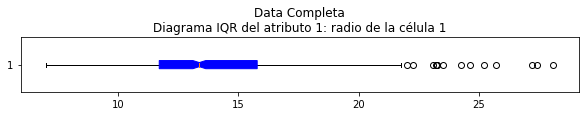

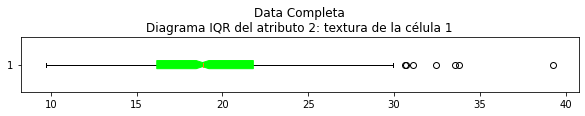

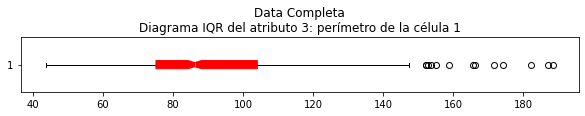

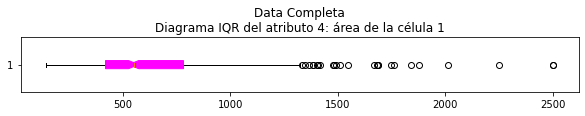

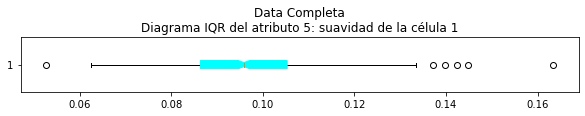

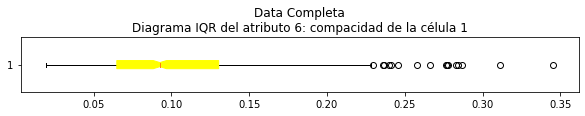

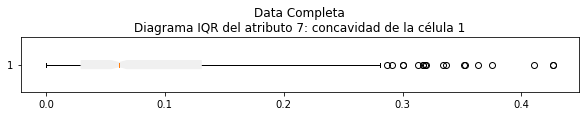

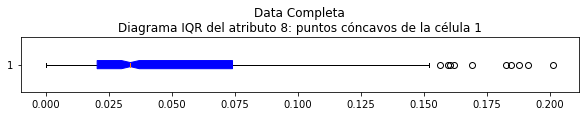

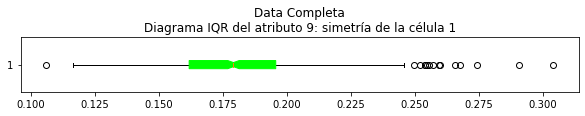

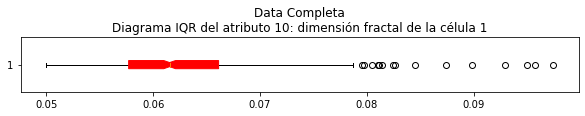

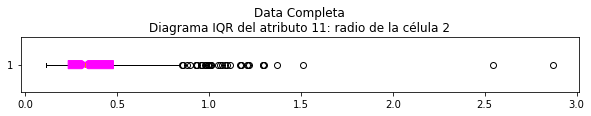

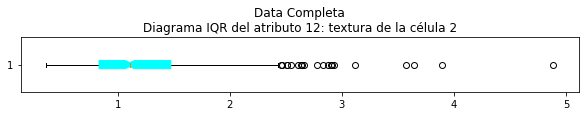

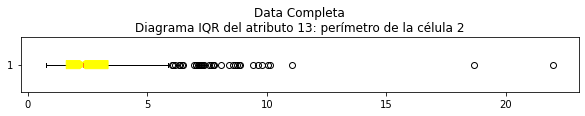

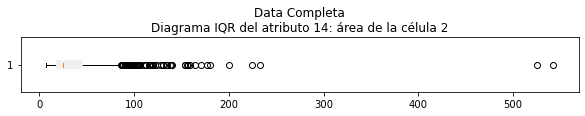

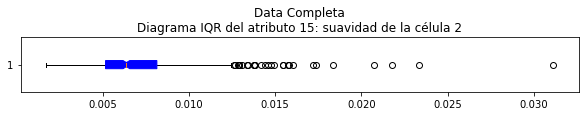

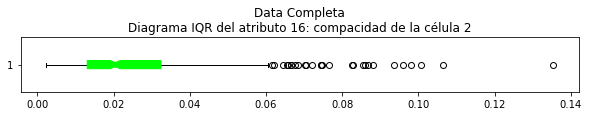

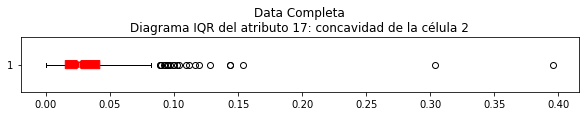

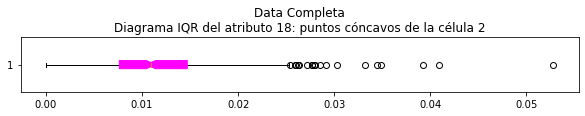

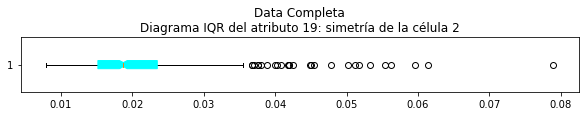

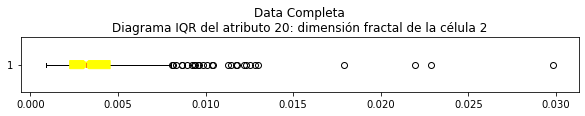

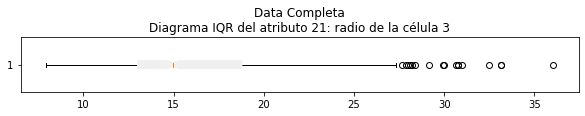

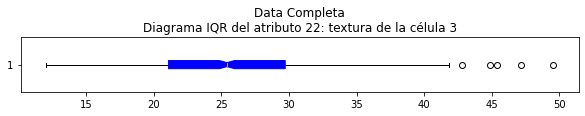

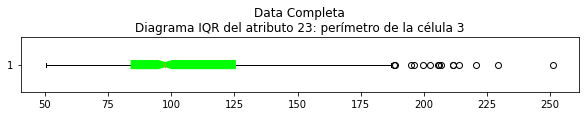

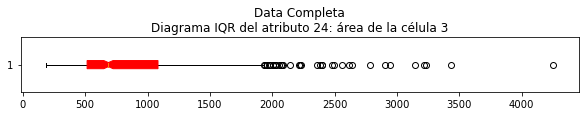

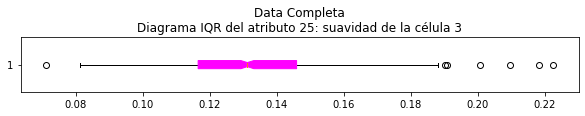

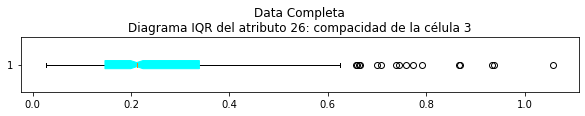

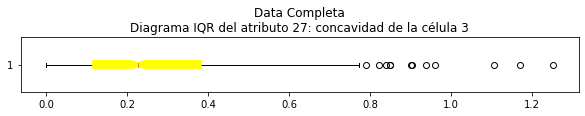

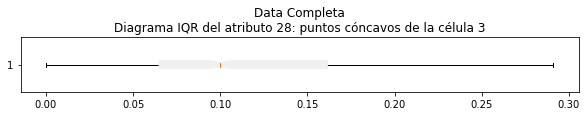

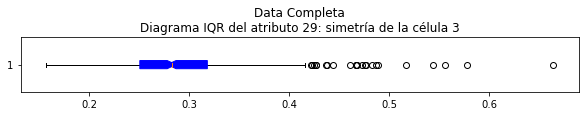

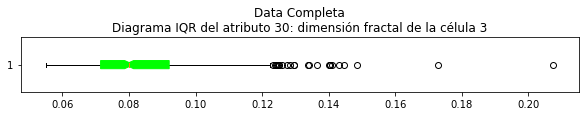

In [1342]:
 # diagrama de cajas de los atributos por separado
BoxPlotSep( file_wdbc2[:,1:] , varnames[1:], 'Data Completa' )

De las figuras anteriores, se puede apreciar con mayor facilidad la existencia de varios valores atípicos en cada atributos asociados a las muestras que componen la base de datos.

Por esta razón, se deben remover dichos valores, de modo que el algoritmo de regresión logística
pueda.

In [1343]:
# Extracción de las muestras con valores atípicos
file_wdbc3 = AtipValueRemv( file_wdbc2 )

Cantidad de Muestras Restantes

In [1344]:
#Cantidad de muestras restantes
np.size(file_wdbc3,0)

398

Cantidad de muestras extraidas de la data

In [1345]:
#Cantidad de muestras con valores removidas
np.size(file_wdbc2,0) - np.size(file_wdbc3,0)

171

Porcentaje de las muestras removidas respecto a las totales

In [1346]:
# Porcentaje de valores atípicos extraídos respecto a la data completa original
#np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}, suppress = True)
print( "{:.5f}".format( (1 - np.size(file_wdbc3,0)/np.size(file_wdbc2,0)) * 100) )

30.05272


Como se puede apreciar, en este caso, la cantidad de muestras que poseen al menos un valor atípico en alguno de sus atributos supera el 30.05% de los datos, lo que resulta ser bastante significante.

Si bien es cierto, se tiene aún casi 69.95% de la data para estudiar, igualmente el remover todss las muestras con algún valor atípico representa una pérdida significativa de datos (de información) para el modelo.

Siguiendo este orden de ideas, pudiera resultar necesario repetir el modelo para la data completa (considerando valores atípicos) y comparar el desempeño a fin de validar el mejor resultado.

\vspace{1cm} 
\subsection{\scshape\large Estudio estadístico de la data sin valores atípicos}

Una vez habiendo eliminado los valores atípicos de la data, se procede a determinar los valores de las variables estadísticas de interés, así como los histogramas de los la data restante.

In [1347]:

#cálculo de los parámetros estadísticos

file_wdbc3_Mean,  file_wdbc3_Median, file_wdbc3_Mode, file_wdbc3_Max, 
file_wdbc3_Min, file_wdbc3_Range, file_wdbc3_Desv, file_wdbc3_Skew,
file_wdbc3_Kurt = StatsVars( file_wdbc3, 'Data sin valores atípicos')


la media de los atributos para la Data sin valores atípicos es:
[1.33762e+01 1.85059e+01 8.64033e+01 5.70548e+02 9.32712e-02 8.62601e-02
 6.04422e-02 3.59022e-02 1.73639e-01 6.12106e-02 3.06608e-01 1.09231e+00
 2.15344e+00 2.65130e+01 6.38967e-03 1.96887e-02 2.40143e-02 9.91030e-03
 1.86319e-02 2.99774e-03 1.50876e+01 2.47230e+01 9.86405e+01 7.28472e+02
 1.28684e-01 2.11521e-01 2.13448e-01 9.63329e-02 2.79092e-01 7.95285e-02]

la mediana de los atributos para la Data sin valores atípicos es:
[1.29950e+01 1.81750e+01 8.40650e+01 5.18300e+02 9.23850e-02 7.94550e-02
 4.55800e-02 2.82950e-02 1.72250e-01 6.08550e-02 2.73450e-01 1.03200e+00
 1.97000e+00 2.11950e+01 6.00200e-03 1.70350e-02 2.06100e-02 9.40800e-03
 1.79200e-02 2.73000e-03 1.43950e+01 2.45850e+01 9.39050e+01 6.32500e+02
 1.28900e-01 1.88300e-01 1.81100e-01 8.49850e-02 2.75750e-01 7.80300e-02]

la moda de los atributos para la Data sin valores atípicos es:
ModeResult(mode=array([[1.23400e+01, 1.49300e+01, 8.26100e+01, 5.12200e+0

Al extraer los valores atípicos del modelo, no se obtiene un gran cambio en el comportamiento de las medidas estadísticas, mostrando la necesidad de estandarizar los datos.

En los siguientes incisos se presentan los scatter plots e histogramas del comportamiento actual de los atributos sin valores atípicos.

\vspace{1cm} \subsection{\scshape\large Diagrama de dispersión de los atributos sin valores atípicos}

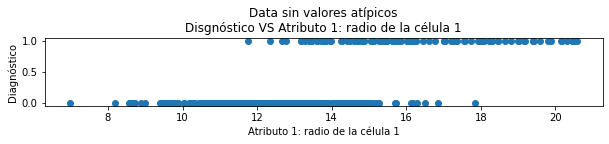

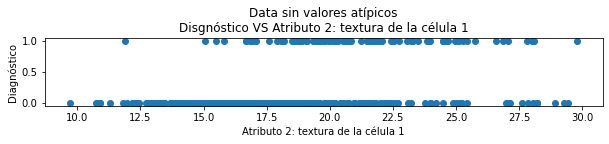

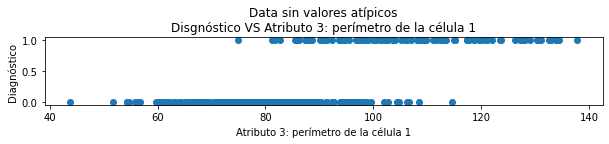

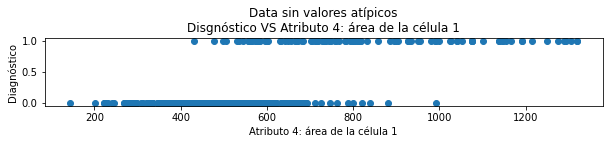

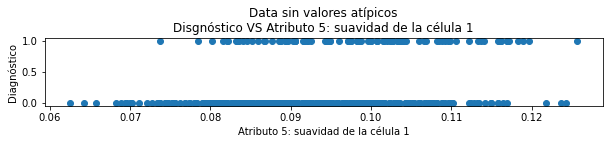

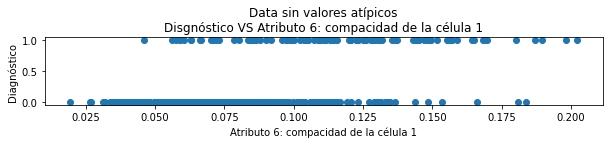

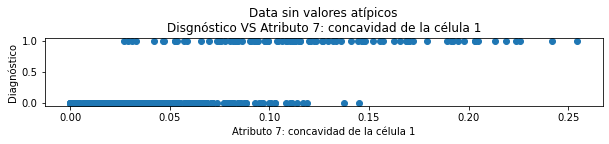

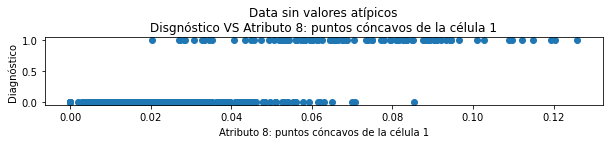

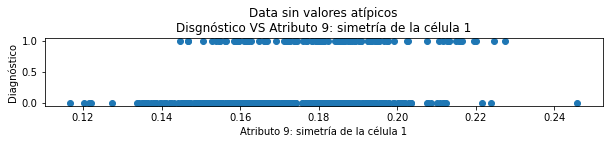

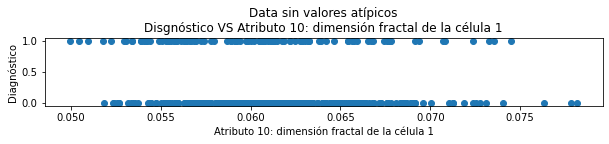

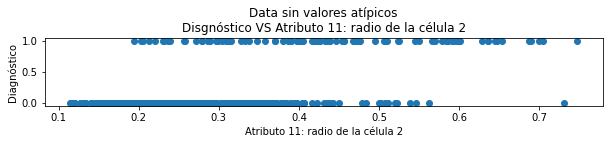

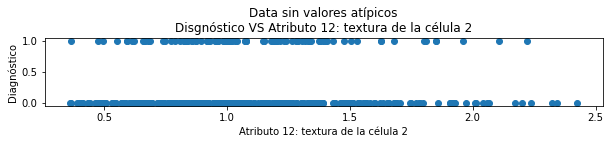

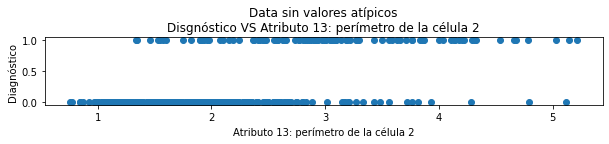

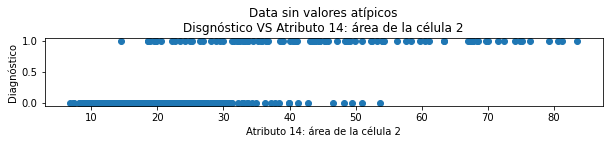

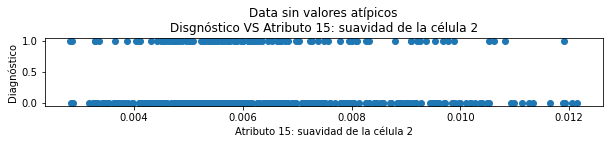

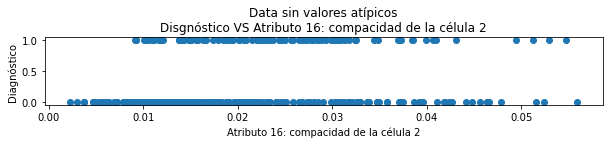

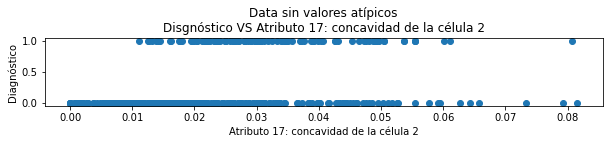

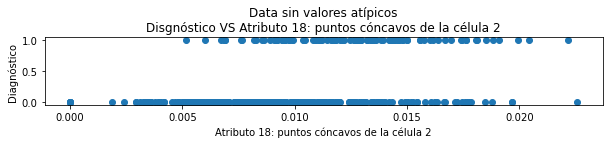

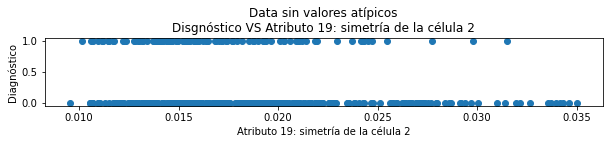

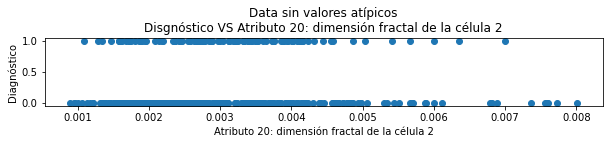

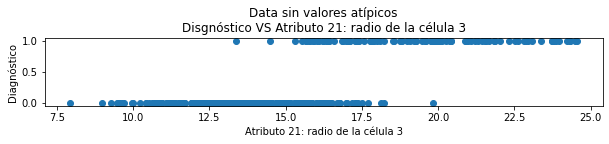

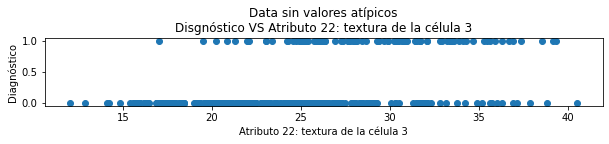

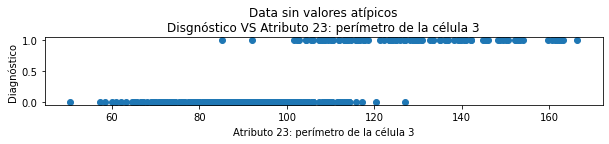

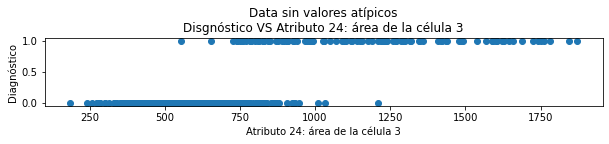

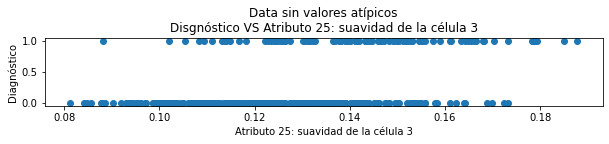

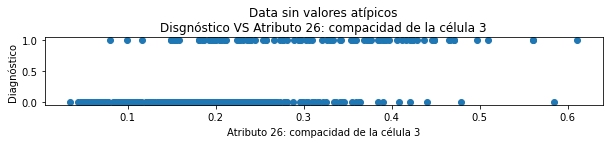

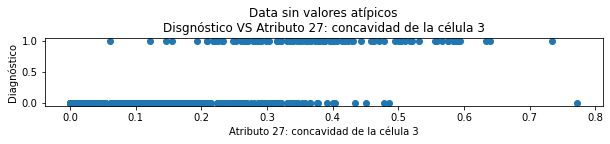

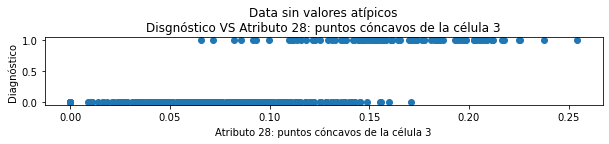

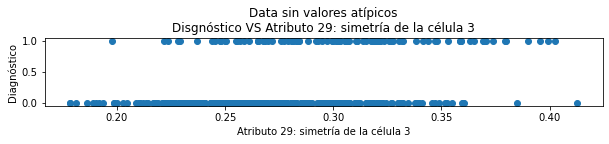

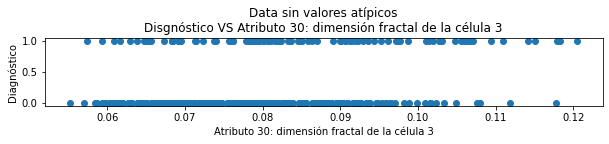

In [1348]:
# Scatter Plot de los atributos de entrada respecto al atributo de salida
ScatterPlotAllto1Sep( file_wdbc3, varnames, 'Data sin valores atípicos' )

De las figuras anteriores, se aprecia que, en comparación a los diagramas de dispersión de la data completa, al quitar los valores atípicos, la tendencia se vuelve más clara para la mayoría de los atributos: al ser menor sea el valor del atributo, mayor será la tendencia de un diagnóstico igual a 0, pero al ser mayor, el diagnóstico tenderá a 1.

Sin embargo, existen algunos atributos donde la tendencia sigue siendo difusa y otros en los que, literalmente, parece no haber una correlación directa; es decir, para cualquier valor de dicho atributo se pudiera tener un diagnóstico tanto 0 como 1.

\vspace{1cm} \subsection{\scshape\large Diagramas de distribución de los atributos sin valores atípicos}

Los histogramas de los atributos sin valores atípicos se muestran a continuación.

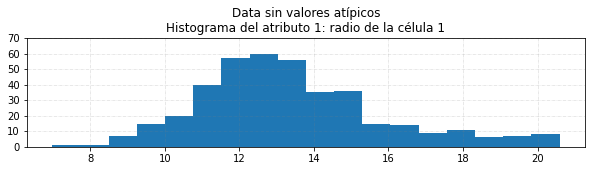

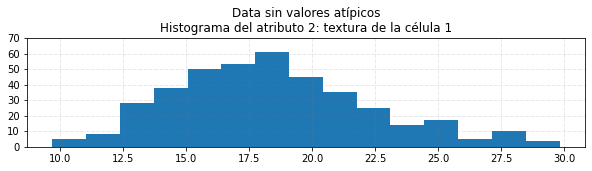

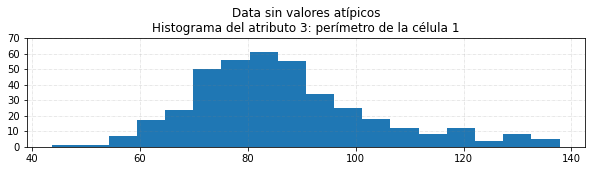

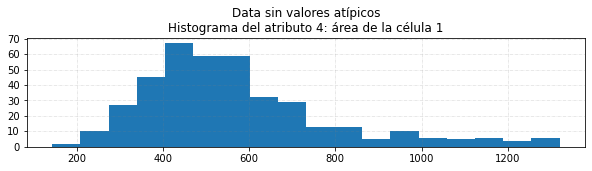

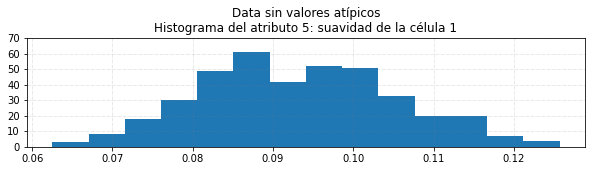

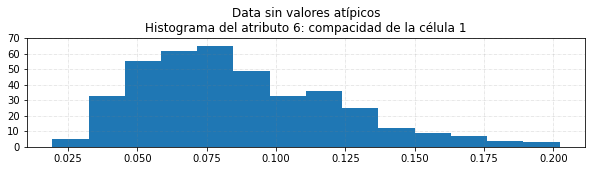

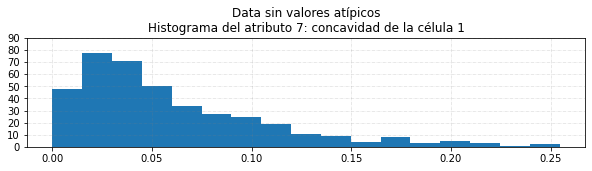

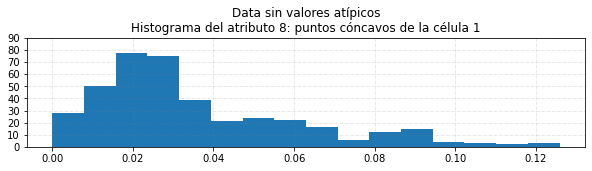

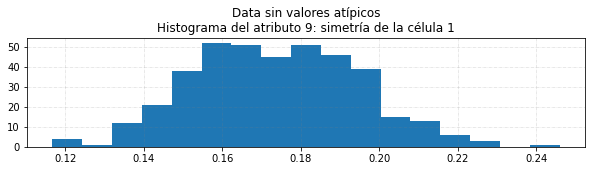

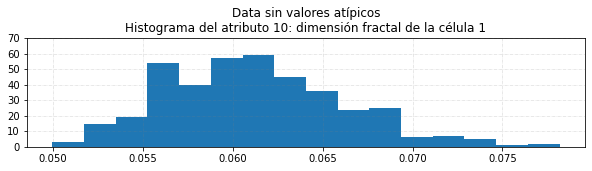

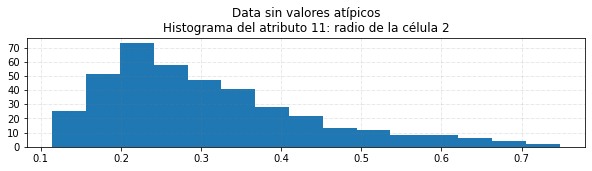

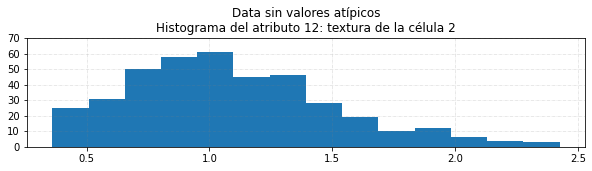

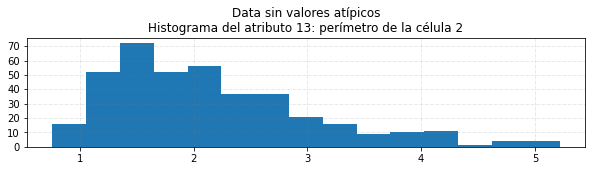

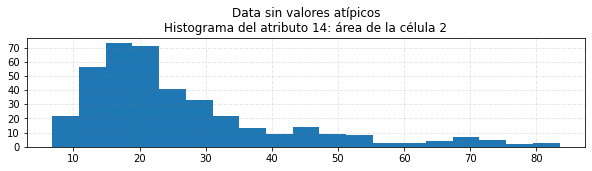

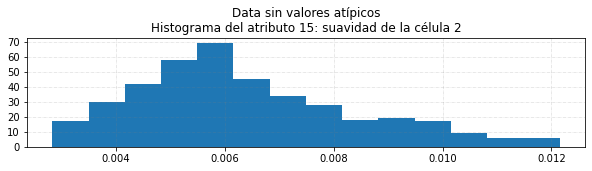

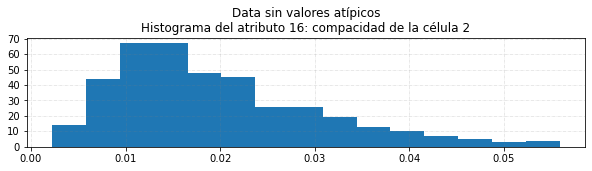

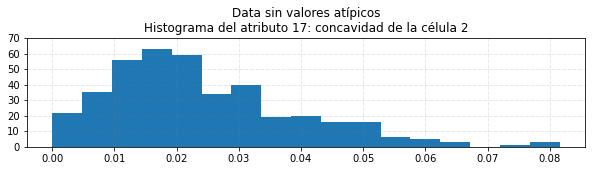

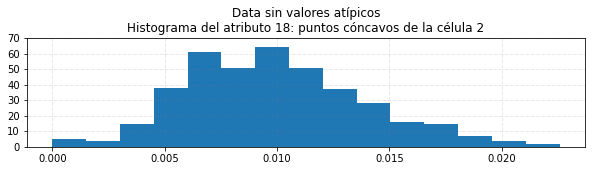

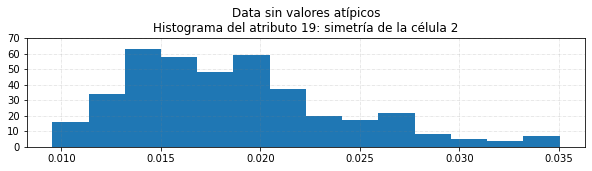

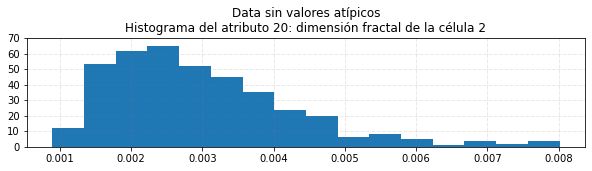

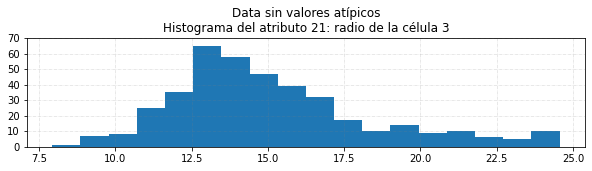

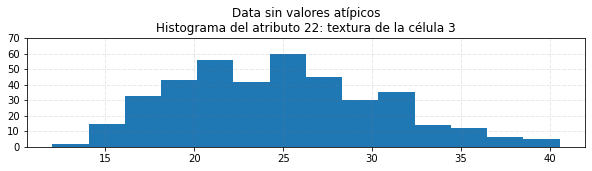

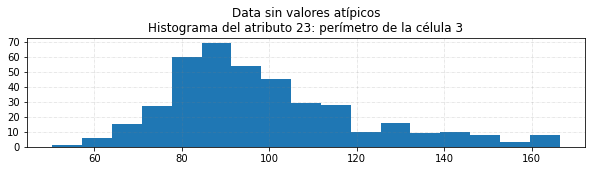

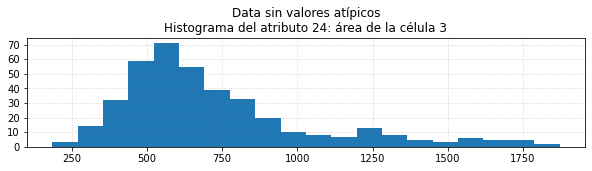

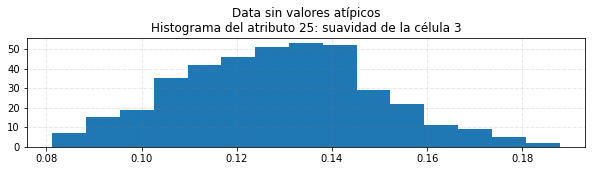

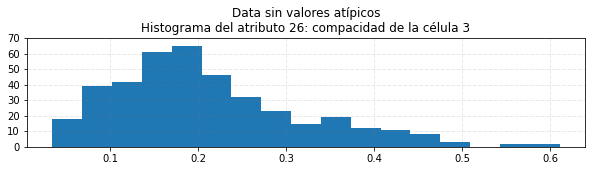

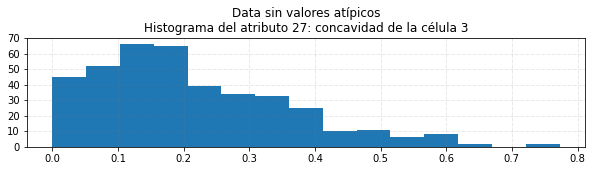

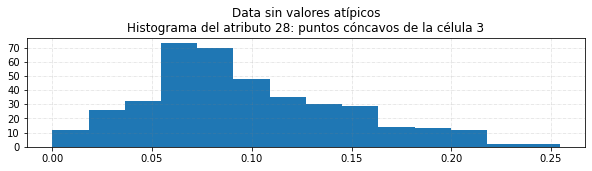

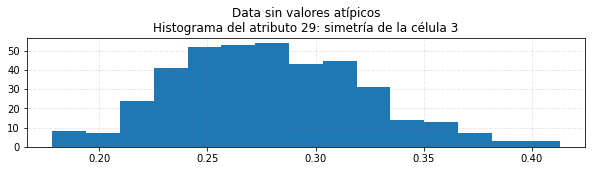

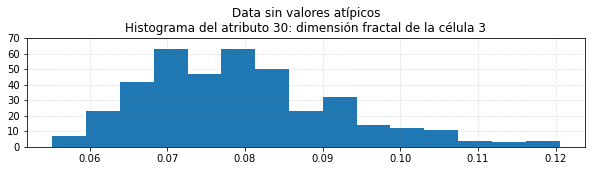

In [1349]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc3[:, 1:] , varnames[1:] , 'Data sin valores atípicos' )

Como se puede apreciar, al eliminar los valores atípicos de los atributos, los mismos presentan histogramas con un comportamiento más cercano al de una Gaussiana, pero igualmente distante de lo deseado para implementar la data en el modelo de regresión.

\vspace{1cm} \subsection{\scshape\large Correlación entre los atributos de los datos}

In [1350]:

#Correlaciones de Pearson de todos los atributos de entrada con el atributo de salida.

corr_file_wdbc3 = np.corrcoef(np.transpose(file_wdbc3))

np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}, suppress = True)
print(corr_file_wdbc3[:,0])


[1.00000 0.68070 0.38860 0.69584 0.69801 0.27157 0.51435 0.71057 0.75219
 0.24359 -0.08663 0.57184 0.00776 0.56591 0.70372 -0.03603 0.22910 0.32597
 0.38797 -0.19489 0.06280 0.76108 0.43791 0.76819 0.77363 0.39685 0.53400
 0.65330 0.72664 0.34741 0.29082]


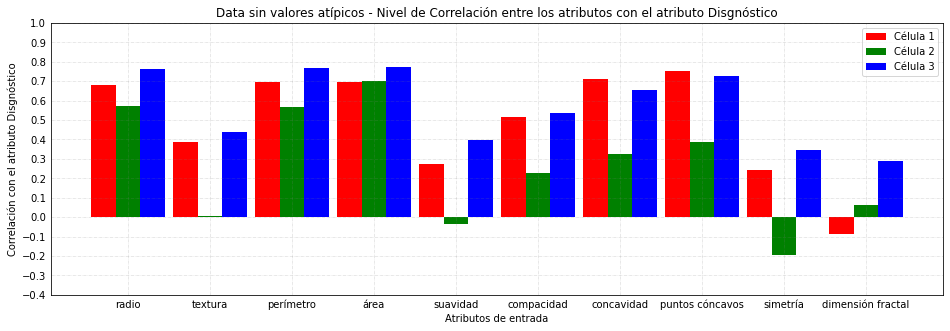

In [1351]:
# Se presenta los resultados de la correlación de todos los atributos de entrada respecto al atributo de salida
barPlot_1Corr( corr_file_wdbc3[1:,0], varnames, 'Data sin valores atípicos' )

Como se aprecia en la figura anterior, la tendencia del comportamiento es la misma que con la data completa, incluyendo los valores atípicos. las diferencias son pequeñas.

A modo de cuantizar dichas diferencias, se procede a determinar la diferencia entre los valores obtenidos respecto a la arrojada tomando en cuenta los valores atípicos.

In [1352]:
# Evaluación de la mejora de las correlaciones entre atributos al eliminar los valores atípicos
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}, suppress = True)

print(corr_file_wdbc3[:,0] - corr_file_wdbc2[:,0])

[0.00000 -0.04932 -0.02659 -0.04680 -0.01098 -0.08699 -0.08219 0.01421
 -0.02442 -0.08691 -0.07379 0.00471 0.01606 0.00977 0.15548 0.03099
 -0.06390 0.07224 -0.02007 -0.18837 -0.01517 -0.01537 -0.01899 -0.01472
 0.03980 -0.02462 -0.05700 -0.00631 -0.06693 -0.06889 -0.03305]


Con dicha operación se observa que los alores de correlación entre los atributos de entrada respecto al atributo de salida disminuye en la gran mayoría de los casos si se compara con su respectivo vapor de correlación considerando los valores atípicos.

Esto pudiera indicar que la data extraída posee información que pudiera ser relevante para el proceso.

No obstante, se sigue con la data sin valores atípicos. Posteriormente se realizan consideraciones al respecto de esto.

\vspace{1cm} 
\subsection{\scshape\large Transformación de la data}

A continuación, se procede a normalizar la data tanto con valores atípicos, como la data sin estos.

Es importante mencionar que, debido a que la base de datos tiene valores típicos iguales a 0.0, es necesario implementar metodologías de transformación que sean aplicados para un conjunto de datos más amplios que solo aquellos conformados por valores estrictamente positivos. En este caso, deben poder incluir el 0.

Por esta razón, transformaciones como la transformación logarítmica y la transformación Box-Cox quedan descartadas. Al no tener valores negativos, se puede implementar la transformación de raíz cuadrada, pero si existieran valores negativos, debería implementarse una transformación de raíz cúbica.

Ambos conjuntos de datos son sometidos a tres metodologías de transformación de datos: Transformación mediante una raíz cuadrada, transformada de logaritmo ajustado (adaptación de la transformada logarítmica para admitir valores negativos) y transformación Yeo-Johnson (equivalente a la transformada Box-Cox para valores positivos y negativos). Las expresiones matemáticas correspondientes son las siguientes:


\begin{itemize}
    \item[$2.5.a$] Tranformada raíz cuadrada:
\end{itemize}


\begin{align*}
	u(x) = \sqrt{x}
\end{align*}


\begin{itemize}
    \item[$2.5.c$] Transformación logarítmica ajustada:
\end{itemize}



\begin{align*}
	u(x) = \ln{ (x + 1 - min(x))}
\end{align*}



\begin{itemize}
    \item[$2.5.c$] Transformación Yeo-Johnson:
\end{itemize}


\begin{align*}
	u(x) = 
  \begin{cases} \begin{array}{l}
     \ln(x + 1) \quad $sí$ \quad  \lambda = 0 \;$\&$\; x > 0     \\[5pt]
     \frac{({(x + 1)}^{\lambda}-1)}{\lambda} \quad $sí$ \quad  \lambda \neq 0 \;$\&$\; x > 0     \\[5pt]
     -\ln(-x + 1) \quad $sí$ \quad  \lambda = 2 \;$\&$\; x < 0     \\[5pt]
     \frac{({(-x + 1)}^{2-\lambda}-1)}{2-\lambda} \quad $sí$ \quad  \lambda \neq 2 \;$\&$\; x < 0
  \end{array}	\end{cases}
\end{align*}

\vspace{1cm} \subsubsection{\scshape\large Normalización de la data sin valores atípicos}


\begin{itemize}
    \item[$2.5.1.a$] Aplicando la tranformada raíz cuadrada:
\end{itemize}


In [1353]:

# Inicializamos la variable de los datos que serán transformados
file_wdbc4 = np.copy(file_wdbc3)

# Se implementa la transformación en todos los atributos de salida
file_wdbc4[:, 1:] = np.sqrt( file_wdbc4[:, 1:] )


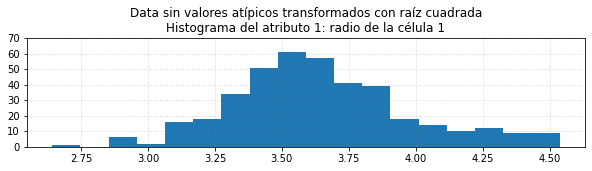

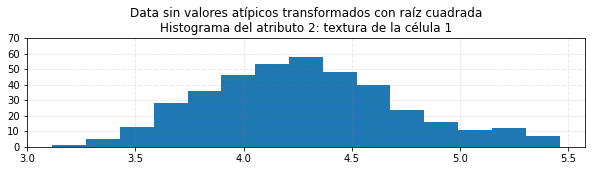

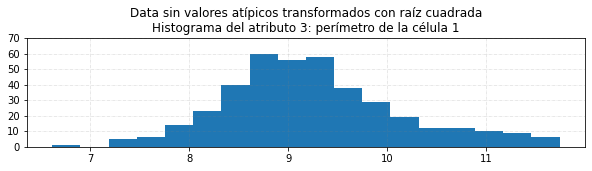

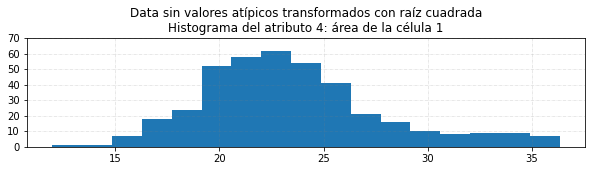

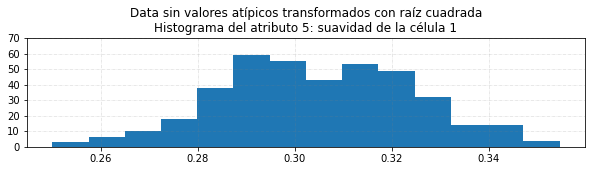

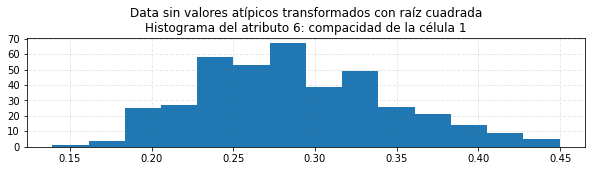

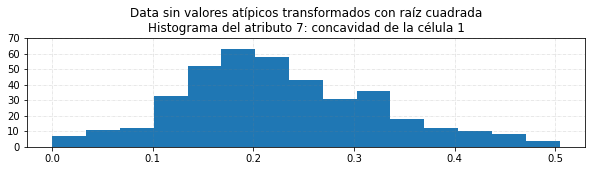

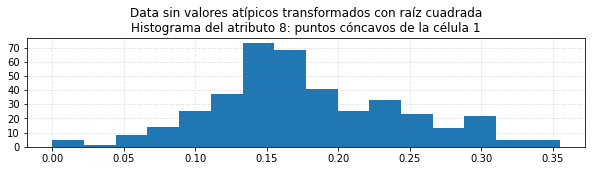

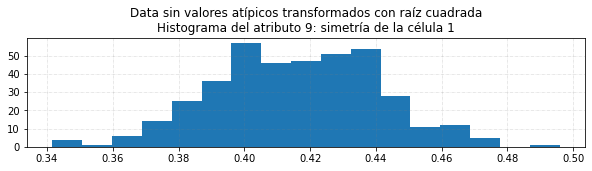

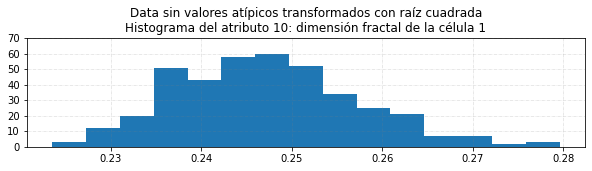

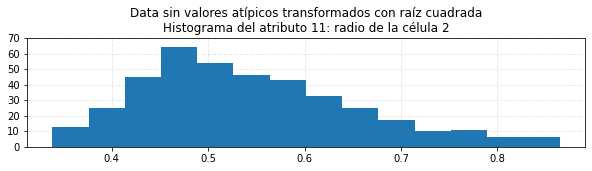

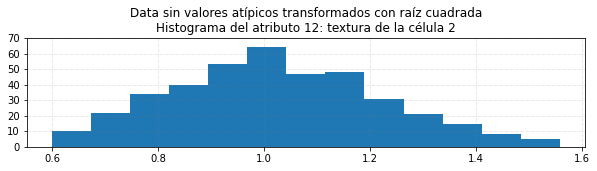

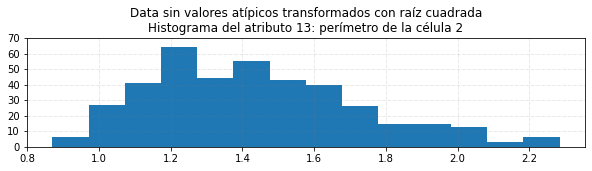

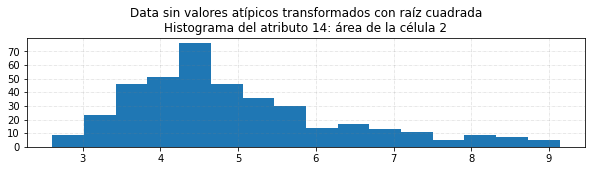

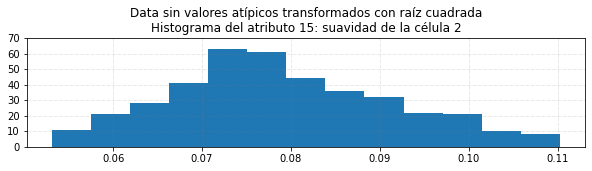

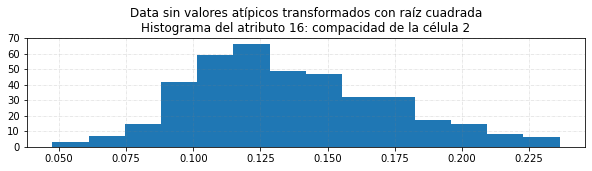

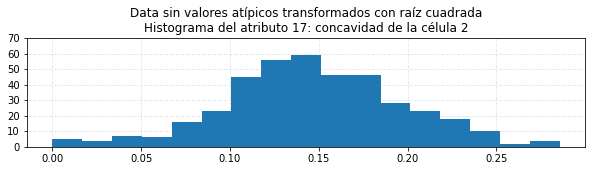

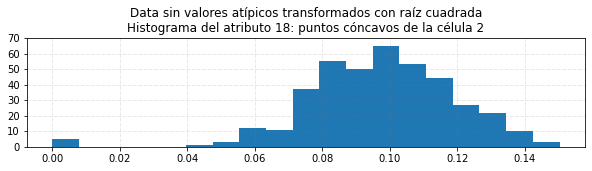

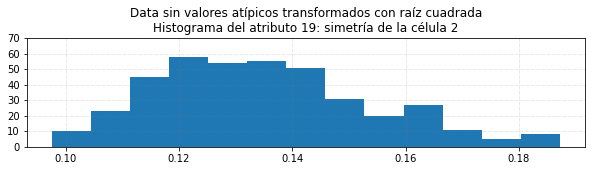

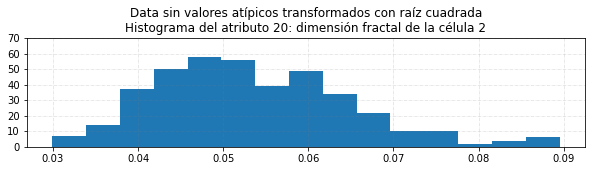

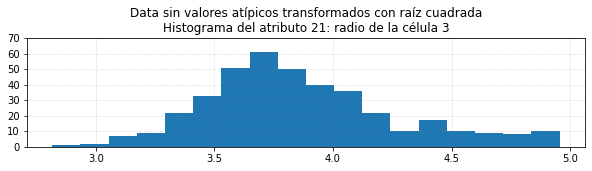

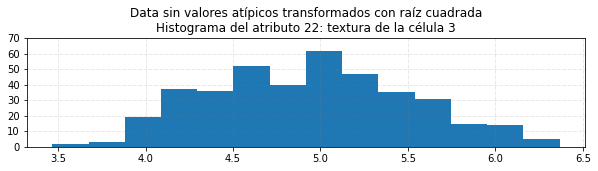

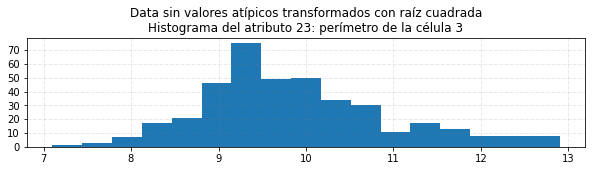

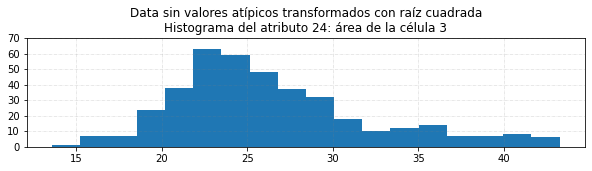

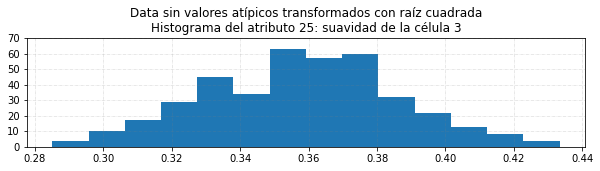

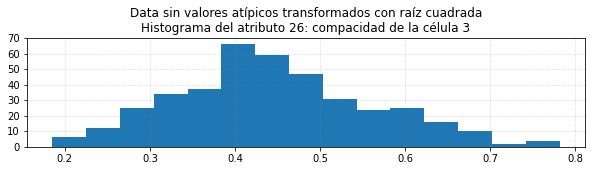

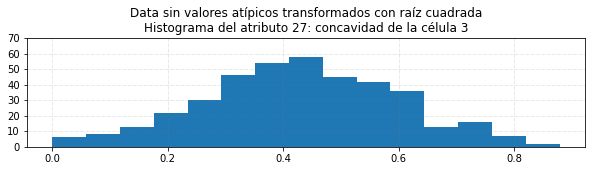

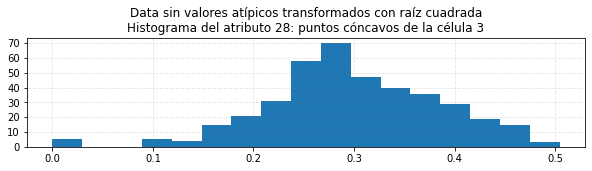

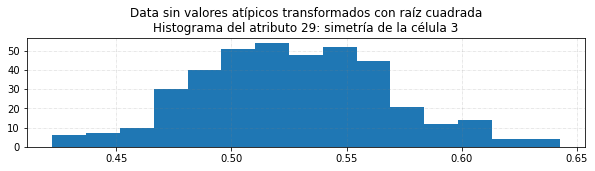

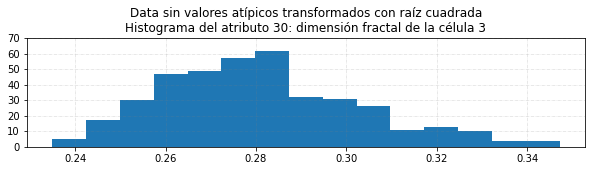

In [1354]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc4[:, 1:] , varnames[1:] , 'Data sin valores atípicos transformados con raíz cuadrada' )

De los histogramas presentados, se puede apreciar una mejora en el comportamiento que, si bien es notoria, tal vez no es suficiente para una apropiada implementación en el modelo, por lo que se decide usar otras transformaciones para comparar resultados visualmente.


\begin{itemize}
    \item[$2.5.1.b$] Aplicando la tranformada logarítmica ajustada:
\end{itemize}


In [1355]:

# Inicializamos la variable de los datos que serán transformados
file_wdbc5 = np.copy(file_wdbc3)

# Se implementa la transformación en todos los atributos de salida
file_wdbc5[:, 1:] = log_ajust( file_wdbc5[:, 1:] )


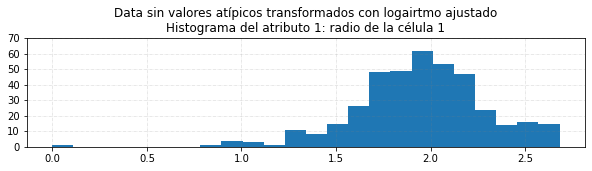

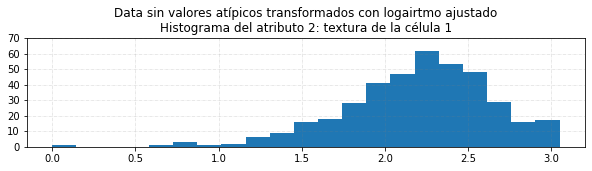

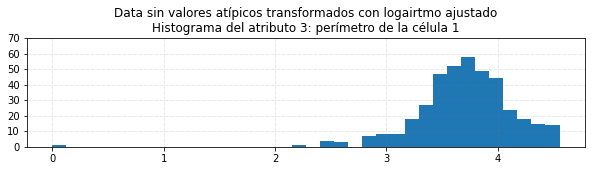

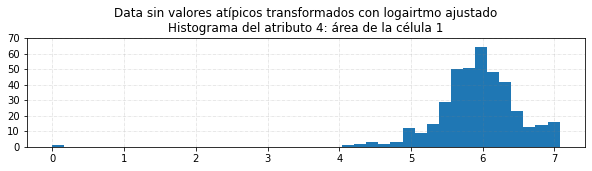

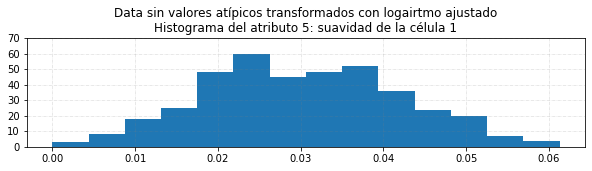

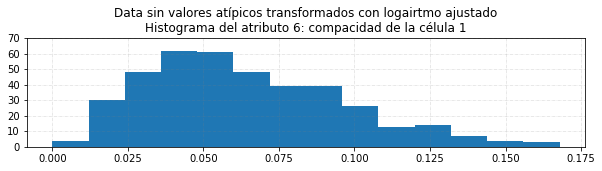

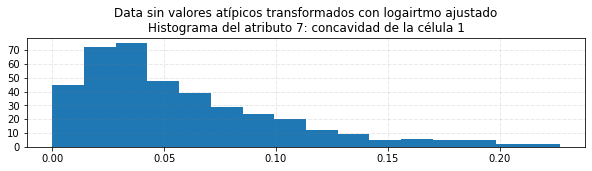

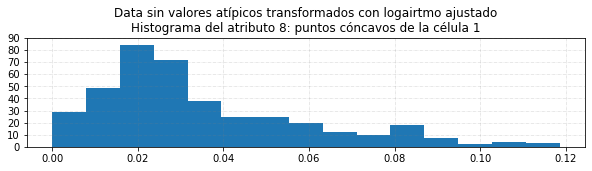

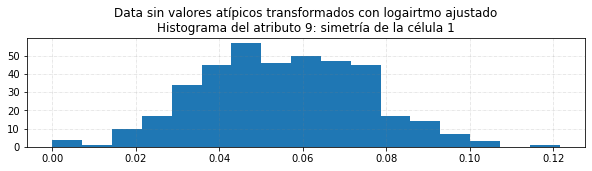

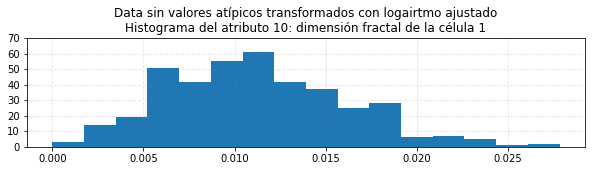

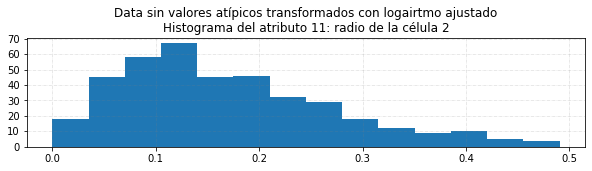

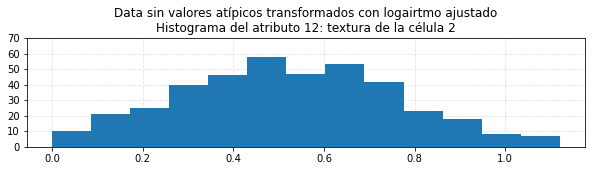

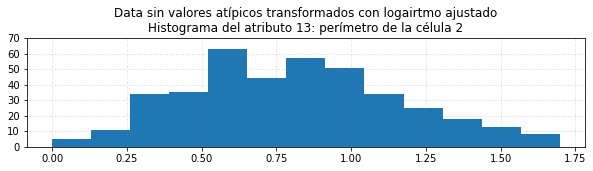

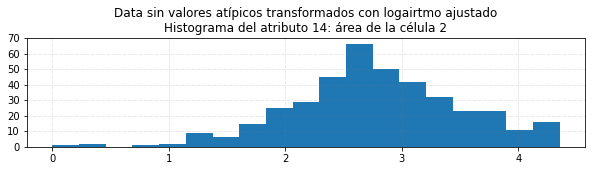

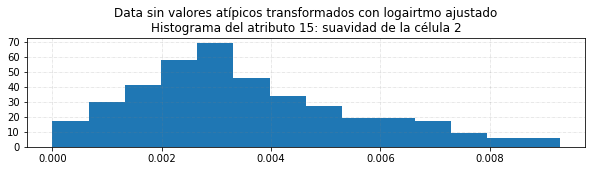

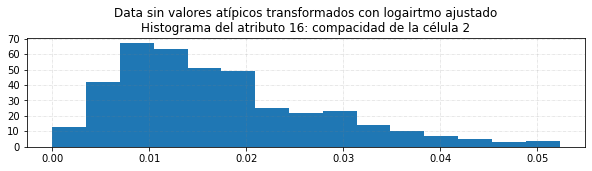

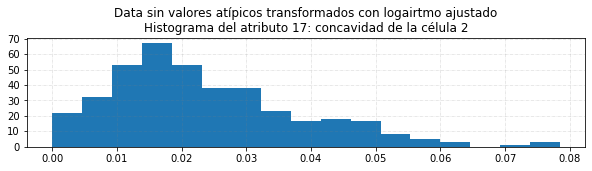

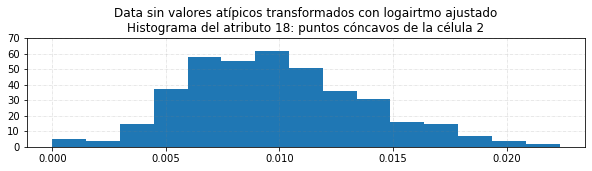

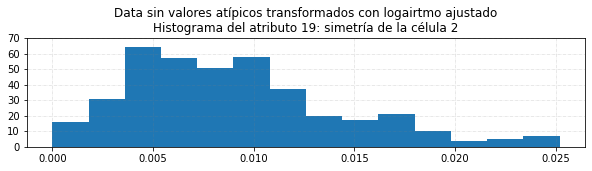

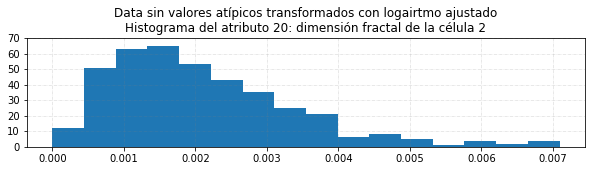

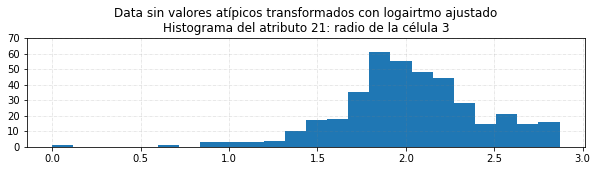

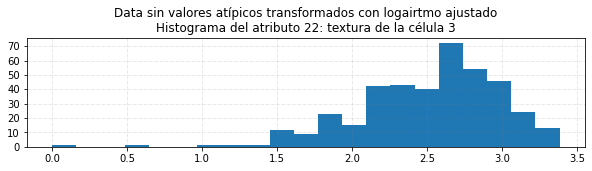

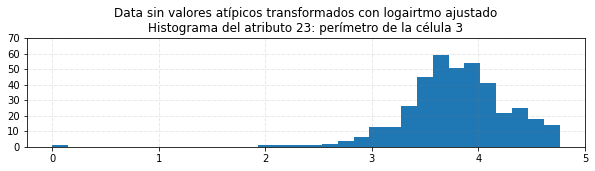

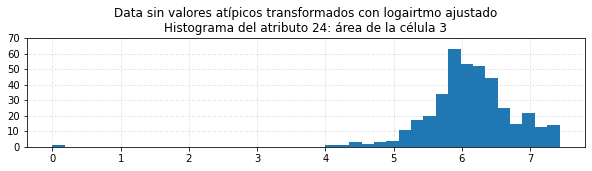

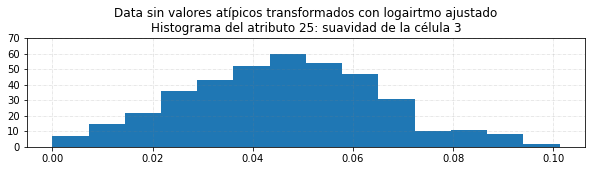

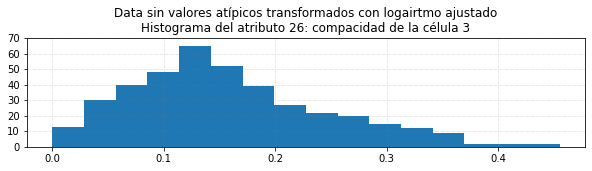

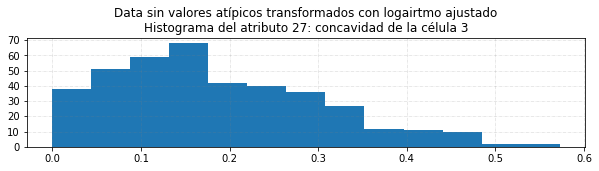

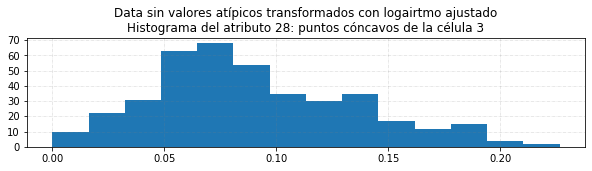

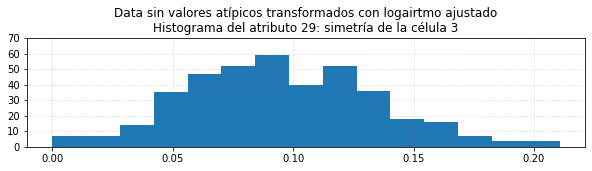

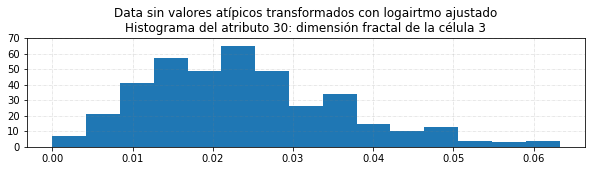

In [1356]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc5[:, 1:] , varnames[1:] , 'Data sin valores atípicos transformados con logairtmo ajustado' )

La transformada logaritmo ajustado mejora el comportamiento en algunas variables, pero en otras no, indicando la necesidad de implementar una transformada más apropiada para la data.


\begin{itemize}
    \item[$2.5.1.c$] Aplicando la tranformada Yeo-Johnson:
\end{itemize}


In [1357]:

# Inicializamos la variable de los datos que serán transformados
file_wdbc6 = np.copy(file_wdbc3)

# Se implementa la transformación en todos los atributos de salida
file_wdbc6[:, 1:], file_wdbc6_lambdas = yoejohnson_transform( file_wdbc6[:, 1:] )


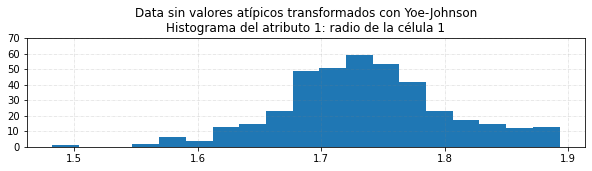

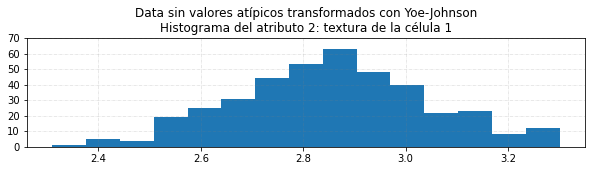

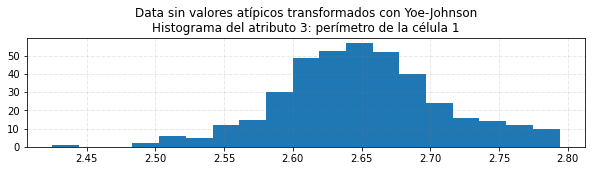

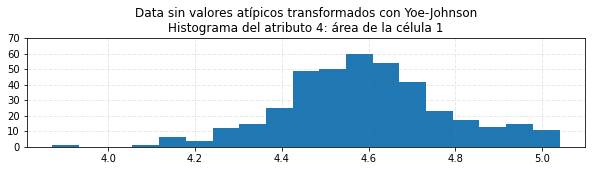

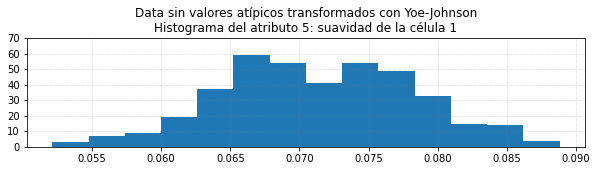

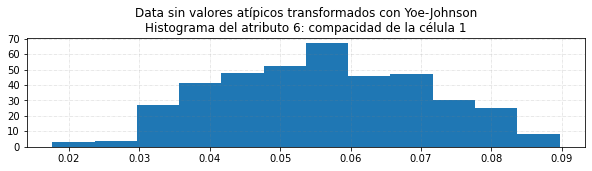

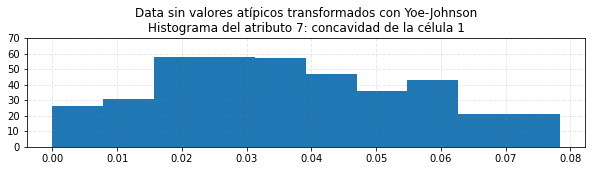

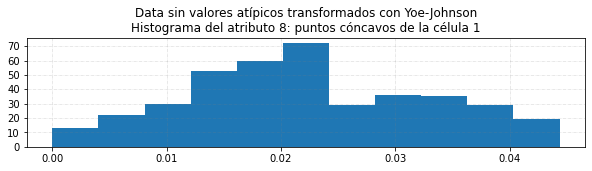

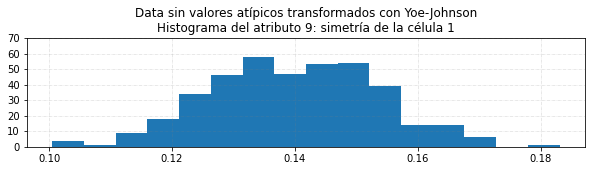

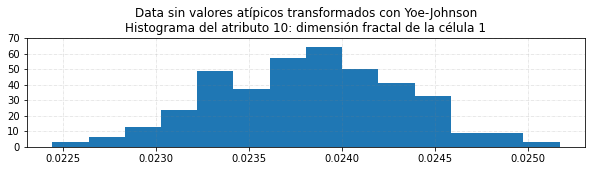

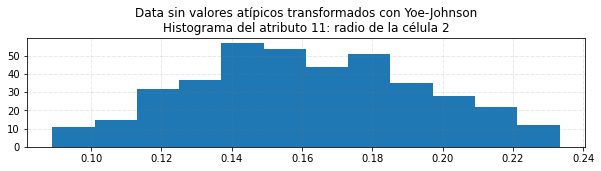

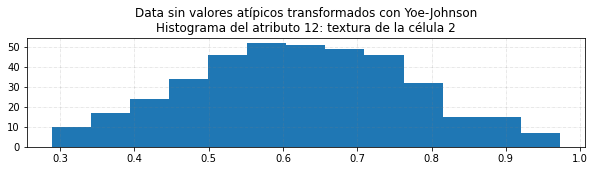

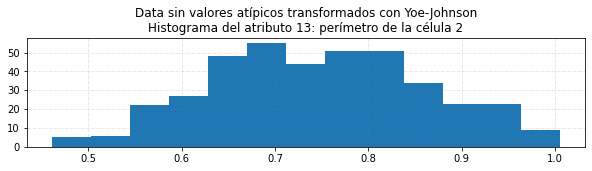

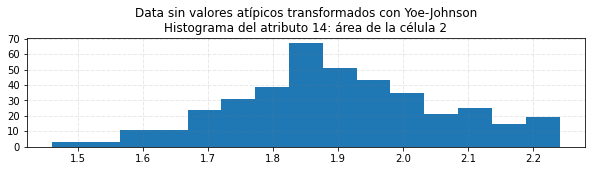

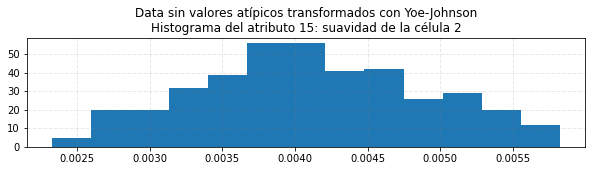

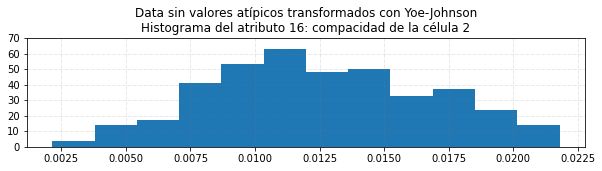

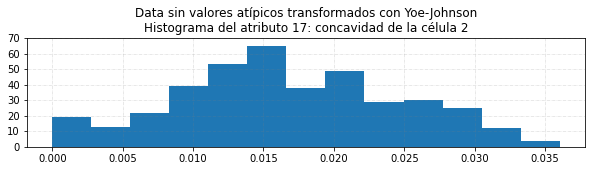

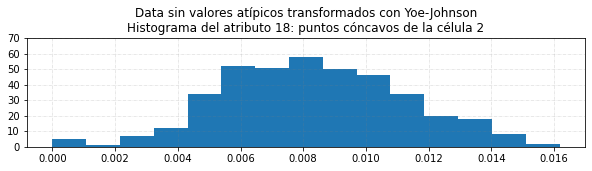

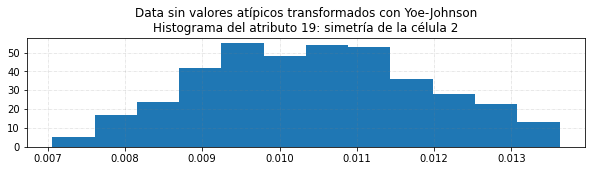

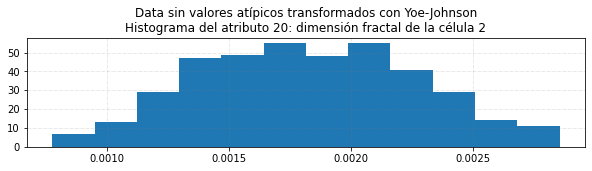

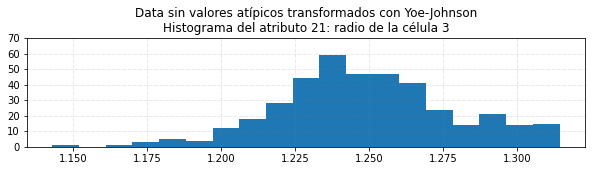

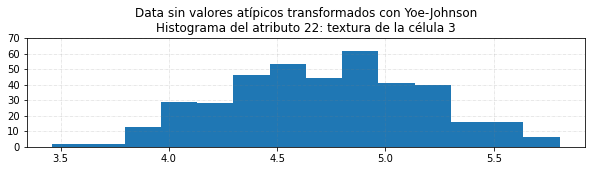

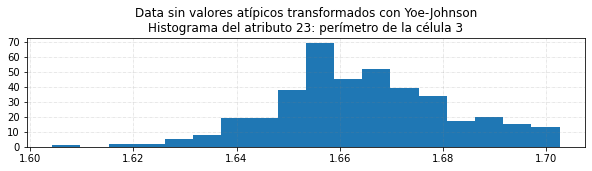

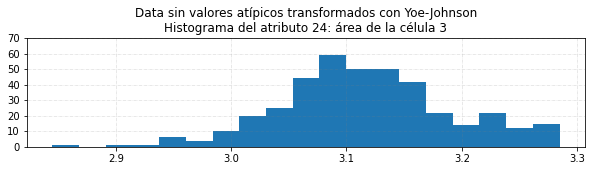

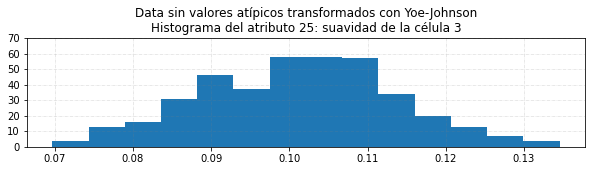

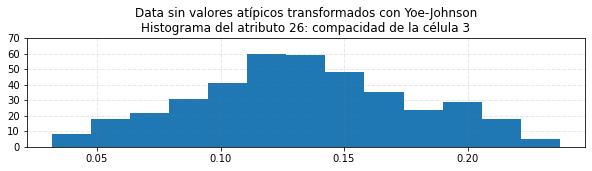

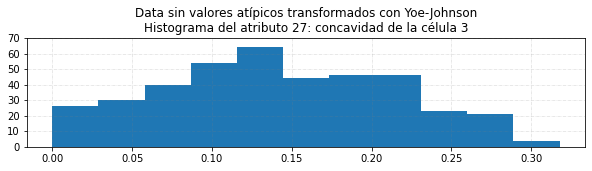

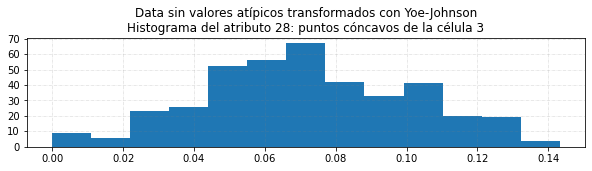

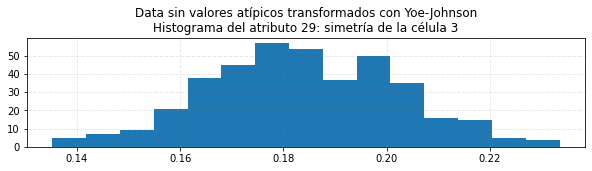

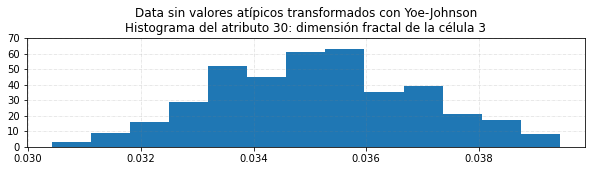

In [1358]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc6[:, 1:] , varnames[1:] , 'Data sin valores atípicos transformados con Yoe-Johnson' )

La transformada Yoe-Johnson ofrece resultados satisfactorios, por lo que se escoge como metodología de transformación para este proyecto.

\vspace{1cm} \subsubsection{\scshape\large Normalización de la data con valores atípicos}


\begin{itemize}
    \item[$2.5.2.a$] Aplicando la tranformada raíz cuadrada:
\end{itemize}


In [1359]:

# Inicializamos la variable de los datos que serán transformados
file_wdbc7 = np.copy(file_wdbc2)

# Se implementa la transformación en todos los atributos de salida
file_wdbc7[:, 1:] = np.sqrt( file_wdbc7[:, 1:] )


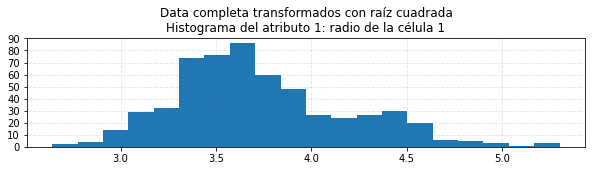

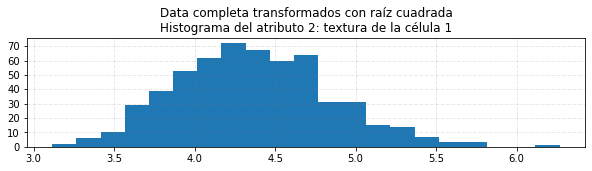

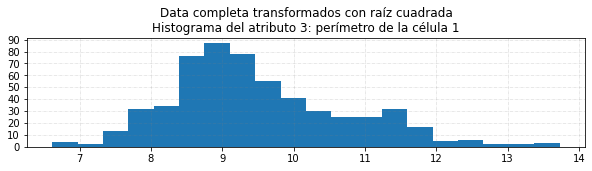

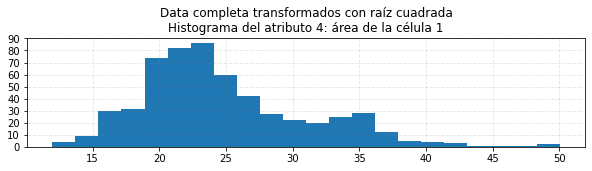

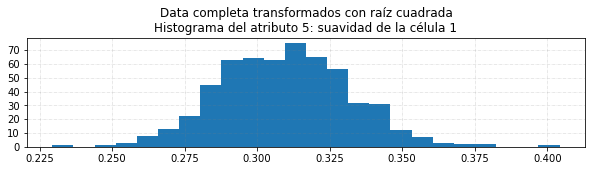

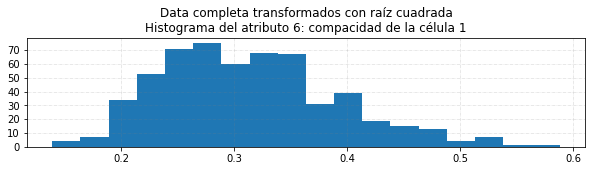

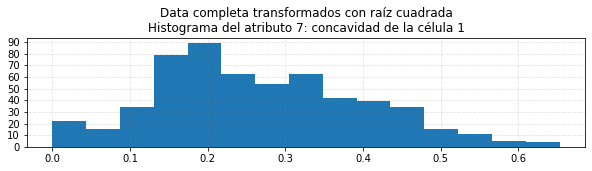

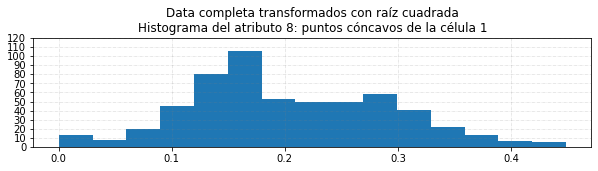

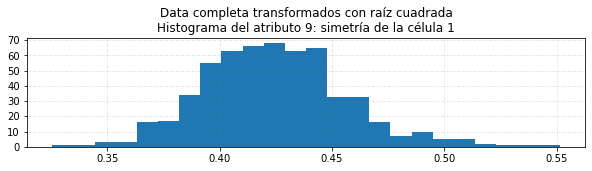

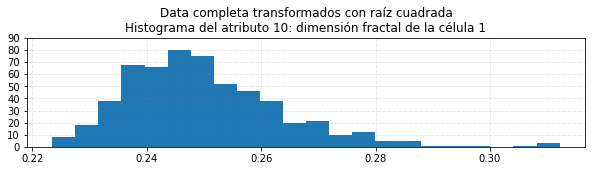

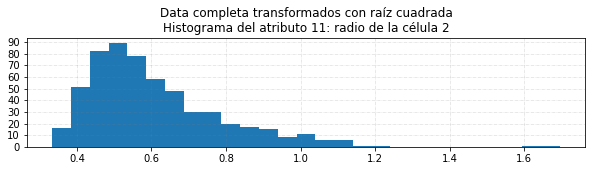

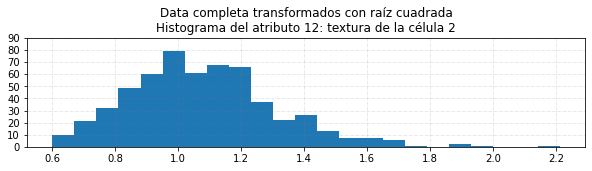

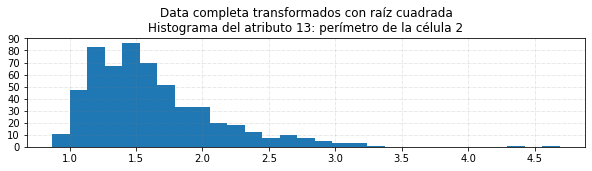

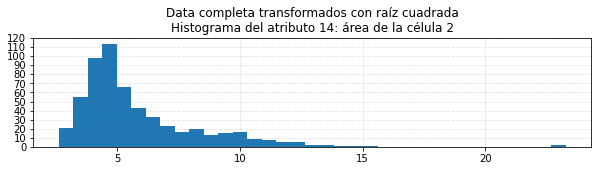

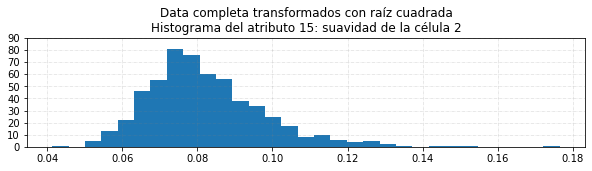

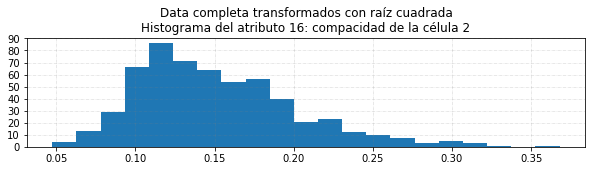

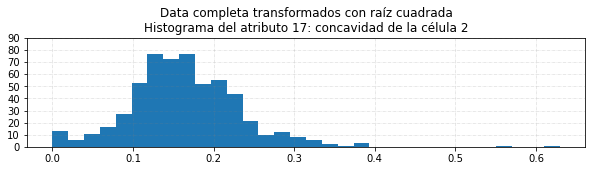

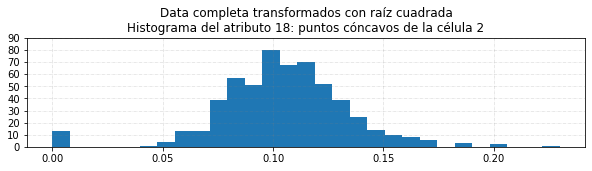

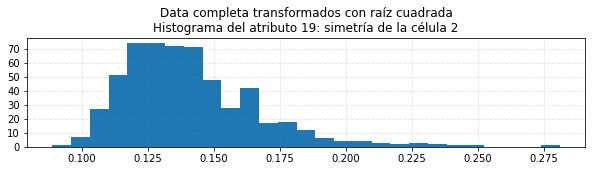

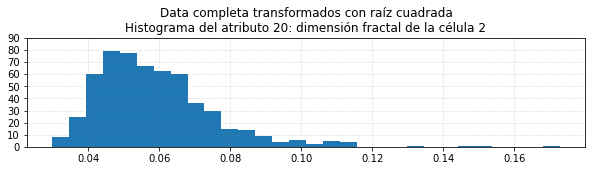

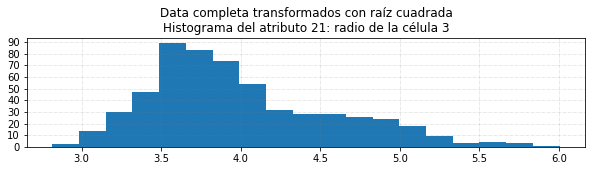

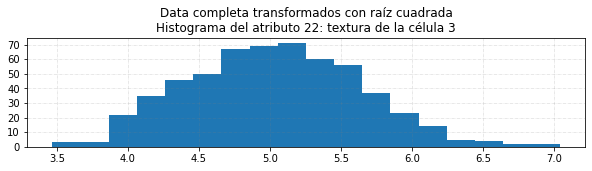

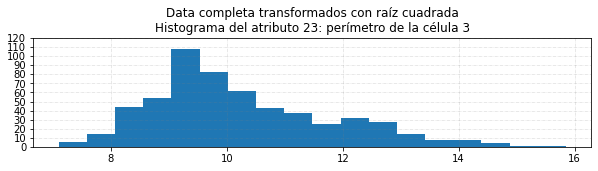

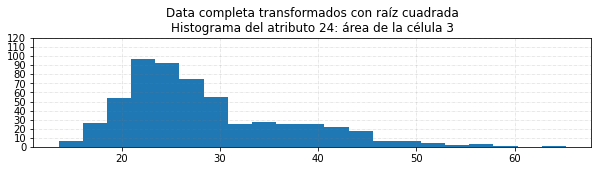

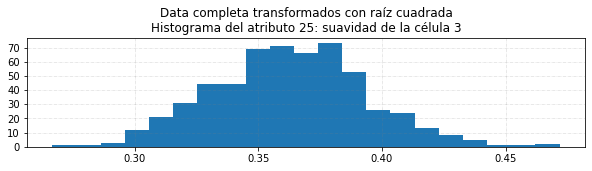

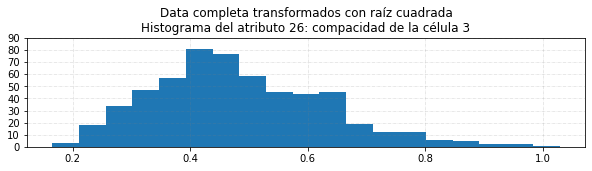

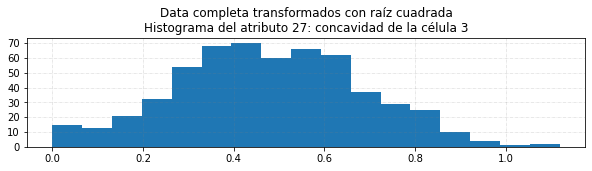

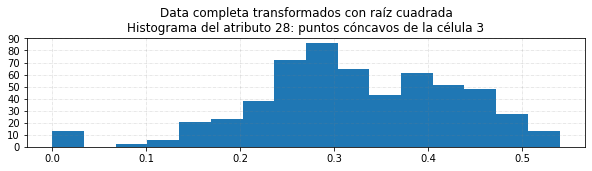

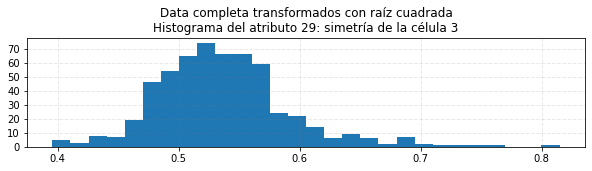

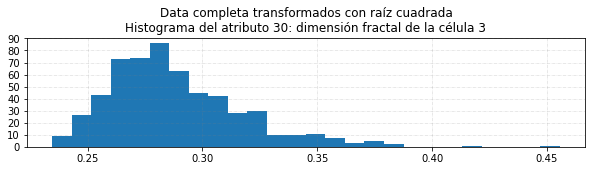

In [1360]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc7[:, 1:] , varnames[1:] , 'Data completa transformados con raíz cuadrada' )

El comportamiento es similar al caso anterior, destacando una peor tendencia, debido a la presencia de valores atípicos.


\begin{itemize}
    \item[$2.5.2.b$] Aplicando la tranformada logarítmica ajustada:
\end{itemize}


In [1361]:

# Inicializamos la variable de los datos que serán transformados
file_wdbc8 = np.copy(file_wdbc2)

# Se implementa la transformación en todos los atributos de salida
file_wdbc8[:, 1:] = log_ajust( file_wdbc8[:, 1:] )
#file_wdbc8[:, 1:] = np.log( file_wdbc2[:, 1:] + 1 - np.min( file_wdbc2[:, 1:], 0 ) )


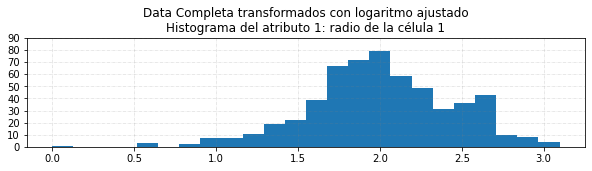

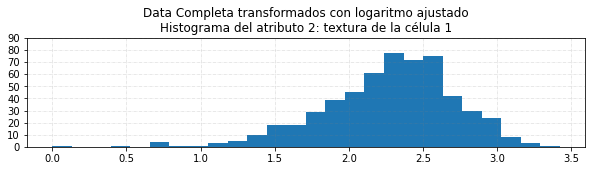

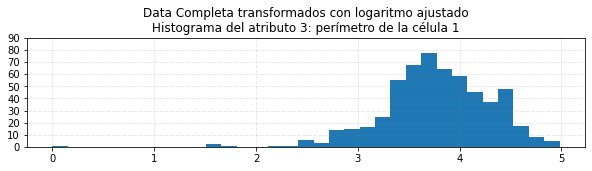

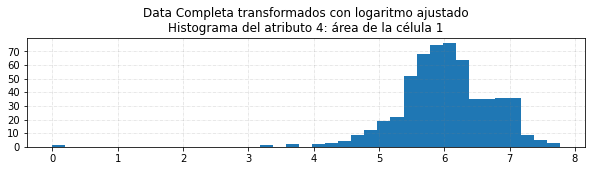

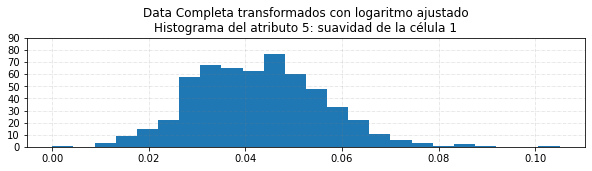

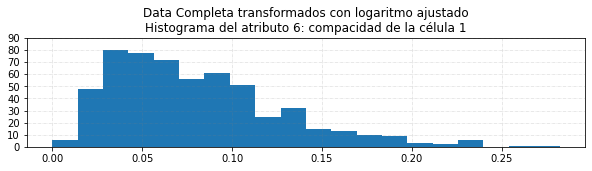

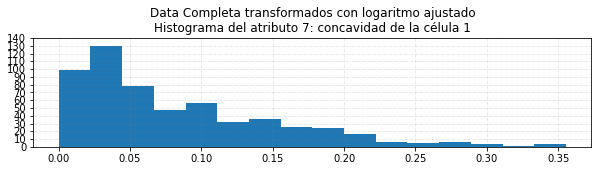

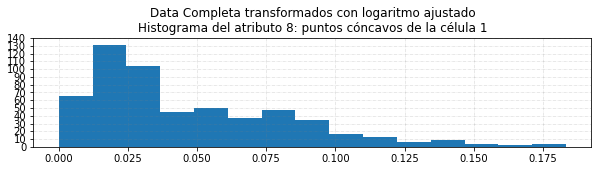

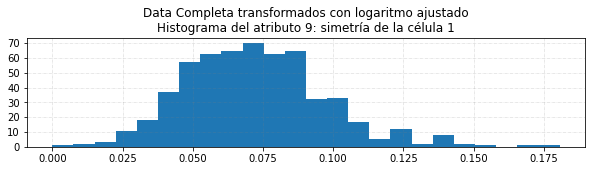

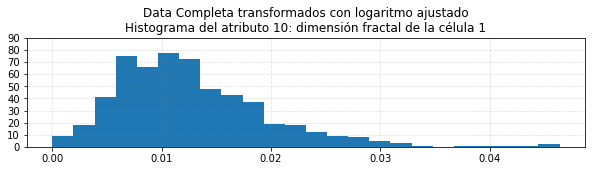

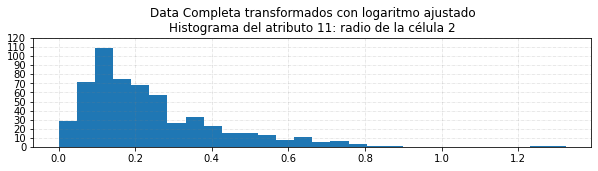

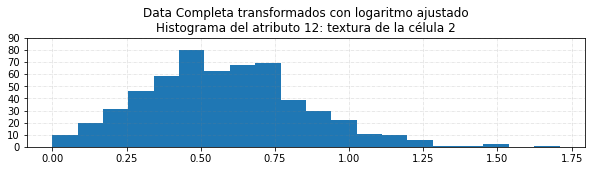

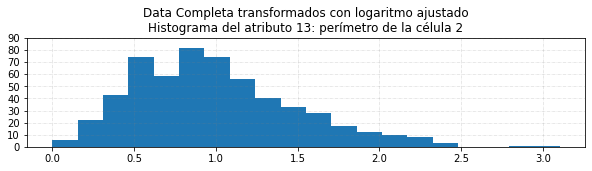

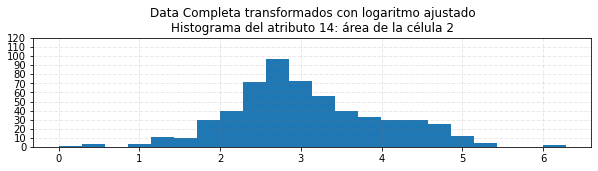

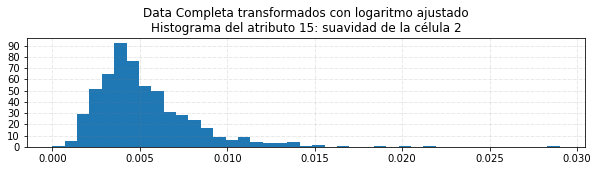

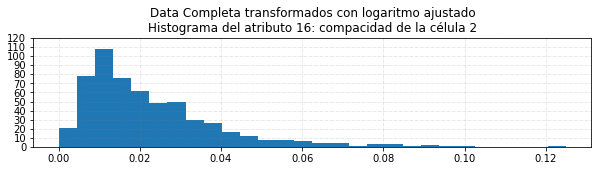

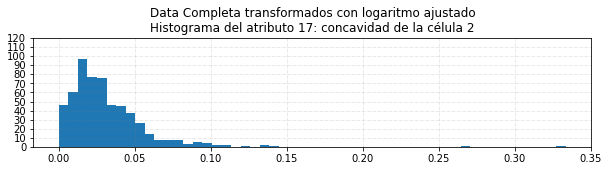

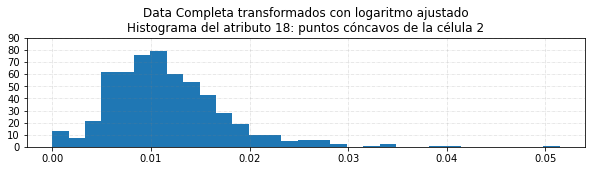

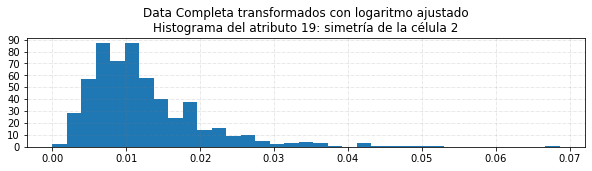

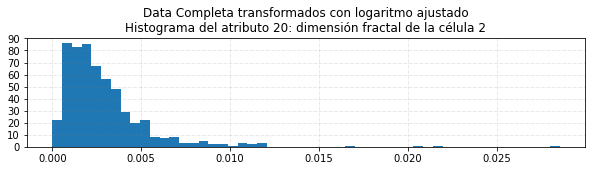

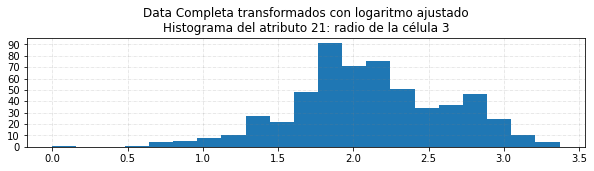

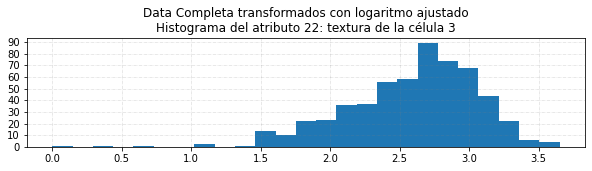

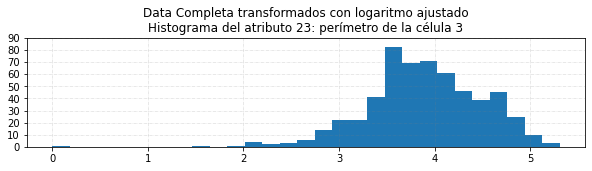

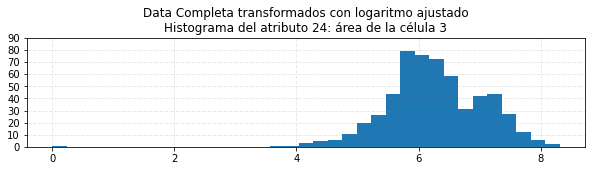

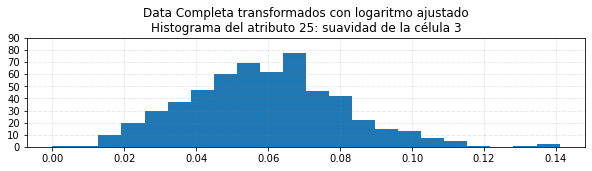

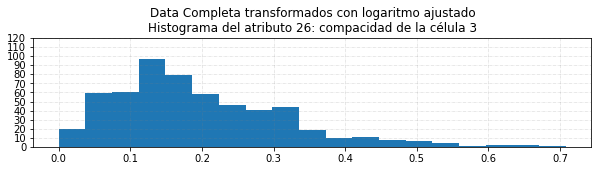

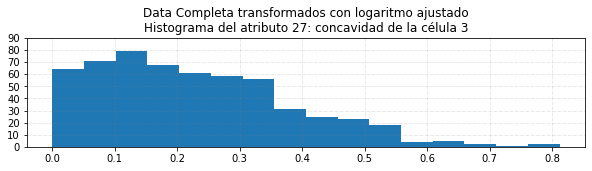

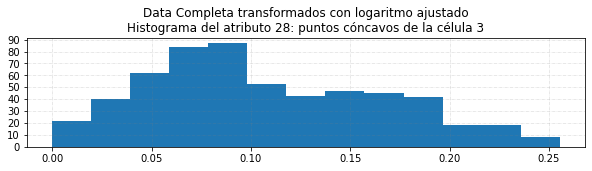

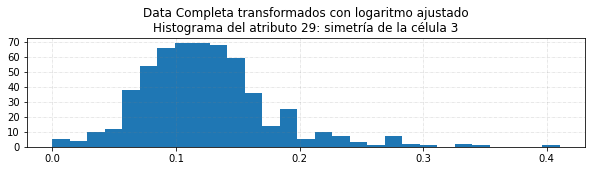

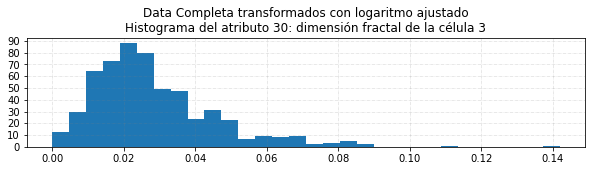

In [1362]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc8[:, 1:] , varnames[1:] , 'Data Completa transformados con logaritmo ajustado' )

La discrepancias entre el comportamiento deseado y el arrojado por la transformada logarítmica se asentúan con la data completa por la presencia de valores atípicos.

Los valores atípicos decrementan el desempeño de la transformada raíz cuadrada y logaritmo ajustdo.


\begin{itemize}
    \item[$2.5.2.c$] Aplicando la tranformada Yeo-Johnson:
\end{itemize}


In [1379]:

# Inicializamos la variable de los datos que serán transformados
file_wdbc9 = np.copy(file_wdbc2)

# Se implementa la transformación en todos los atributos de salida
file_wdbc9[:, 1:], file_wdbc9_lambdas = yoejohnson_transform( file_wdbc9[:, 1:] )

# si aparece un mensaje en rojo que no es un error, solo se debe volver a correr esta celda.


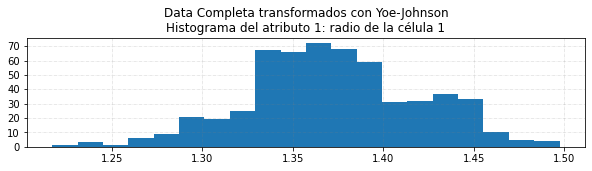

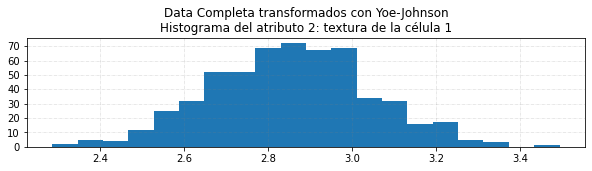

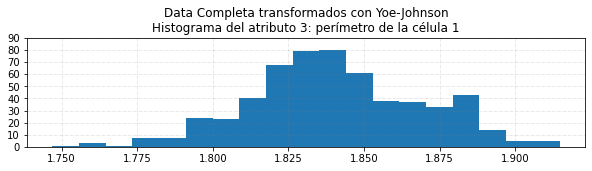

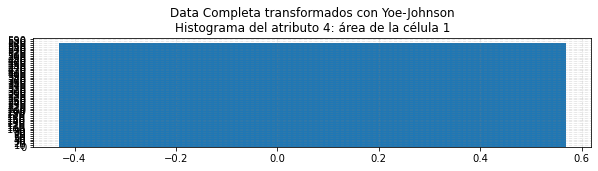

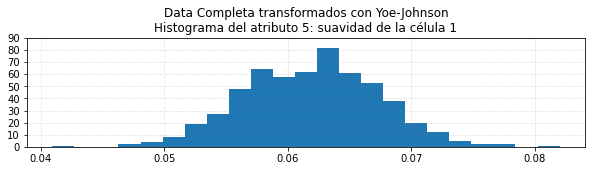

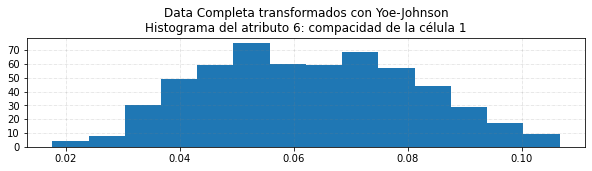

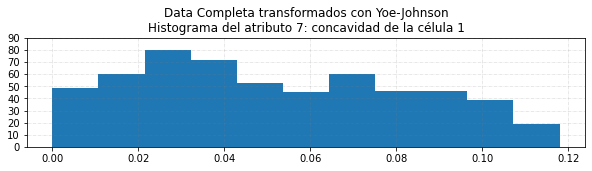

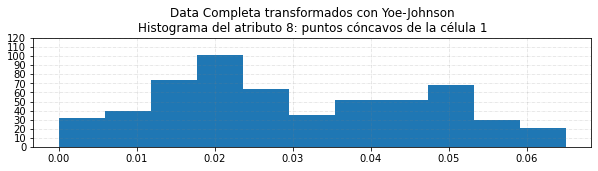

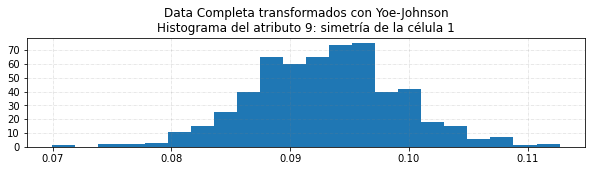

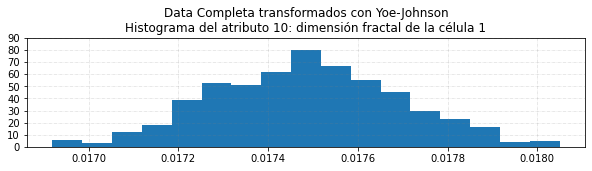

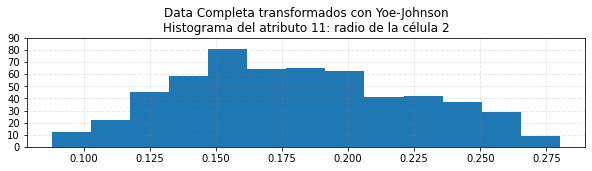

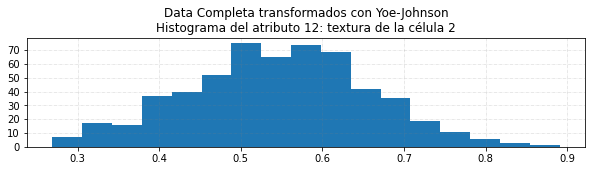

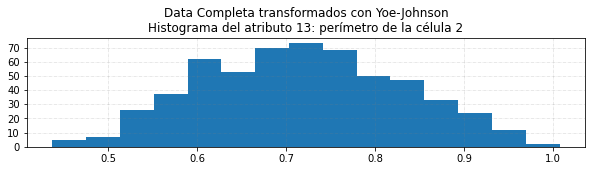

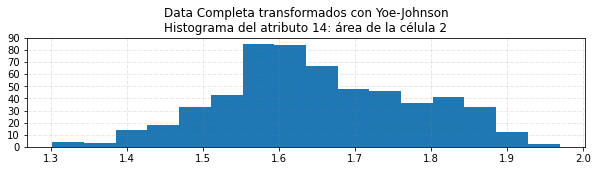

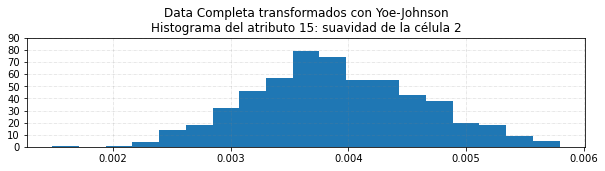

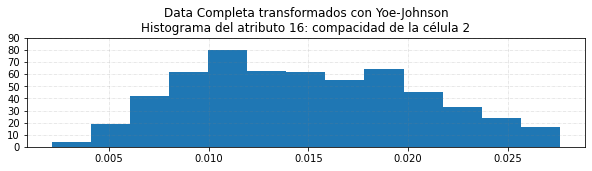

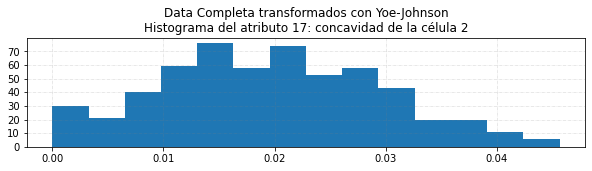

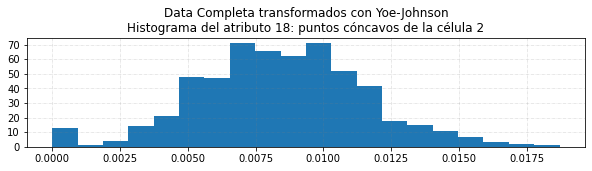

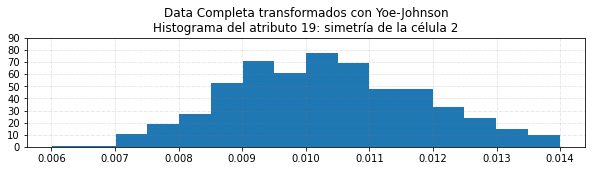

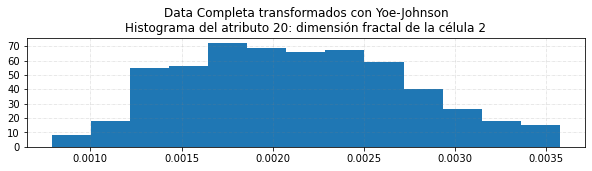

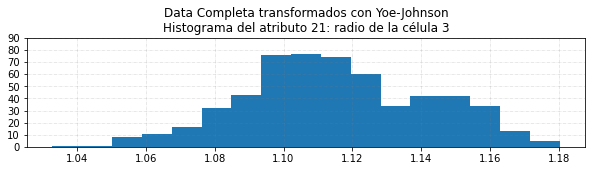

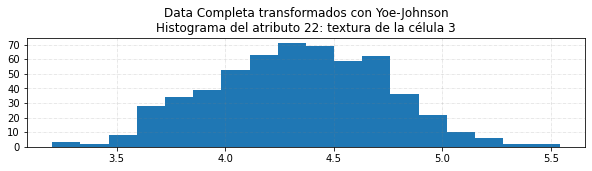

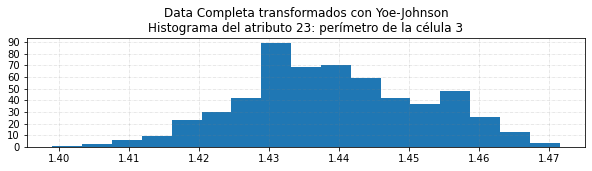

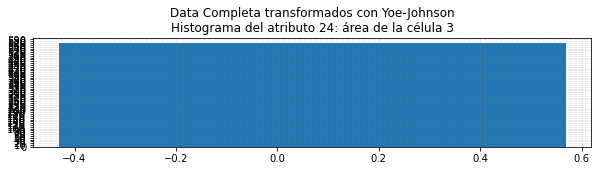

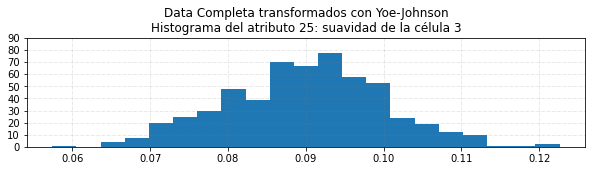

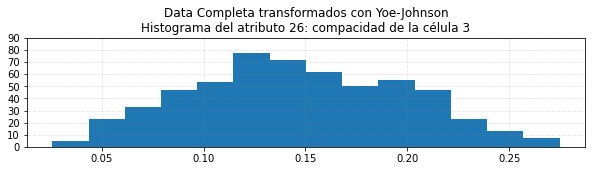

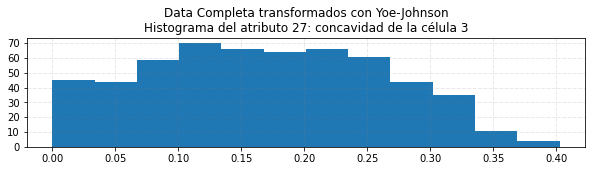

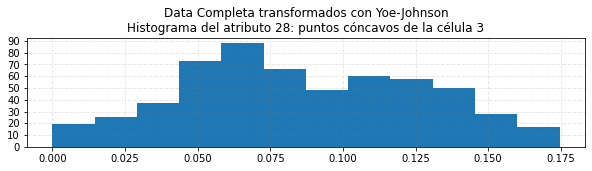

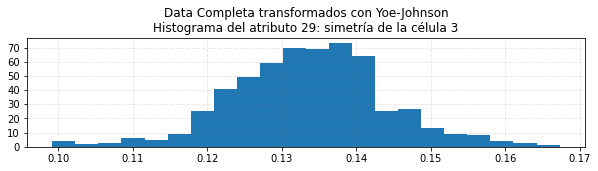

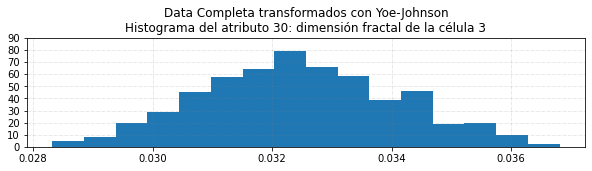

In [1364]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc9[:, 1:] , varnames[1:] , 'Data Completa transformados con Yoe-Johnson' )

Las transformación Yoe-Jhonson del atributo 4 con valores atípicos presenta un comportamiento errádo, que no corresponde con la morfología oroginal, y tampoco con la distribución obtenida usando la misma transformada para el conjunto de datos sin valores atípicos.

Por ello, se inspeccionan los datos de dicho atributo.

In [1365]:
# Se inspeccionan los datos resltantes de la transfromación Yoe-Johnson para la data completa

np.set_printoptions(formatter={'float': lambda x: "{0:0.11f}".format(x)}, suppress = True)
print(file_wdbc9[:, 4])

[0.06881053305 0.06881053305 0.06881053305 0.06881053305 0.06881053305
 0.06881053305 0.06881053305 0.06881053305 0.06881053305 0.06881053305
 0.06881053305 0.06881053305 0.06881053305 0.06881053305 0.06881053305
 0.06881053305 0.06881053305 0.06881053305 0.06881053305 0.06881053305 ...
 0.06881053305 0.06881053305 0.06881053305 0.06881053305 0.06881053305
 0.06881053305 0.06881053305 0.06881053305 0.06881053305 0.06881053305
 0.06881053305 0.06881053305 0.06881053305 0.06881053305 0.06881053305
 0.06881053305 0.06881053305 0.06881053305 0.06881053305 0.06881053305]


Claramente, el resultado de la transformación Yoe-Jhonson es errado, ya que no tiene sentido que todos los valores sean prácticamente iguales.

Esto indica que la presencia de valores atípicos puede afectar negativamente la transformación, haciéndola no fiable para el proceso. De esta forma, se justifica nuevamente la necesidad de descartar los valores atípicos.

En vista de que la asignación automática de del valor de $\lambda$ por parte de la función "stats.yoejohnson" resulta no ser la más apropiada, para evaluar comportamiento, se procede a realizar dicha transformación implementando los lambdas resultantes del conjunto de datos sin valores atípicos con la finalidad de comparar el comportamiento.

In [1366]:

# Inicializamos la variable de los datos que serán transformados
file_wdbc9b = np.copy(file_wdbc2)

# Se implementa la transformación en todos los atributos de salida
file_wdbc9b[:, 1:], file_wdbc9b_lambdas = yoejohnson_transform( file_wdbc9b[:, 1:], file_wdbc6_lambdas )


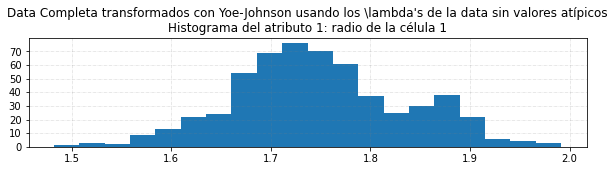

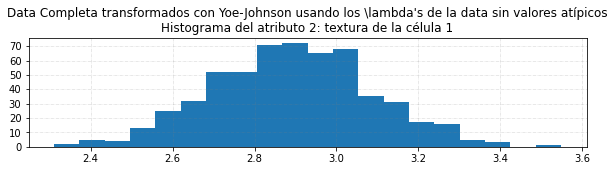

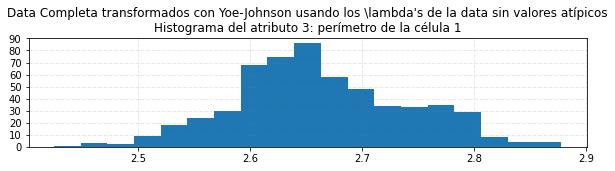

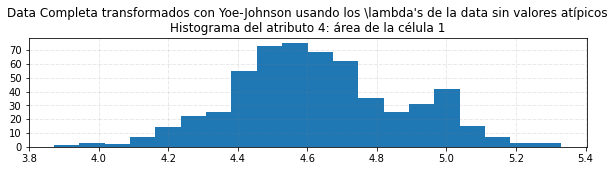

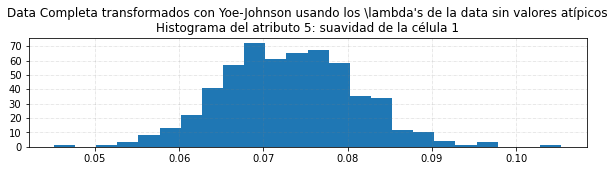

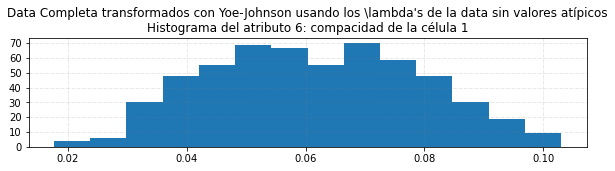

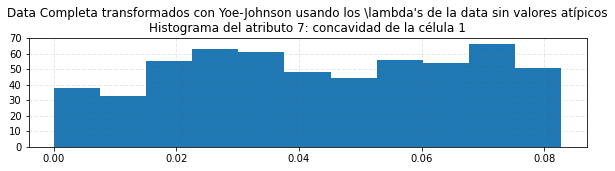

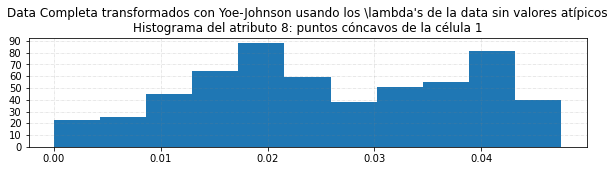

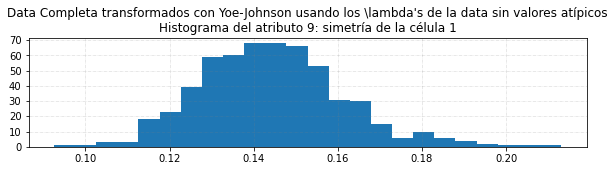

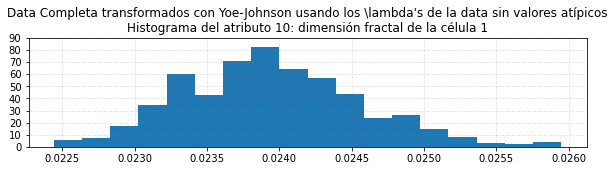

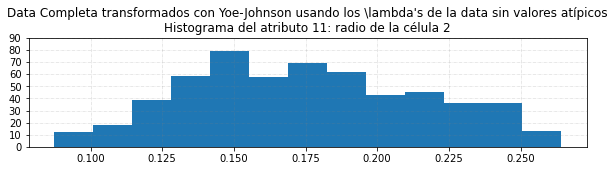

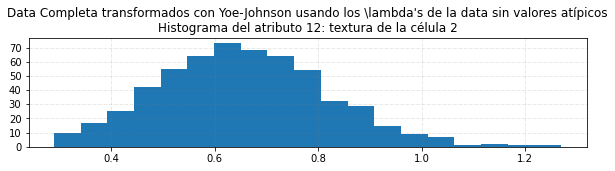

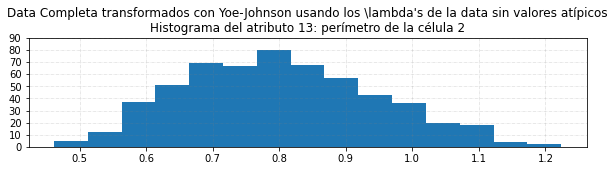

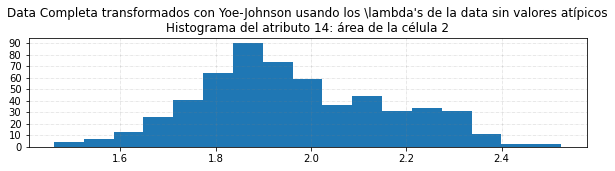

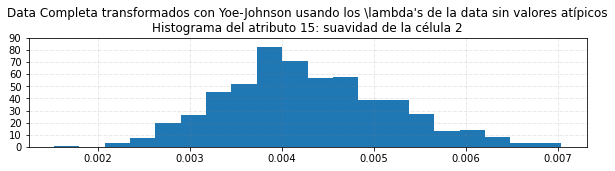

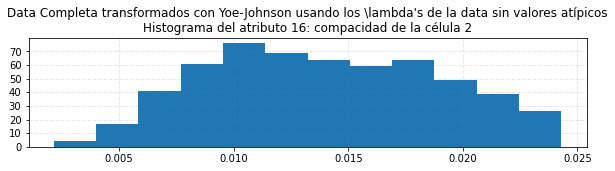

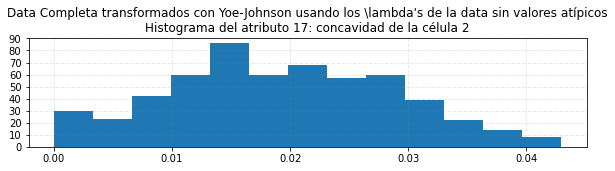

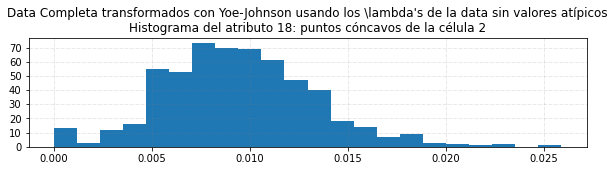

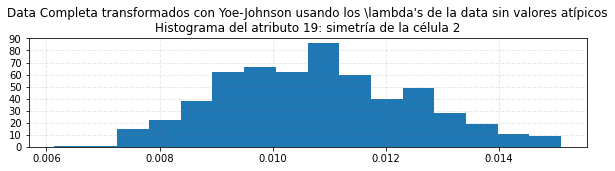

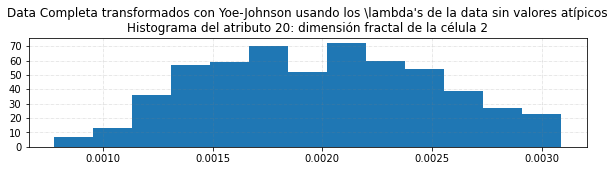

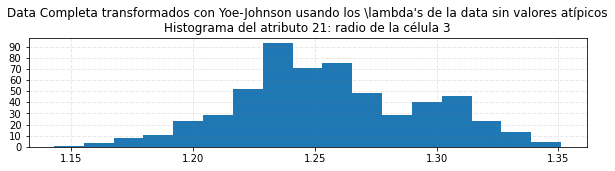

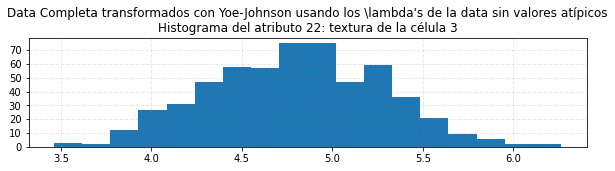

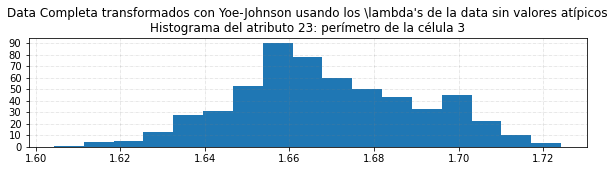

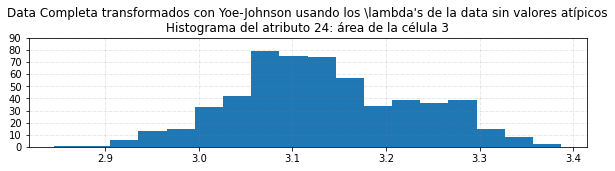

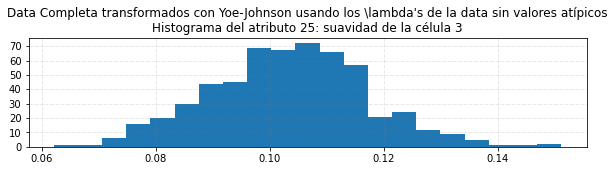

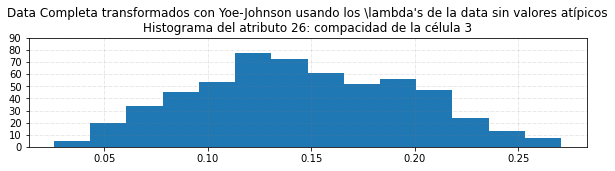

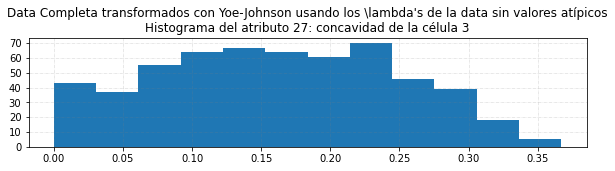

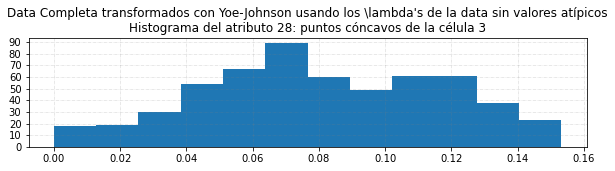

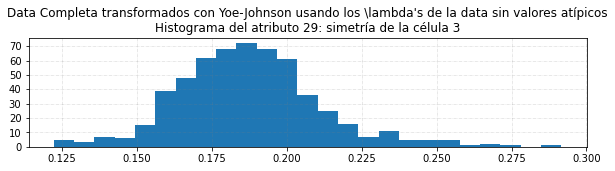

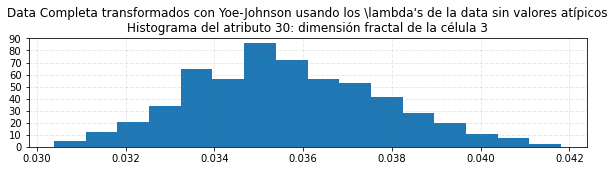

In [1367]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc9b[:, 1:] , varnames[1:] , 'Data Completa transformados con Yoe-Johnson usando los \lambda\'s de la data sin valores atípicos' )

Como se observa, para el caso donde se realiza la transformada Yoe-Johnson sobre el conjunto de datos completo, haciendo uso de los $\lambda$'s resultantes del conjunto de datos sin valores atípicos, se obtienen distribuciones considerablemente diferentes, todas con un comportamiento más similar al gaussiano respecto al caso anterior (transformando toda la data con sus propios $\lambda$'s).


Como se puede apreciar, claramente la transformación que acerca el comportamiento de la distribución de datos a una gaussiana es la transformación. Por esta razón, se trabajará exclusivamente con los datos sometidos a dicha transformación.

Por otra parte, la transformación de la data con valores atípicos presenta discrepancias en el comportamiento, producto de dichos valores atípicos. Esto sugiere que los mismos deben de ser descartados, ya que no se garantiza el comportamiento deseado y, por ende, puede llevar a resultados errados por los modelos a entrenar (entrenamientos erróneos).

A partir de este punto, se utilizan los datos sin valores atípicos.


\vspace{1cm} 
\subsection{\scshape\large Normalización de los datos transformados}

Para el modelo, resulta necesario normalizar los datos, a modo de garantizar que todos se encuentren dentro del mismo rango y orden de magnitud, de manera que se garantice que los mismos tengan la misma influencia sobre el sistema. Es decir, algunos atributos no influyan mayoritariamente solo por tener órdenes de magnitud mayores al resto de atributos.

Para la normalización, se implementará la función Z-score, la cual viene descrita por la siguiente ecuación:


\begin{align*}
    x_N = \frac{(x - \mu)}{ \sigma }
\end{align*}


In [1368]:

# Normalización mediante Z-Score para todos los atributos.

file_wdbc6n = np.copy( file_wdbc6 )

file_wdbc6n[:,1:] = stats.zscore( file_wdbc6[:,1:], axis = 0 )


Una vez normalizado los datos, se presentan los histogramas de cada atributo para evaluar la distribución, tanto en forma como en el dominio de variables que abarcan.

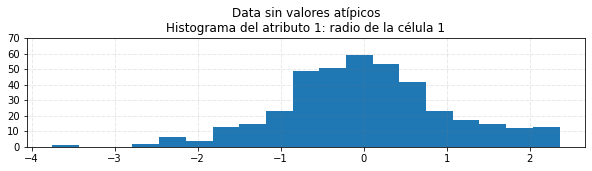

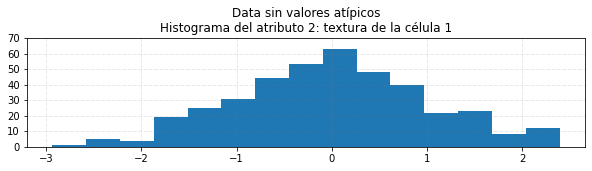

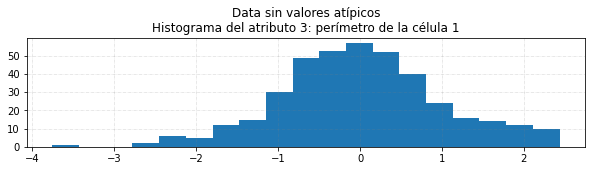

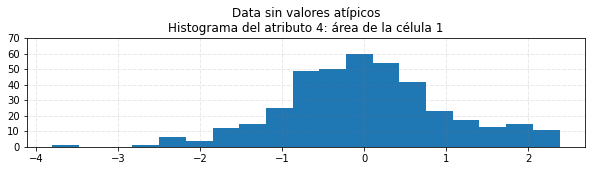

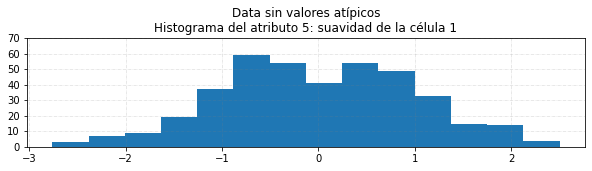

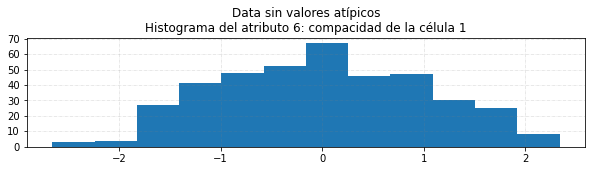

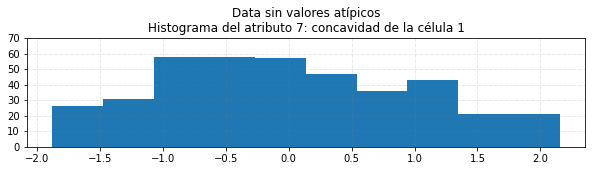

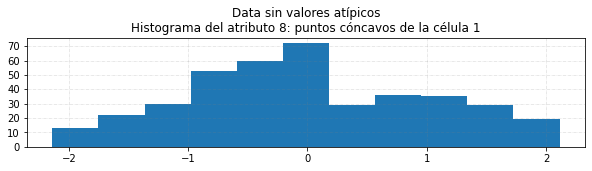

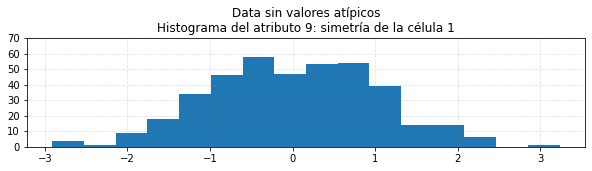

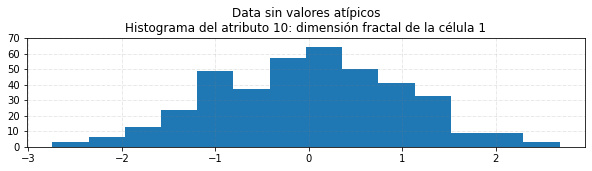

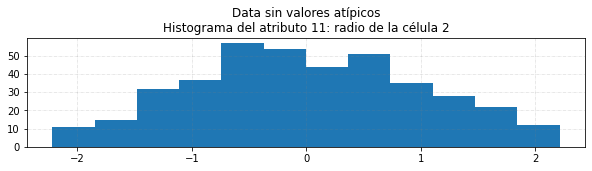

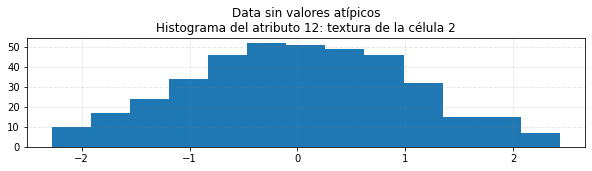

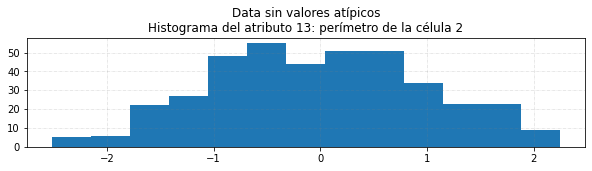

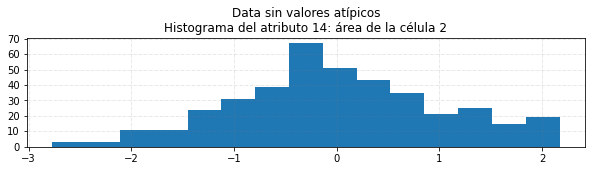

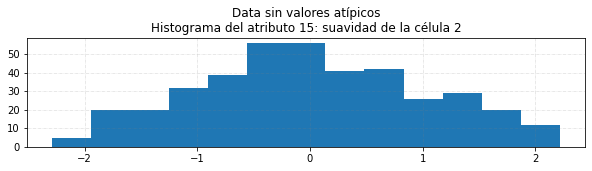

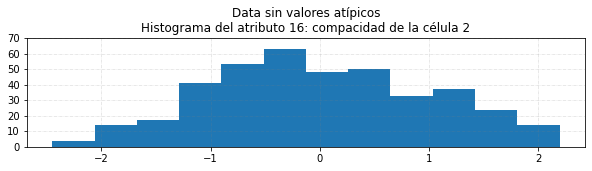

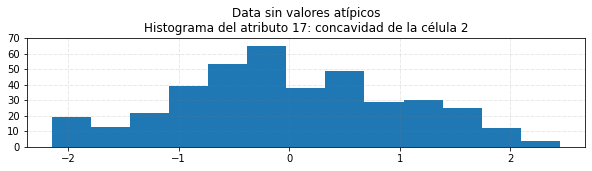

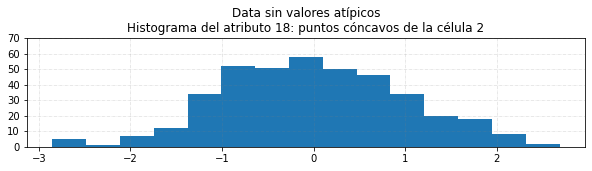

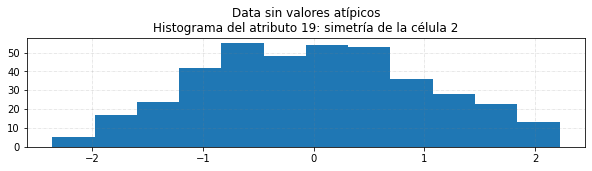

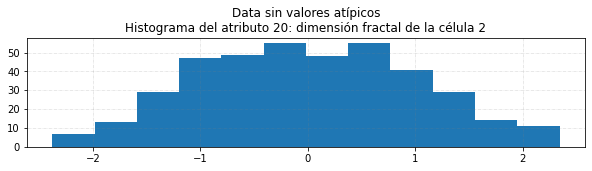

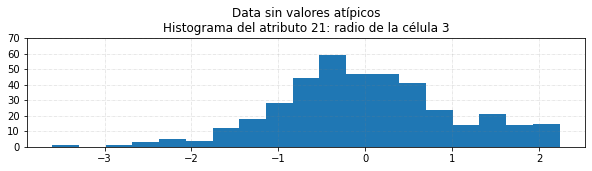

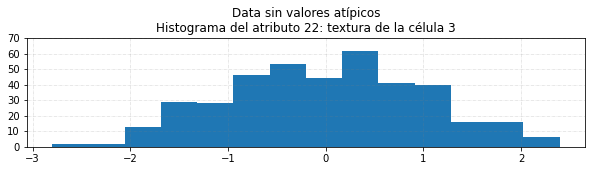

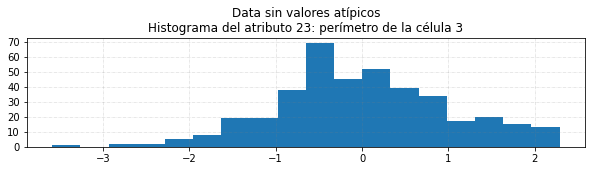

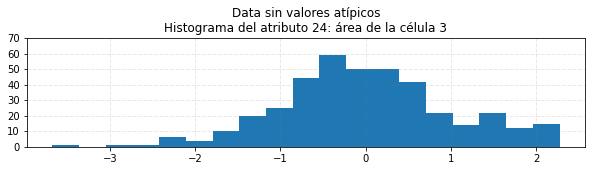

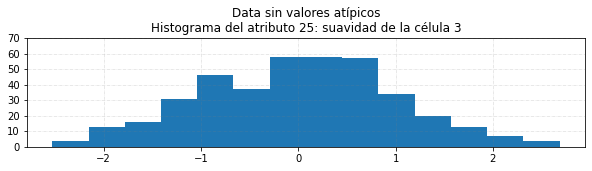

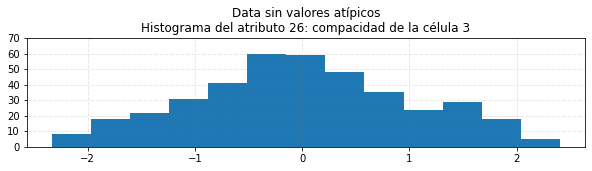

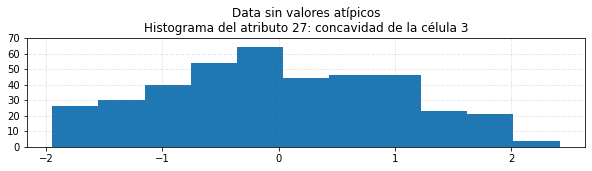

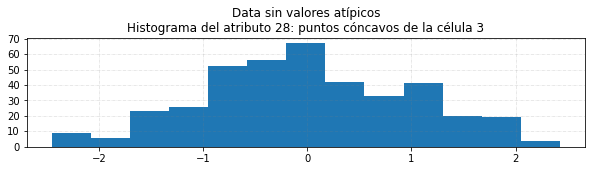

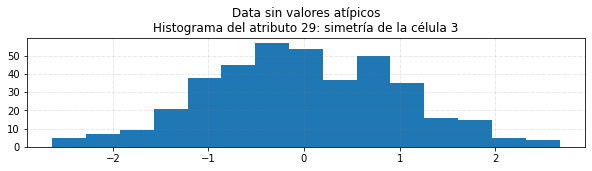

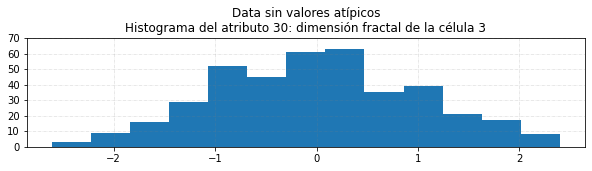

In [1369]:
# Se grafica la distribución de los atributos para la data completa
histogrmAllAtriSep( file_wdbc6n[:, 1:] , varnames[1:] , 'Data sin valores atípicos' )

Es importante mencionar que, para este caso, los datos transformados no se encuentran dentro del rango $[ -2.698 \sigma , 2.698 \sigma ]$. Esto sugiere que la transformación Yoe-Jhonson genera una dispersión mayor sobre los datos transformados, indicando que algunos datos que antes no poseían valores atípicos según el criterio IQR, al ser transformados sí presentan algunos valores que pudieran clasificarse como valores atípicos.

En vista de lo expuesto anteriormente, se procede a determinar los valores de las variables estadísticas de interés asociados a la data normalizada sin valores atípicos.

\vspace{1cm} \subsubsection{\scshape\large Estudo Estadístico de la data Normalizada sin valores atípicos}

In [1370]:

#cálculo de los parámetros estadísticos

file_wdbc6n_Mean,  file_wdbc6n_Median, file_wdbc6n_Mode, file_wdbc6n_Max, 
file_wdbc6n_Min, file_wdbc6n_Range, file_wdbc6n_Desv, file_wdbc6n_Skew,
file_wdbc6n_Kurt = StatsVars( file_wdbc6n, 'Data normalizada sin valores atípicos')


la media de los atributos para la Data normalizada sin valores atípicos es:
[-1.25204e-14 1.95377e-15 -2.89049e-14 2.26564e-15 -7.17182e-16
 2.19813e-16 1.50243e-15 2.73511e-15 -2.01319e-15 -2.85458e-14
 -1.08344e-15 -2.68587e-15 3.43890e-15 -2.66844e-15 7.42880e-16
 -1.70160e-15 -9.81348e-16 -2.57918e-15 1.91248e-15 3.33848e-15
 4.18275e-14 6.85326e-15 5.37928e-14 -7.02788e-15 1.38694e-15 -9.17747e-16
 -1.00980e-16 -9.56242e-16 4.34828e-15 -8.25798e-15]

la mediana de los atributos para la Data normalizada sin valores atípicos es:
[-4.56873e-02 1.54072e-02 -2.55849e-02 -5.56959e-02 -4.02046e-02
 -5.15956e-02 -9.99425e-02 -1.04336e-01 -4.29058e-02 1.74156e-02
 -7.50689e-02 -1.38443e-02 5.56364e-03 -8.81027e-02 -6.92500e-02
 -7.47689e-02 -7.55965e-02 -6.38399e-02 2.42211e-02 -2.96998e-02
 -6.87979e-02 6.05261e-02 -6.43538e-02 -7.78485e-02 4.64080e-02
 -5.06047e-02 -4.85416e-02 -1.18662e-01 -1.94485e-02 1.34283e-02]

la moda de los atributos para la Data normalizada sin valores atípicos 

Los valores estadísticos de interés destacan por la similitud y cercanía entre ellos. Entre los más resaltantes se encuentra la media, cuyos resultados son ceros numéricos (valores de $1e^{-15}$ contra valores cuyo orden de magnitud es de la unidad, $1e^{1}$; mientras que la mediana de los atributos tiende a mantener, en su gran mayoría, valores cercanos al cero, del orden de $1e^{-2}$. Como era de esperar, la desviación estándar es unitaria, producto de la normalización.

Por otro lado, los máximos y los mínimos presentan ligeras variaciones (del orden de la unidad en algunos casos), y en algunos atributos dichos valores superan los máximos y mínimos límites del proceso de eliminación de datos atípicos (IQR, cuyo dominio de valores está comprendido por $[ -2.698 \sigma , 2.698 \sigma ]$, como se mencionó anteriormente).

Lo descrito expone el hecho de que los rangos de las variables llegan a diferir hasta por dos unidades. No obstante, todos los valores se encuentran dentro del mismo orden de magnitud y las discrepancias anteriormente mencionadas podrían considerarse lo suficientemente sutil como para no generar problemas a la hora de implementar el modelo.

Adicionalmente, la asimetría de la mayoría de los atributos se encuentra en órdenes de magnitud menor o igual a $1e^{-2}$ y $1e^{-3}$, lo que sugiere que la mayoría de los datos tiende a adoptar una distribución gaussiana cercana a la simétrica. Esto también se puede apreciar con los valores de la media de los atributos. En cambio, al hablar de curtosis se debe tomar en cuenta cuándo se considera una distribución estrecha, de alta curtosis, o ancha, de baja curtosis. Para el caso presente, a modo de tener una medida de comparación, los atributos cuya distribución tiene una forma más estrecha corresponden a los atributos 1, 3 y 4, que son los 3 valores con mayor curtosis. Éstos pueden considerarse, en comparación con el resto de los atributos, distribuciones Leptocúrticas. Distribuciones Mesocúrticas corresponderían a los atributos 8, 18, 21, 23 y 24, cuya curtosis es superior a -0.15, y el resto de atributos podría tratase como distribuciones Platicúrticas. Dichas métricas son un criterio aproximado siguiendo la morfología de los histogramas obtenidos y los valores de la variable curtosis para cada atributo.

\vspace{1cm} \subsubsection{\scshape\large Estudio de Correlación de atributos de la data normalizada sin valores atípicos}

habiendo efectuado la transformación correspondiente, se procede a estudiar la correlación que existe entre los atributos de entrada transformados y el atributo de salida.

In [1371]:

#Correlaciones de Pearson de todos los atributos de entrada con el atributo de salida.
corr_file_wdbc6n = np.corrcoef(np.transpose(file_wdbc6n))

np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}, suppress = True)
print(corr_file_wdbc6n[1:,1])

[1.00000 0.27536 0.99829 0.99963 0.03387 0.41815 0.61053 0.72009 0.06040
 -0.47035 0.47301 -0.15108 0.47404 0.70715 -0.34005 0.18233 0.28869
 0.37178 -0.34978 -0.10838 0.97620 0.26516 0.96984 0.97628 0.05362 0.41844
 0.54779 0.66836 0.11927 -0.04842]


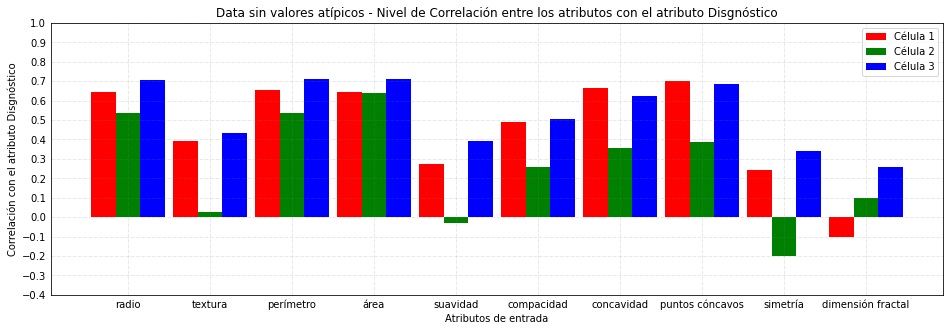

In [1372]:
# Se presenta los resultados de la correlación de todos los atributos de entrada respecto al atributo de salida
barPlot_1Corr( corr_file_wdbc6n[1:,0], varnames, 'Data sin valores atípicos' )

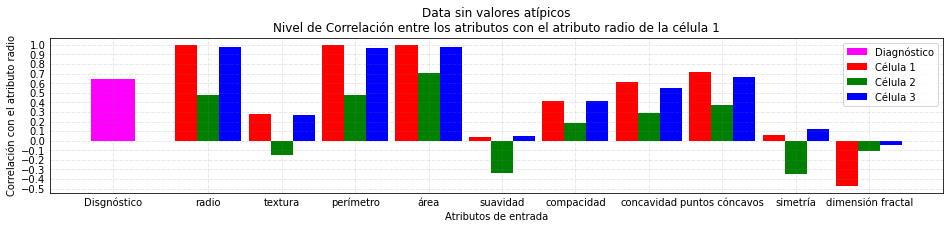

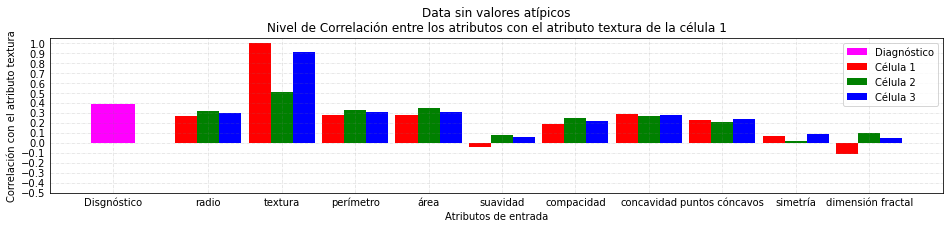

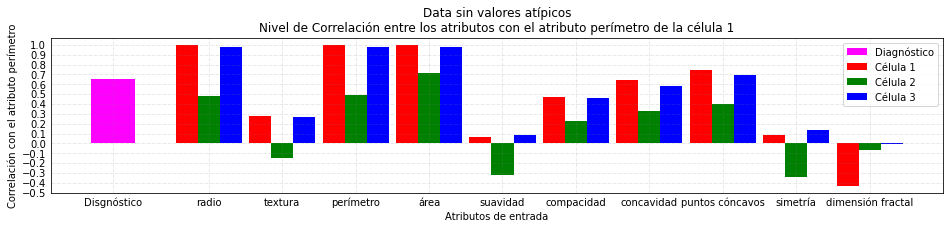

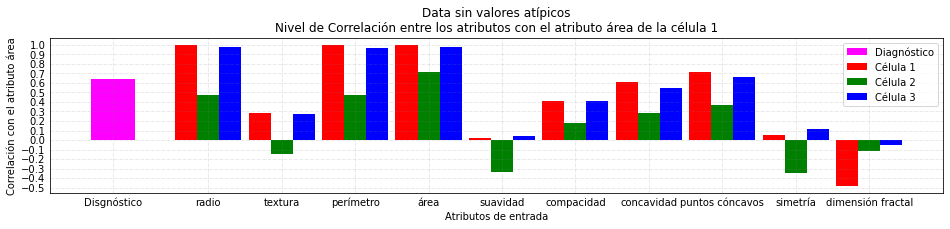

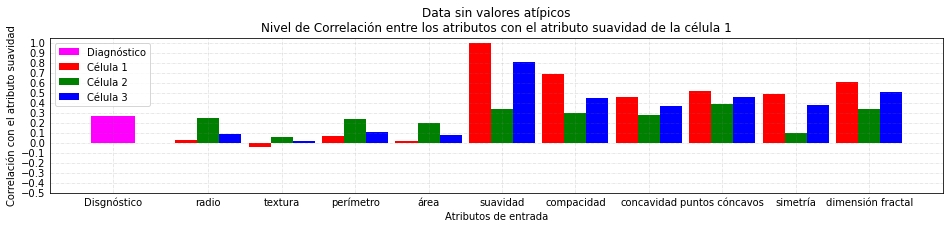

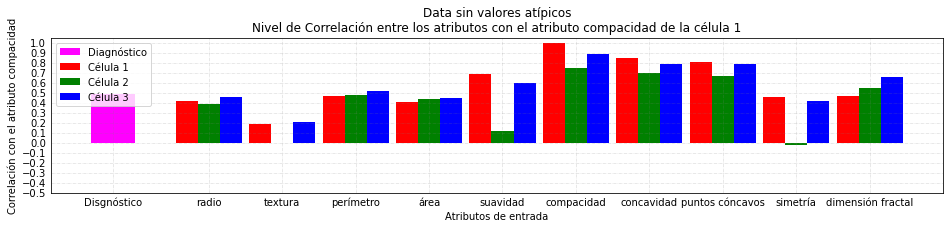

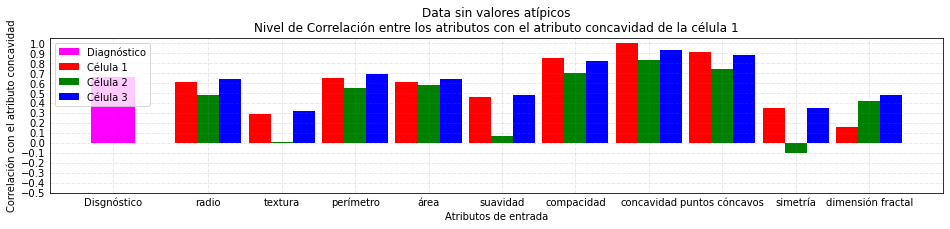

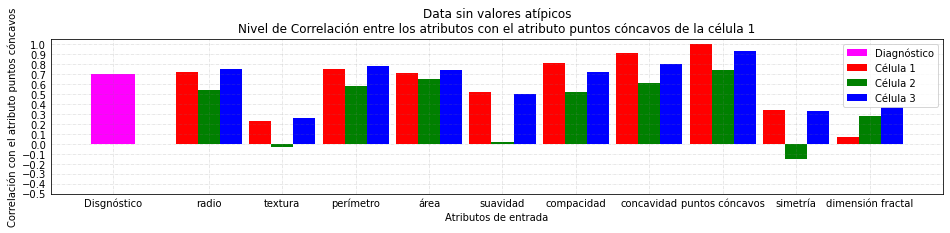

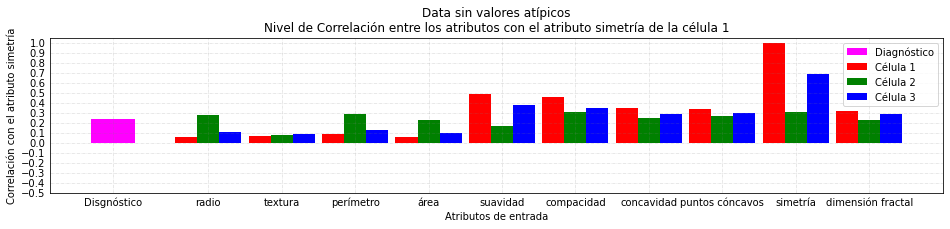

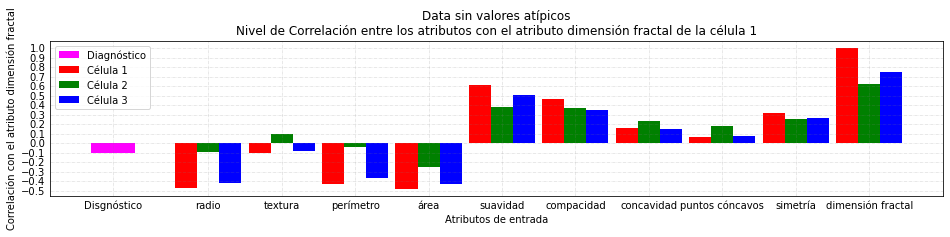

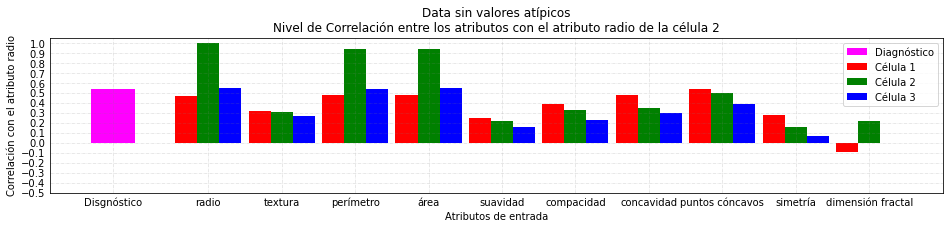

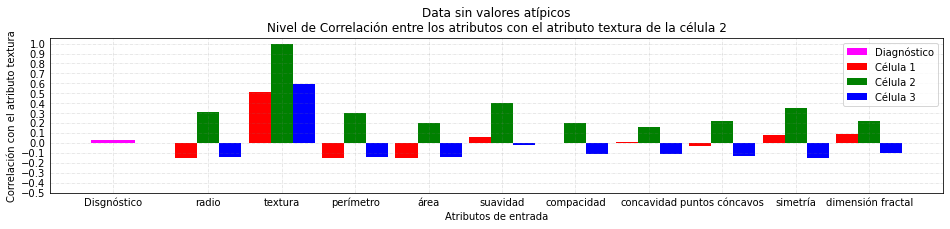

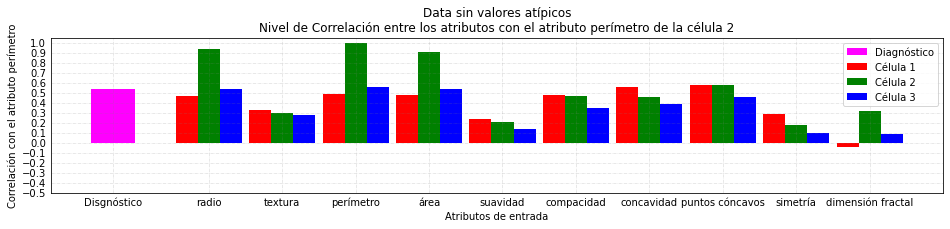

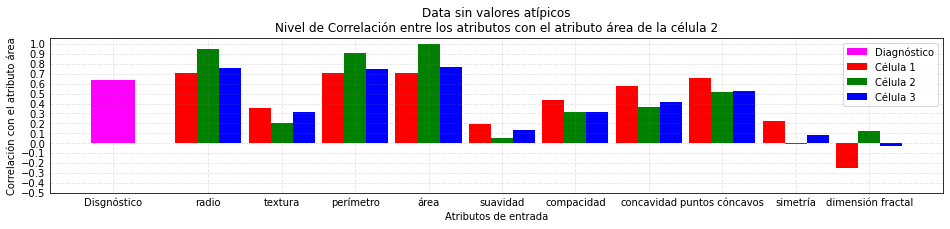

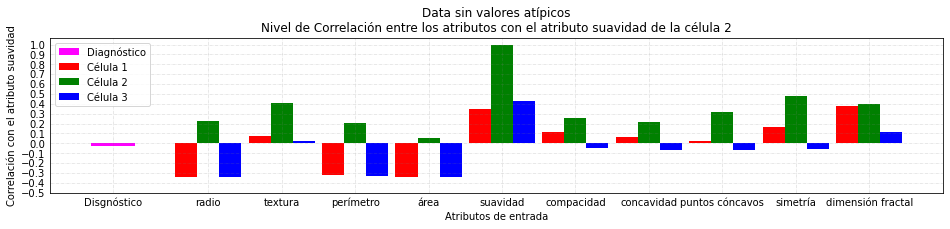

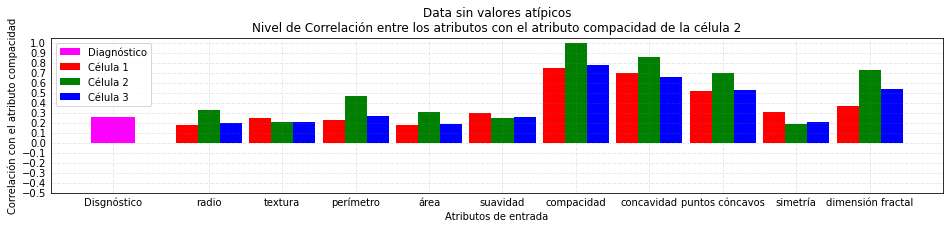

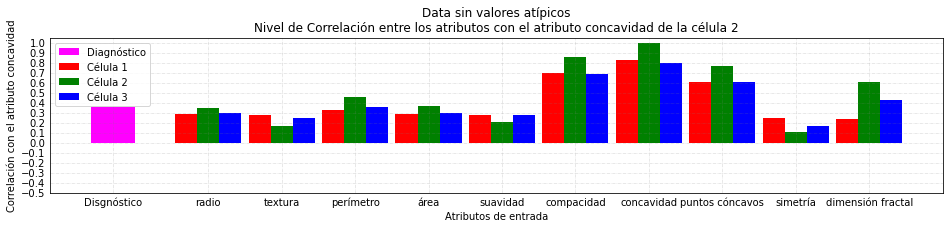

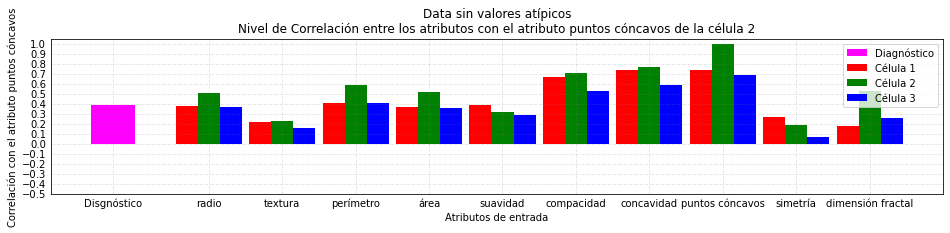

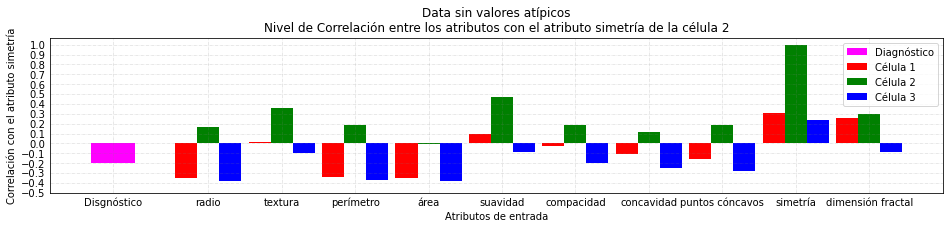

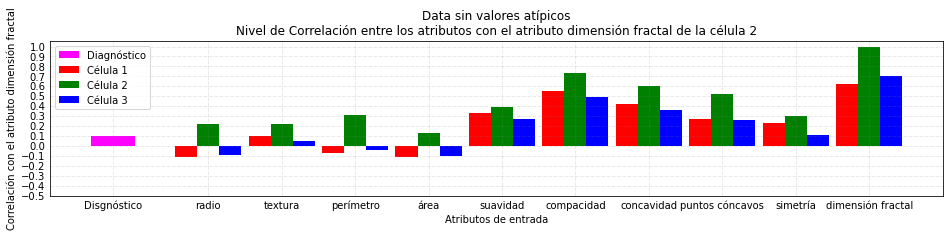

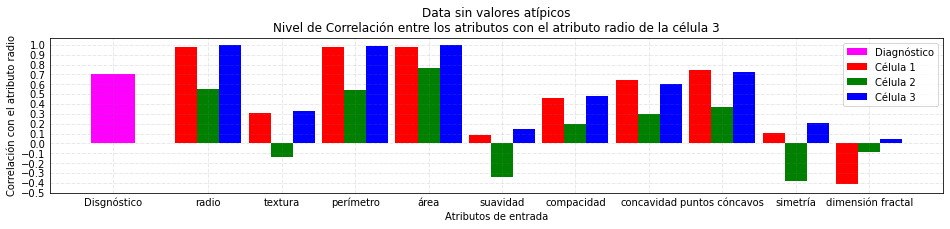

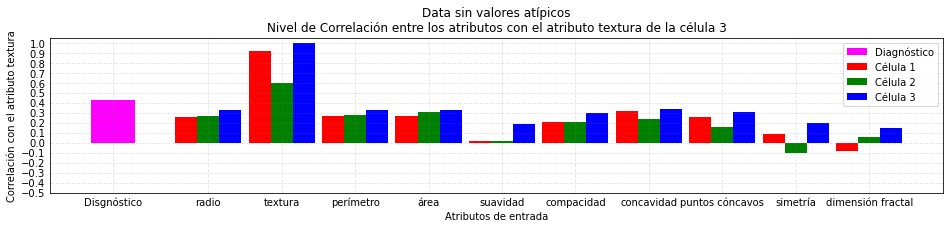

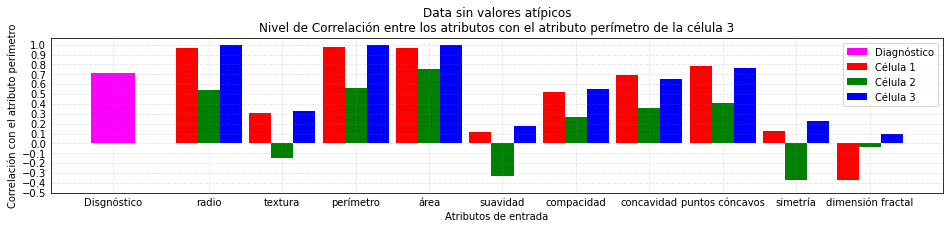

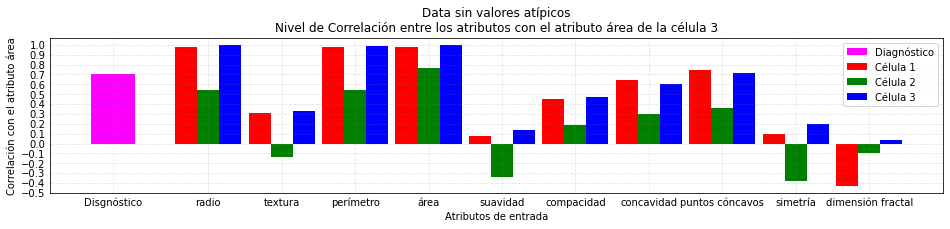

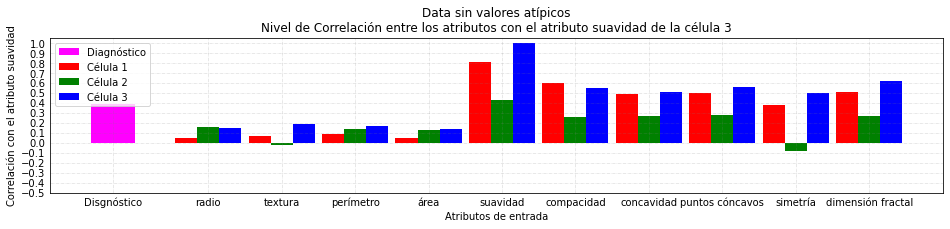

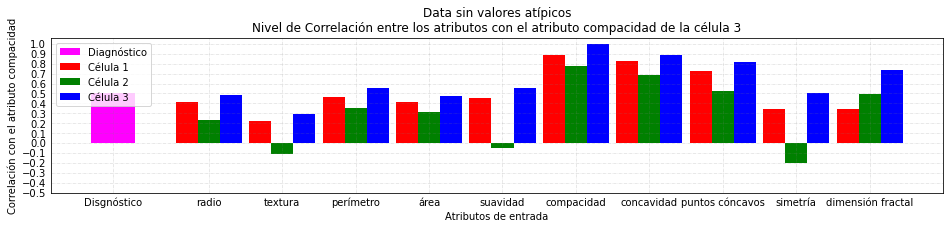

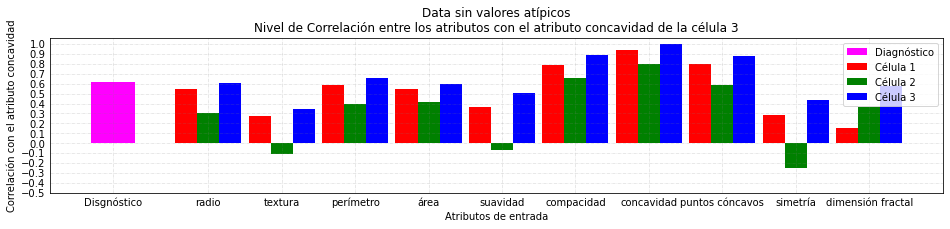

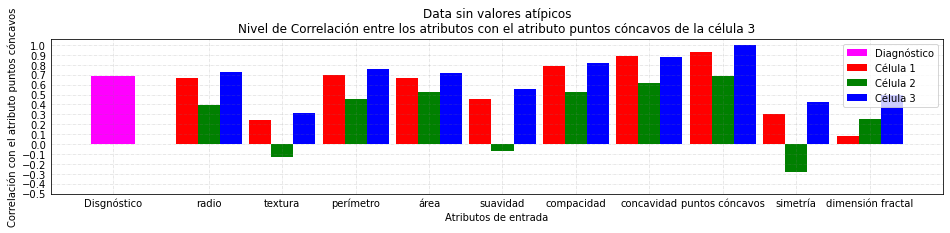

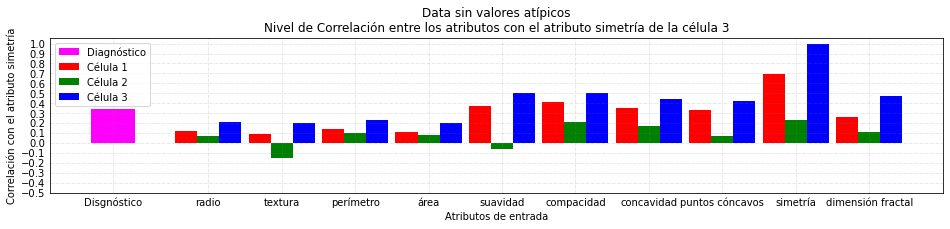

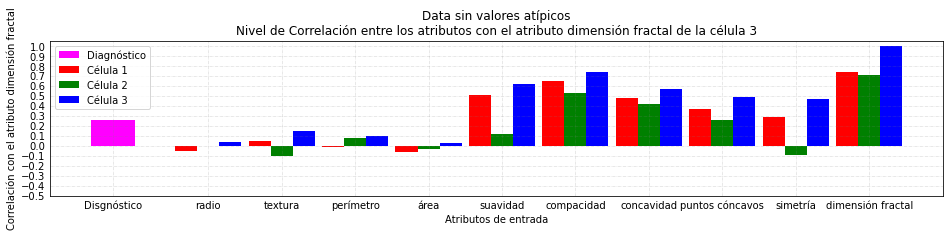

In [1373]:
# Se presenta los resultados de la correlación de todos los atributos de entrada respecto al atributo de salida
barPlot_AllCorr( corr_file_wdbc6n[:,1:], varnames, 'Data sin valores atípicos' )

De las figuras anteriores se pueden identificar varios elementos de interés para el análisis. El más destacado es la baja correlación que suelen tener cada atributo con la mayoría de los demás atributos presentes (los de entrada y el de salida).

De hecho, es importante destacar la anti-correlación que presentan algunos atributos con respecto a otros, como el caso del atributo radio de la célula 1 con respecto a la textura, suavidad, simetría y dimensión fractal de la célula 2 y la dimensión fractal de la célula 3, cuyos valores llegan a ser superiores que el menor valor de correlación (el mayor valor de anti-correlación) entre cualquier atributo de entrada respecto al atributo de salida (Diagnóstico).

Por otro lado, existen varios atributos que, a pesar de tener una baja correlación con el atributo Diagnóstico, poseen una alta correlación con otros atributos. Esto generalmente se presenta entre los atributos de las células 1 y 3 (como se puede apreciar en el diagrama de barras de los atributos compatibilidad, concavidad y puntos cóncavos de las células 1 y 3). Los atributos de la célula 2 tienden a tener una baja correlación con los otros atributos en líneas generales y son los que presentan anti-correlaciones con más frecuencia.

Otros atributos, como textura, simetría y dimensión fractal, presentan bajas correlaciones para todos los casos; mientras que ciertos atributos de las células 1 y 3, como radio, perímetro, área y suavidad presentan altas correlaciones para algunos atributos mientras que con el resto tienen una baja correlación (en algunos casos, altas anti-correlaciones).

Lo anteriormente descrito resulta de interés para el planteamiento del modelo de regresión logística: La similitud entre los atributos de entrada respecto al de salida y con respecto a los demás atributos de entrada puede señalar la tendencia de cantidad de información útil que puede ofrecer al modelo, por lo que es crucial considerarlo al momento de introducir variables secundarias (o derivadas) como entradas al sistema.

Éstas son combinaciones de diferentes atributos a través de operaciones matemáticas entre ellos.

\vspace{1cm} \section{\bfseries\scshape\Large Modelo de Regresión Logística}

Para este experimento, se implementa la regresión logística como método de clasificación. Su expresión matemática se muestra a continuación:


\begin{align*}
    f(x) = \frac{1}{ 1 + e^{-x} }
\end{align*}


Para la regresión lineal, al implementar un algoritmo de predicción basado en pesos, ${\beta}_i$, de una variable de salida, $y$, a partir de un conjunto de $N$ variables de entrada, $x_i$, se expresión a implementar en el modelo se reescribe como:


\begin{align*}
    y = \frac{1}{ 1 + e^{- \left(\, \sum_{i=0}^N{ {\beta}_i \, x_i } \,\right) } }
\end{align*}

Donde el número de ${\beta}_i$ corresponde con el número de $x_i$.

Para el entrenamiento de este algoritmo, se implementa la siguiente ecuación de costos a minimizar:


\begin{align*}
    \min{ \left(  \frac{1-\gamma}{2} \, {\omega}^T \, \omega \,+\, \gamma \, {\| x \|}^2 \,+\, \frac{1}{n} \, \sum_{i=0}^N{ l_i }  \right) }
\end{align*}


Donde $l_i$ corresponde a la función de costos logit:


\begin{align*}
    l_i = log{ \left( e^{ - y_i \, \left( {x_i}^T \, \beta \,+\, c \right) } + 1 \right) }
\end{align*}


Donde $c$ es una constante real.

Los valores de la $\gamma$ en la función de costos pueden ser 0 ó 1, de acuerdo a la metodología que se desea aplicar:
\begin{itemize}
    \item[ $\circ$ ] Si es 0, corresponde a la norma $l_1$
    \item[ $\circ$ ] Si es 1, corresponde a la norma $l_2$
\end{itemize}

Las metodologías de medición de error implementadas son: $RSS$ (Residual Sum of Squares) y $R^2$ (R Squared), cuyas expresiones se muestran a continuación.


\begin{itemize}
    \item[ $\circ$ ] $RSS$ (Residual Sum of Squares):
    \begin{align*}
        RSS = \sum_{i=0}^N { {\left( y_i \,-\, f \left( x_i \right) \right) }^2 }
    \end{align*}
    \item[ $\circ$ ] $RSS$ (R Squares):
    \begin{align*}
        R^2 = 1 \,-\, \frac{ \sum_{i=0}^N { \left( y_i \,-\, f \left( x \right) \right) } }{ \sum_{i=0}^N \left( y_i \,-\, \bar{y} \right) }
    \end{align*}
\end{itemize}


Donde $\bar{y}$ corresponde a la media de los valores a predecir.

En esta ocasión se implementará la norma $l_2$ como función de costo (método por defecto en la función a implementar).

Para esta ocasión, se implementan varios modelos variando los tipos de inputs y la cantidad de inputs, todos derivados de operaciones entre los atributos de la data normalizada sin valores atípicos.

En todos los casos se implementa una validación cruzada de 10 iteración, donde datos de entrenamiento y evaluación son seleccionados en orden aleatorio, pero manteniendo dicho orden para todos los modelos realizados. Esto se realiza introduciendo una semilla para el algoritmo aleatorio, que en este caso es 100. 

Así se logra evitar sesgos por debido a muestras similares cercanas y tener un mismo conjunto de datos de muestra y evaluación en todos los modelos para comparar desempeño.

En este trabajo se prueban diversos modelos para diferentes grupos de datos que, por simplicidad, se les refiere de la siguiente manera de acuerdo al orden de operaciones efectuadas sobre las mismas:

\begin{itemize}
    \item[ $\circ$ ] data 1: data producto de la (1)s ustracción las muestras con valores atípicos, (2) transformar usando la transformada Yoe-Johnson y (3) estandarizar los valores restantes.
    \item[ $\circ$ ] data 2: data completa, de la que se usan los primeros 440 para entrenar.
    \item[ $\circ$ ] data 3: data producto de (1) transformar la data completa usando la transformada Yoe-Johnson, (2) extraer valores atípicos de la transformación y (3) estandarizar los valores restantes.
\end{itemize}


\vspace{1cm} \subsection{\scshape\large Data 1: Primer modelo de regresión lineal}

En este primer modelo se introduce la data sin cambios en la misma: 30 atributos de entrada y 1 atributo de salida.

In [1374]:
# Ejecución del modelo de regresión ineal
wdbc6n_m1_betas , wdbc6n_m1_RSSent , wdbc6n_m1_RSSeva , wdbc6n_m1_R2ent , wdbc6n_m1_R2eva , wdbc6n_m1_R2CValScore , 
wdbc6n_model1 = KFoldsCVLogisticRegresion(file_wdbc6n, 10, True, 100)

In [1375]:
# Presentación de los errores resultantes del primer modelo
modelErrorPrint( wdbc6n_m1_RSSent , wdbc6n_m1_RSSeva , wdbc6n_m1_R2ent , wdbc6n_m1_R2eva , wdbc6n_m1_R2CValScore , 
'Primer Modelo con los datos normaliazdos sin valores atípicos' )

Primer Modelo con los datos normaliazdos sin valores atípicos: RSS de cada iteración con los datos de entrenamiento:
[6.00000 4.00000 5.00000 6.00000 7.00000 7.00000 5.00000 3.00000 5.00000
 5.00000]


Primer Modelo con los datos normaliazdos sin valores atípicos: RSS de cada iteración con los datos de prueba:
[1.00000 2.00000 3.00000 0.00000 1.00000 1.00000 1.00000 4.00000 0.00000
 1.00000]


Primer Modelo con los datos normaliazdos sin valores atípicos: R^2 de cada iteración con los de entrenamiento:
[0.98324 0.98883 0.98603 0.98324 0.98045 0.98045 0.98603 0.99162 0.98607
 0.98607]


Primer Modelo con los datos normaliazdos sin valores atípicos: R^2 de cada iteración con los datos de prueba:
[0.97500 0.95000 0.92500 1.00000 0.97500 0.97500 0.97500 0.90000 1.00000
 0.97436]


error del modelo usando el comando cross_val_score:
[[1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
  1.00000]
 [1.00000 1.00000 1.00000 0.75000 1.00000 1.00000 1.00000 1.00000 1.00000
 

Como se puede apreciar en los resultados presentados anteriormente, el desempeño de este primer modelo resulta ser muy bueno al mantener valores bajo (cercanos a la unidad) en el $RSS$ y valores por encima de 0.9 (incluso, tendiendo a 1 en algunos casos) del $R^2$.

Es importante aclarar que, al disponer de solo 398 datos y efectuar una validación cruzada de 10 iteraciones, 8 de las 10 iteraciones trabajan con data set de 40 muestras, mientras que las otras dos cuentan con 39 muestras. Debido a la baja cantidad de muestras, no resulta insólito pensar que el modelo logre tener buenos resultados para una iteración. El hecho de tener buenos resultados en todas las iteraciones indica la viabilidad del modelo.

Ahora se procede a evaluar el modelo obtenido para el conjunto de datos completo a modo de obtener un valor promedio del $R^2$ y el $RSS$.

In [1377]:
RSS(wdbc6n_model1[-1].predict( file_wdbc6n[:,1:] ), file_wdbc6n[:,0] ) 

6.0

In [ ]:
wdbc6n_model1.score( file_wdbc6n[:,1:] , file_wdbc6n[:,0] )

In [ ]:
wdbc6n_model1.coef_

De estos resultados se puede aseverar que el modelo es exitoso al clasificar los valores, ya que solo se tiene un $RSS$ de 6 (lo que indica 6 valores errados) y un $R^2$ de 0.98492.

Para tener una idea más precisa del desempeño del modelo se calculan las medidas estadísticas de rendimiento, entre las que se encuentran la sensibilidad, especificidad, valor predictivo positivo (VPP), valor predictivo negativo (VPN), exactitud, valor-F y la matriz de contingencia.

In [ ]:
# Presentación del rendimiento del modelo
ModelPerformance( file_wdbc6n, wdbc6n_model1 )

De los resultados mostrados anteriormente, se puede apreciar que el modelo realmente posee un buen desempeño para la base de datos usada.

Por otro lado, en el proceso de sustracción de datos atípicos, se eliminaron la mayoría de los casos de diagnóstico maligno, lo que afecta la confiabilidad del modelo, ya que no necesariamente se desempeñará apropiadamente al exponerse a otros datos similares.

Para corroborar si efectivamente el modelo podría desempeñarse apropiadamente con datos nuevos con cierta discrepancia en el rango (atípicos), se procede a evaluar este mismo modelo pero usando la base de datos completa.

Para ello, se toman los datos completos previamente transformados (haciendo uso de los lambdas obtenidos al transformar el conjunto de datos sin valores atípicos a modo de garantizar un comportamiento gaussiano) y se estandarizan haciendo uso de la función z-score. Posteriormente se introducen el modelo para evaluarlo.

In [ ]:

# se transforma y normaliza la base de datos completa
file_wdbc9bn = np.copy( file_wdbc9b )
file_wdbc9bn[:,1:] = stats.zscore( file_wdbc9b[:,1:], axis = 0 )

# se prueba el nuevo modelo con la data completa transforma y normaliza.
ModelPerformance( file_wdbc9bn, wdbc6n_model1[-1] )


Como se puede apreciar, al evaluar la data completa este modelo mantiene uno alto desempeño. el modelo logra mantener una exactitud del 0.935M y una sensibilidad de 0.82547; indicando que existe un ubral en el que el paciente, siendo positivo para el diagnóstico, en realidad no posee tumor maligno. Por otro lado, al tener una Especificidad de 1, el modelo, en teoría, puede identificar perfectamente, par a la base de datos usada, cuándo el diagnóstico es negativo.

Estos resultados muestran un buen indicio del modelo desarrollado.

\vspace{1cm} \subsection{\scshape\large Data 2: Primer modelo de regresión lineal}

Para este caso, el modelo usa las primeras 440 muestras, de modo que cada una de las 10 iteraciones se realice con 41 muestras. Una vez definido dicho vector, se implementa para seleccionar las muestras a usar para el entrenamiento y se ejcuta la regresión logística.

In [ ]:

# Build a random specific 'True' amount boolean 1D np array generator
file_wdbc9bn_bool = BoolArrGen( np.size(file_wdbc9bn,0), 100, 448/np.size(file_wdbc9bn,0) )

print('el procentaje de la data usada es: ', "{:.5f}".format(400/np.size(file_wdbc9bn,0)*100))


In [ ]:
# Ejecución del modelo de regresión ineal
wdbc9bn_m1_betas , wdbc9bn_m1_RSSent , wdbc9bn_m1_RSSeva , wdbc9bn_m1_R2ent , wdbc9bn_m1_R2eva , wdbc9bn_m1_R2CValScore ,
wdbc9bn_model1 = KFoldsCVLogisticRegresion( file_wdbc9bn[ file_wdbc9bn_bool , :] , 10, True, 100)

Con el modelo generado, se procede a medir el desempeño con la todas las muestras de la data usada.

In [ ]:
# Presentación de los errores resultantes del primer modelo
modelErrorPrint( wdbc9bn_m1_RSSent , wdbc9bn_m1_RSSeva , wdbc9bn_m1_R2ent , wdbc9bn_m1_R2eva , wdbc9bn_m1_R2CValScore ,
'Primer Modelo con los datos completos normaliazdos' )

In [ ]:
# Presentación del rendimiento del modelo
ModelPerformance( file_wdbc9bn[ file_wdbc9bn_bool , :], wdbc9bn_model1[-1] )

Los resultados anteriores parecen ser muy prometedores por solo clasificar 5 muestras erradamente de una data de 440, lo que arroja mayor exactitud para una cantidad de datos más amplias que la usada en el primer modelo.

In [ ]:
# se prueba el nuevo modelo con la data completa transforma y normaliza.
ModelPerformance( file_wdbc9bn, wdbc9bn_model1[-1] )

Efectivamente, como se esperaba, el resultado de este modelo haciendo uso de la data completa es mucho más satisfactorio que el modelo anterior.

No obstante, si bien esta segunda prueba con la data completa debería disipar las sospechas de un posible "overfitting", igualmente se implementa otro modelo sin valores atípicos, pero no de la data directamente, sino de la transformación resultante de la misma.

\vspace{1cm} \subsection{\scshape\large Data 3: Primer modelo de regresión lineal}

Para esta prueba, se toma el conjunto de datos completo transformado y se aplica la metodología de sustracción de valores atípicos para luego ser normalizados.

Una vez normalizados, se introducen en el modelo.

In [ ]:
# sustracción de valores atípicos
file_wdbc10 = np.copy(file_wdbc2)

#file_wdbc10[:,1:], file_wdbc10_lambdas = yoejohnson_transform( file_wdbc10[:,1:] )
file_wdbc10[:,1:], file_wdbc10_lambdas = yoejohnson_transform( file_wdbc10[:,1:], file_wdbc6_lambdas )

file_wdbc10t = AtipValueRemv(file_wdbc10)

# normalización de la data
file_wdbc10n = np.copy(file_wdbc10t)
file_wdbc10n[:,1:] = stats.zscore( file_wdbc10t[:,1:], axis = 0 )

# cantidad de muestras extraidas
print('La cantidad de muestras extraídas son: ', np.size(file_wdbc9,0) - np.size(file_wdbc10n,0)  )

# cantidad de muestras extraidas
print('Diferencia entre la cantidad de muestras extraídas antes de efectuar la transformación respecto a las extraídas después de efectuar la transformación : ', np.size(file_wdbc10n,0) - np.size(file_wdbc3,0)  )

Como se puede apreciar, realizando el proceso de transformación, sustracción de valores atípcos y poseriormente, estandarización de los valores, permite conservar muestras que inicialmente eran consideradas como atípicas, lo que ofrece más información al modelo sin, en teoría, perjudicar su desempeño.

Por otro lado, es importante descargar de los histogramas asociados a la transformación de la data completa y los de la data sin valores atípicos mostraban valores que, siendo típicos inicialmente, se volvían atípicos. Esto significa que, al transformar y luego normalizar, valores que inicialmente eran típicos pudieron haber sido removidos, lo que permite deducir que posiblemente existen más muestras atípicas incluidas que solo la diferencia entre las muestras atípicas extraídas antes de la transformación respecto a las extraídas después de la transformación.

En términos generales, la diferencia de muestras entre ambos casos es de 122. Por ende, se concluye que, para la data usada, esta segunda metodología permite garantizar más información para el modelo (122 muestras más de información).

Ahora nuación se genera el modelo y se valida su desempeño.

In [ ]:
# Ejecución del modelo de regresión ineal
wdbc10n_m1_betas , wdbc10n_m1_RSSent , wdbc10n_m1_RSSeva , wdbc10n_m1_R2ent , wdbc10n_m1_R2eva , wdbc10n_m1_R2CValScore , 
wdbc10n_model1 = KFoldsCVLogisticRegresion( file_wdbc10n, 10, True, 100)

In [ ]:
# Presentación de los errores resultantes del primer modelo
modelErrorPrint( wdbc10n_m1_RSSent , wdbc10n_m1_RSSeva , wdbc10n_m1_R2ent , wdbc10n_m1_R2eva , wdbc10n_m1_R2CValScore ,
'Primer Modelo con los datos completos normaliazdos' )

In [ ]:
# Presentación del rendimiento del modelo
ModelPerformance( file_wdbc10n, wdbc10n_model1[-1] )

Como era de esperarse, este modelo resulta ser el más efectivo de todos: para una mayor cantidad de data, se tienen menos clasificaciones incorrectas (característica del del primer modelo con la data 2) y, dentro de sus errores, no clasifica valores como Falsos Positivo (característica del primer modelo); por lo que este modelo contiene las mejores características de los dos modelos anteriores.

A continuación, se procede a evaluar el mismo con la data completa.

In [ ]:
# se prueba el nuevo modelo con la data completa transforma y normaliza.
ModelPerformance( file_wdbc9bn, wdbc10n_model1[-1] )

Impresionantemente, el resultado de este modelo para la data completa transformada y normalizada resulta ser peor que los anteriores modelos, lo que sugiere que el mismo pudo haber sufrido un ligero overfitting. No obstante, sus valores siguen siendo muy bueno, a solo tener 14 muestras clasificadas incorrectamente.

Esto puede deberse a que, al no tener valores atípicos en sus muestras (que fueron removidas después de la transformación, destacando que la muestras atípicas producto de la transformación no influyen el el modelo y las muestras con valores atípicos previo a la transformación no se comportancomo valores atípicos después de ser transformados), le resulta más difícil clasificar los valores que sí poseen valores atípicos. Esto se puede interpretar claramente como una falta de entrenamiento del modelo de regresión y, por ende, un modelo más débil (entiéndase débil como menos fiable o con desempeño menor).

Inspeccionando más de cerca, se puede descartar la hipótesis de que el modelo haya sufrido un ligero overfitting, ya que los errores son considerablemente menores a la cantidad de datos extraídos (14 errores y 52 muestras removidas, siendo los errores casi una cuarta parte de las muestras descartadas en el análisis), lo que indica que el modelo simplemente es más débil ante valores atípicos.

\vspace{1cm} \section{\bfseries\scshape\Large Resultados}

claramente, es apreciable los efectos positivos de los alores atípicos en el modelo para este caso. 

El modelo desarrollado con la data 3 resultó no ser tan buen modelo al evaluar todos los puntos del data set, mientras que los modelos con la data 1 y 2 arrojaron resultados satisfactorios.

Si bien es cierto que el primer modelo tiene mejores resultados en líneas generales existte la incertidumbre de haber sufrido algún ligero overfitting que lo haga excepcionalmente bueno para clasificar los datos de este data set, pero, de colocarse los datos de otro data set de naturaleza similar, pudiera tener un mal desempeño.

En este sentido, se escoge el modelo 1 como el mejor resultado, no solo por su buen desempeño, sino también por el hecho de que, para esta data, no detectó falsos positivos, lo que puede ser crucial en este tipo de diagnósticos. No obstante, al igual que el modelo con data 2, sería conveniente introducir otro data set que permita validar estas suposiciones en vez del resto de los datos del data set implementado.

Sin embargo, dependiendo de la aplicación, pudiera resultar más conveniente el modelo que usa la data 2 en vez del que usa la data 1, por la mejora en exactitud, especificidad y valor-F. Por ello, ambos modelos son sugeridos como solución. La ecuación de la regresión logística fue presentada anteriormente. A continuación, se muestranlos coeficientes de cada modelo.

In [1381]:
print('Coeficientes del modelo 1 con Data 1: ', wdbc6n_model1[-1].coef_, '\n')
print('Coeficientes del modelo 1 con Data 2: ', wdbc10n_model1[-1].coef_)

Coeficientes del modelo 1 con Data 1:  [[0.06814 0.89214 0.08103 0.16682 0.28355 -1.01163 0.60445 1.06242
  0.02950 0.21231 0.67948 -0.26393 0.48643 1.04437 -0.18119 -0.99290
  0.24493 0.34739 -0.53935 -0.42689 0.61668 0.93914 0.49176 0.72094
  0.71168 -0.30501 0.89020 0.70112 0.49476 0.55209]] 

Coeficientes del modelo 1 con Data 2:  [[0.12716 1.01086 0.15468 0.26013 0.26222 -0.84307 0.85266 1.09122
  0.23417 -0.11054 0.89735 -0.38087 0.50850 1.12842 -0.01814 -1.03763
  0.25338 0.20850 -0.49412 -0.57958 0.68916 0.85223 0.57948 0.82716
  0.86492 -0.34048 0.89803 0.84490 0.42477 0.48683]]


Debido a lo calidad de los modelos y sus satisfactorios resultados, se decidió no implementar modelos donde algunas variables de entrada sean el resultado de combinación de variables de entrada previas y/o la sustracción de atributos que pudieran generar bajo aporte o, al existir una combinación de atributos, estos no sean relevantes para el modelo.

Es sugerible, como una segunda etapa, realizar dichas modificaciones para validar si se pueden mejorar los resultados, o obtener similares, reduciendo el costo computacional del modelo.

\vspace{1cm} \section*{\bfseries\scshape\Large Conclusiones}

La transformada Yoe-jonson resulta ser muy eficiente cuando se trabajan con valores no estrictamente positivos, haciéndola ideal para este tipo de conjunto de datos.

De este trabajo se pudo apreciar el efecto que presentan los datos con valores atípicos (propios de la data o producto de la transformación implementada) sobre un modelo de regresión lineal que, siempre que se encuentren dentro de un rango no muy diferente al promedio del resto de los atributos, estos benefician al modelo proveyendo información adicional esencial para ejecutar una correcta clasificación.

Los modelos de regresión logística resultan ser muy eficientes para clasificar la data provista por el data set, arrojando resultados por encima del 0.9 en valores de sensibilidad, especificidad, exactitud, entre otros, tanto con la data procesada como con la data completa transformada y normalizada (siempre que se incluyan valores atípicos).

El modelo seleccionado como el mejor provee resultados confiables para todo el data set, por lo que se concluye con el éxito de la experiencia.